# I) Import the necessary packages

In [2]:
# ================================
# 1. System & Utility Libraries
# ================================
import os
import math
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
from itertools import combinations
from pathlib import Path
import joblib

# ================================
# 2. Data Manipulation & Math
# ================================
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway

# ================================
# 3. Visualization
# ================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import ConfusionMatrixDisplay

# ================================
# 4. Scikit-learn Core Modules
# ================================
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# ================================
# 5. Scikit-learn Regression Models
# ================================
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# ================================
# 6. Gradient Boosting Libraries
# ================================
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# =====================
# 7. Preprocessing & Pipeline
# =====================
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


# II) Get the data

## 1) Import csv file

In [5]:
full_data = pd.read_csv('chip_dataset.csv')

## 2) Rename features

In [7]:
full_data = full_data.rename(columns={
    "Process Size (nm)": "Process Size",
    "TDP (W)": "TDP",
    "Die Size (mm^2)": "Die Size",
    "Transistors (million)": "Transistors",
    "Freq (MHz)": "Freq"
})

# III) Explore the Data

## 1) Quick glance at the data

In [10]:
full_data.head()

Unnamed: 0                  Product Type Release Date  Process Size    TDP  \
0           0      AMD Athlon 64 3500+  CPU   2007-02-20          65.0   45.0   
1           1         AMD Athlon 200GE  CPU   2018-09-06          14.0   35.0   
2           2     Intel Core i5-1145G7  CPU   2020-09-02          10.0   28.0   
3           3    Intel Xeon E5-2603 v2  CPU   2013-09-01          22.0   80.0   
4           4  AMD Phenom II X4 980 BE  CPU   2011-05-03          45.0  125.0   

   Die Size  Transistors    Freq  Foundry Vendor  FP16 GFLOPS  FP32 GFLOPS  \
0      77.0        122.0  2200.0  Unknown    AMD          NaN          NaN   
1     192.0       4800.0  3200.0  Unknown    AMD          NaN          NaN   
2       NaN          NaN  2600.0    Intel  Intel          NaN          NaN   
3     160.0       1400.0  1800.0    Intel  Intel          NaN          NaN   
4     258.0        758.0  3700.0  Unknown    AMD          NaN          NaN   

   FP64 GFLOPS  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [11]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4854 non-null   int64  
 1   Product       4854 non-null   object 
 2   Type          4854 non-null   object 
 3   Release Date  4854 non-null   object 
 4   Process Size  4845 non-null   float64
 5   TDP           4228 non-null   float64
 6   Die Size      4139 non-null   float64
 7   Transistors   4143 non-null   float64
 8   Freq          4854 non-null   float64
 9   Foundry       4854 non-null   object 
 10  Vendor        4854 non-null   object 
 11  FP16 GFLOPS   536 non-null    float64
 12  FP32 GFLOPS   1948 non-null   float64
 13  FP64 GFLOPS   1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ KB


In [12]:
full_data.describe()

Unnamed: 0  Process Size          TDP     Die Size   Transistors  \
count  4854.000000   4845.000000  4228.000000  4139.000000   4143.000000   
mean   2426.500000     55.109598    81.359981   188.440445   1929.922279   
std    1401.373433     44.998676    76.807808   126.189383   4044.891098   
min       0.000000      0.000000     1.000000     1.000000      8.000000   
25%    1213.250000     22.000000    33.000000   104.000000    154.000000   
50%    2426.500000     40.000000    65.000000   148.000000    624.000000   
75%    3639.750000     90.000000   100.000000   239.000000   1550.000000   
max    4853.000000    250.000000   900.000000   826.000000  54200.000000   

              Freq    FP16 GFLOPS   FP32 GFLOPS   FP64 GFLOPS  
count  4854.000000     536.000000   1948.000000   1306.000000  
mean   1484.406057    8397.459851   2134.756653    363.670511  
std    1066.701523   13799.551131   3898.431487   1145.931856  
min     100.000000      10.020000     12.800000      3.600000  
25%     590.000000     768.800000    257.300000     38.295000  
50%    1073.500000    2965.500000    696.000000     89.280000  
75%    2400.000000   10600.000000   2116.750000    220.000000  
max    4700.000000  184600.000000  40000.000000  11540.000000

<Axes: >

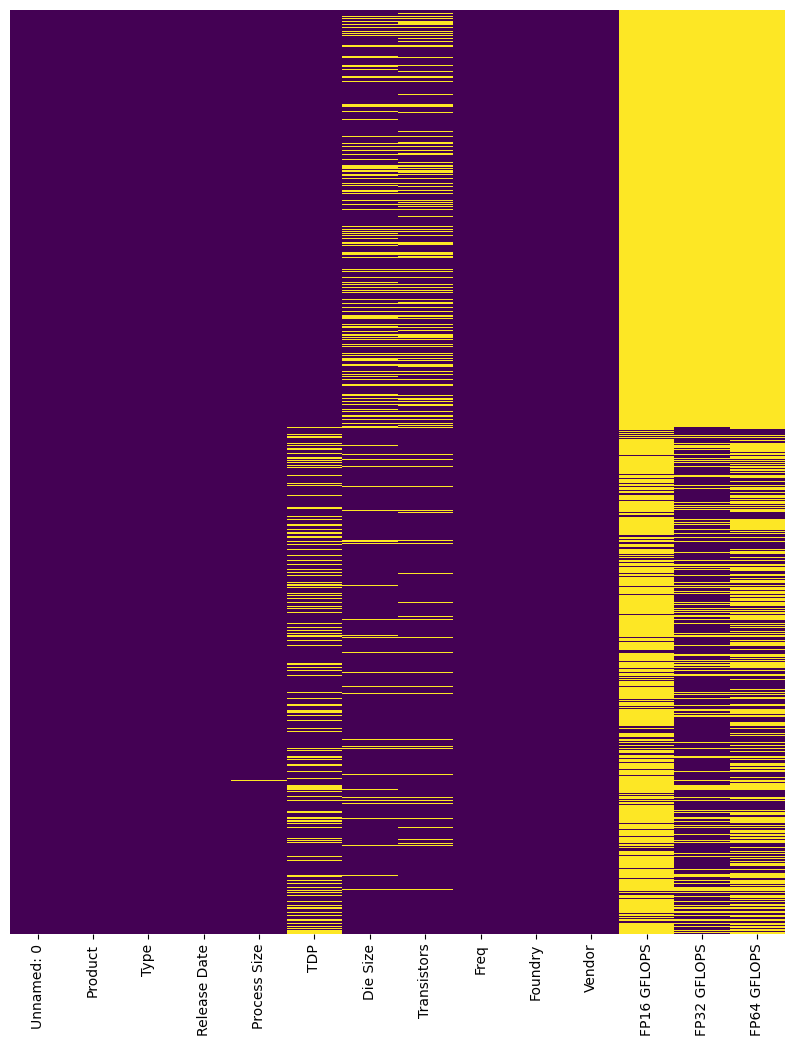

In [13]:
plt.figure(figsize=(10,12))
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
full_data.nunique()

Unnamed: 0      4854
Product         4278
Type               2
Release Date    1357
Process Size      22
TDP              200
Die Size         191
Transistors      196
Freq             527
Foundry           10
Vendor             5
FP16 GFLOPS      343
FP32 GFLOPS      821
FP64 GFLOPS      672
dtype: int64

In [15]:
full_data.isnull().sum()

Unnamed: 0         0
Product            0
Type               0
Release Date       0
Process Size       9
TDP              626
Die Size         715
Transistors      711
Freq               0
Foundry            0
Vendor             0
FP16 GFLOPS     4318
FP32 GFLOPS     2906
FP64 GFLOPS     3548
dtype: int64

## 2) Functions used to explore each feature

In [17]:
def get_value_counts_summary(df, feature):
    """
    Returns a table showing the count and percentage frequency 
    of each unique value in the given feature.
    """
    counts = df[feature].value_counts(dropna=False)
    freqs = df[feature].value_counts(normalize=True, dropna=False) * 100
    summary = pd.concat([counts, freqs], axis=1)
    summary.columns = ['Count', 'Frequency (%)']
    return summary


def summarize_feature(df, feature, show=True):
    """
    Display or return a summary of a single feature, including:
    - Data type
    - Descriptive statistics
    - Missing value ratio
    - Count & frequency table
    """
    summary = {}

    # Data type
    dtype = df[feature].dtype
    summary['Data Type'] = dtype

    # Descriptive statistics
    if pd.api.types.is_numeric_dtype(dtype):
        desc = df[feature].describe()
    else:
        desc = df[feature].describe(include='all')
    summary['Description'] = desc

    # Missing values
    null_count = df[feature].isna().sum()
    total_count = len(df)
    null_pct = (null_count / total_count) * 100
    summary['Missing Count'] = null_count
    summary['Missing (%)'] = null_pct

    # Value counts and frequency
    value_summary = get_value_counts_summary(df, feature)
    summary['Value Counts'] = value_summary

    # Display the result
    if show:
        print(f"{'='*60}")
        print(f"Feature: {feature}")
        print(f"{'-'*60}")
        print("Data Type:", dtype)
        print("Missing Values: {} ({:.2f}%)".format(null_count, null_pct))
        print(f"{'-'*60}")
        print("Description:")
        print(desc)
        print(f"{'-'*60}")
        print("Value Counts (All):")
        print(value_summary)
        print(f"{'='*60}\n")
    else:
        return summary


In [18]:
def create_pie_plot(df, feature, figsize=(8, 8)):
    """
    Draws a pie chart for the given feature.
    Automatically displays only the top 10 categories if there are too many.
    Modern look: light background, pastel colors, legend on the right.
    """
    # Calculate counts and frequencies
    counts = df[feature].value_counts(dropna=False)
    freqs = df[feature].value_counts(normalize=True, dropna=False) * 100

    # Limit to top 10 if necessary
    if len(counts) > 10:
        counts = counts.head(10)
        freqs = freqs.head(10)
        print(f"Feature {feature} has more than 10 categories. Displaying top 10 most frequent.")

    labels = counts.index
    sizes = freqs.values
    legend_labels = [f"{str(label)} ({counts.loc[label]})" for label in labels]

    # Light gray-white background
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor('#f7f7f7')

    # List of 10 distinct pastel colors
    colors = [
        "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF",
        "#D5BAFF", "#FFC4E1", "#C4FFFF", "#E6FFBA", "#FFBACD"
    ][:len(labels)]

    # Draw pie chart
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=None,
        autopct='%1.2f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 10}
    )

    ax.set_title(f"Pie Chart of {feature}", fontsize=14)
    ax.axis('equal')

    # Legend on the right
    ax.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

    plt.show()


In [19]:
def create_bar_plot(df, feature, figsize=(10, 6)):
    """
    Draws a bar chart for a given feature.
    Uses a light background and custom pastel colors for bars.
    If there are more than 10 categories, only the top 10 are displayed.
    """
    # Calculate counts and frequencies
    value_counts = df[feature].value_counts(dropna=False)
    value_freq = df[feature].value_counts(normalize=True, dropna=False) * 100

    if len(value_counts) > 10:
        print(f"Feature {feature} has more than 10 categories. Displaying top 10 most frequent.")
        value_counts = value_counts.head(10)
        value_freq = value_freq.head(10)

    labels = value_counts.index.astype(str).tolist()
    counts = value_counts.values
    freqs = value_freq.values

    plot_df = pd.DataFrame({
        feature: labels,
        'Count': counts,
        'Frequency (%)': freqs
    })

    # Custom pastel colors
    colors = [
        "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF",
        "#D5BAFF", "#FFC4E1", "#C4FFFF", "#E6FFBA", "#FFBACD"
    ][:len(labels)]

    # Light background style
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f5f5f5')
    ax.set_facecolor('#f5f5f5')

    # Draw the bar plot
    bars = sns.barplot(
        x=feature,
        y='Count',
        data=plot_df,
        palette=colors,
        edgecolor='black',
        ax=ax,
        width=0.6
    )

    # Annotate bars with count and percentage
    for i, row in plot_df.iterrows():
        ax.text(i, row['Count'] + max(counts) * 0.01,
                f"{row['Count']} ({row['Frequency (%)']:.1f}%)",
                ha='center', va='bottom', fontsize=10, color='black')

    # Customize axes and title
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Bar Chart of {feature}", fontsize=14, weight='bold')
    ax.set_xticklabels(labels, rotation=45, ha='right')

    plt.tight_layout()

    plt.show()


In [20]:
def create_box_plot(df, feature, figsize=(10, 6), box_color="#FFB3BA", clip_outliers=True, clip_percentile=99):
    """
    Draws two side-by-side boxplots:
    - Original boxplot (full data including outliers)
    - Clipped boxplot (removes extreme outliers above the given percentile)
    """
    sns.set(style="whitegrid")

    data_full = df[feature].dropna()
    clip_value = np.percentile(data_full, clip_percentile)
    data_clipped = data_full[data_full <= clip_value]

    fig, axes = plt.subplots(1, 2, figsize=figsize, facecolor="#f5f5f5")
    for ax in axes:
        ax.set_facecolor("#f5f5f5")

    # Original boxplot with outliers
    sns.boxplot(y=data_full, color=box_color, ax=axes[0], width=0.5, fliersize=4)
    axes[0].set_title(f"{feature} - Full Data (with outliers)", fontsize=13, weight='bold')
    axes[0].set_ylabel('')
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

    max_val_full = data_full.max()
    if max_val_full >= 1000:
        axes[0].get_yaxis().set_major_formatter(
            ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
    elif max_val_full < 10:
        axes[0].get_yaxis().set_major_formatter(
            ticker.FuncFormatter(lambda x, _: f"{x:.2f}"))

    # Clipped boxplot (removing top outliers)
    sns.boxplot(y=data_clipped, color=box_color, ax=axes[1], width=0.5, fliersize=4)
    axes[1].set_title(f"{feature} - Clipped at P{clip_percentile}", fontsize=13, weight='bold')
    axes[1].set_ylabel('')
    axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

    max_val_clip = data_clipped.max()
    if max_val_clip >= 1000:
        axes[1].get_yaxis().set_major_formatter(
            ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
    elif max_val_clip < 10:
        axes[1].get_yaxis().set_major_formatter(
            ticker.FuncFormatter(lambda x, _: f"{x:.2f}"))

    plt.tight_layout()
    plt.show()


In [21]:
def compare_hist_with_clip(df, feature, bins=50, kde=True, clip_percentile=99, hist_color="#FFB3BA"):
    """
    Displays two histograms:
    - Original (including outliers)
    - Clipped version (removes outliers above the given percentile)
    """
    sns.set(style="whitegrid")

    data_full = df[feature].dropna()
    clip_value = np.percentile(data_full, clip_percentile)
    data_clipped = data_full[data_full <= clip_value]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor="#f5f5f5")
    for ax in axes:
        ax.set_facecolor("#f5f5f5")

    # Original distribution
    sns.histplot(data_full, bins=bins, kde=kde, color=hist_color, ax=axes[0])
    axes[0].set_title(f'{feature} - Full Distribution', fontsize=12, weight='bold')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Frequency")
    if data_full.max() >= 1000:
        axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))

    # Clipped distribution (above PXX removed)
    sns.histplot(data_clipped, bins=bins, kde=kde, color=hist_color, ax=axes[1])
    axes[1].set_title(f'{feature} - Clipped at P{clip_percentile}', fontsize=12, weight='bold')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel("Frequency")
    if data_clipped.max() >= 1000:
        axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))

    plt.tight_layout()
    plt.show()


In [22]:
def analyze_numerical_feature(df, feature):
    print(f"===== Summary of feature: {feature} =====\n")
    summarize_feature(df, feature)
    
    print("\n===== Box Plot =====\n")
    create_box_plot(df, feature)
    
    print("\n===== Histogram Comparison (Full vs Clipped) =====\n")
    compare_hist_with_clip(df, feature)

def analyze_categorical_feature(df, feature):
    print(f"===== Summary of feature: {feature} =====\n")
    summarize_feature(df, feature)
    
    print("\n===== Pie Chart =====\n")
    create_pie_plot(df, feature)
    
    print("\n===== Bar Chart =====\n")
    create_bar_plot(df, feature)

In [23]:
def process_datetime_feature(df, feature, hist_color="#FFB3BA"):  
    """
    Converts a datetime feature and extracts components (Day, Month, Quarter, Year).
    Then summarizes and visualizes each component using count plots.
    """
    df_copy = df.copy()

    # Convert to datetime
    df_copy[feature] = pd.to_datetime(df_copy[feature], errors='coerce')

    # Create integer-based categorical columns (supporting NaN)
    df_copy[f"{feature} Day"] = df_copy[feature].dt.day.astype(pd.Int64Dtype()).astype("category")
    df_copy[f"{feature} Month"] = df_copy[feature].dt.month.astype(pd.Int64Dtype()).astype("category")
    df_copy[f"{feature} Quarter"] = df_copy[feature].dt.quarter.astype(pd.Int64Dtype()).astype("category")
    df_copy[f"{feature} Year"] = df_copy[feature].dt.year.astype(pd.Int64Dtype()).astype("category")

    new_features = [
        f"{feature} Day", f"{feature} Month", f"{feature} Quarter", f"{feature} Year"
    ]

    sns.set(style="whitegrid")

    for feat in new_features:
        print(f"===== Summary of feature: {feat} =====\n")
        summarize_feature(df_copy, feat)

        plt.figure(figsize=(16, 6), facecolor="#f5f5f5")
        ax = sns.countplot(x=feat, data=df_copy, color=hist_color)
        ax.set_facecolor("#f5f5f5")
        ax.set_title(f'Frequency of {feat}', fontsize=12, weight='bold')
        ax.set_xlabel(feat)
        ax.set_ylabel('Count')
        plt.tight_layout()
        plt.show()


## 3) Univariate analysis

### 3.1) Product

===== Summary of feature: Product =====

Feature: Product
------------------------------------------------------------
Data Type: object
Missing Values: 0 (0.00%)
------------------------------------------------------------
Description:
count                    4854
unique                   4278
top       AMD Athlon 64 3200+
freq                       12
Name: Product, dtype: object
------------------------------------------------------------
Value Counts (All):
                          Count  Frequency (%)
Product                                       
AMD Athlon 64 3200+          12       0.247219
AMD Sempron 3000+            10       0.206016
AMD Athlon 64 3000+          10       0.206016
Intel HD Graphics            10       0.206016
AMD Athlon 64 3500+           9       0.185414
...                         ...            ...
AMD Opteron 6276              1       0.020602
AMD Opteron 6278              1       0.020602
Intel Xeon E5-1620 v2         1       0.020602
AMD Phenom X4 97

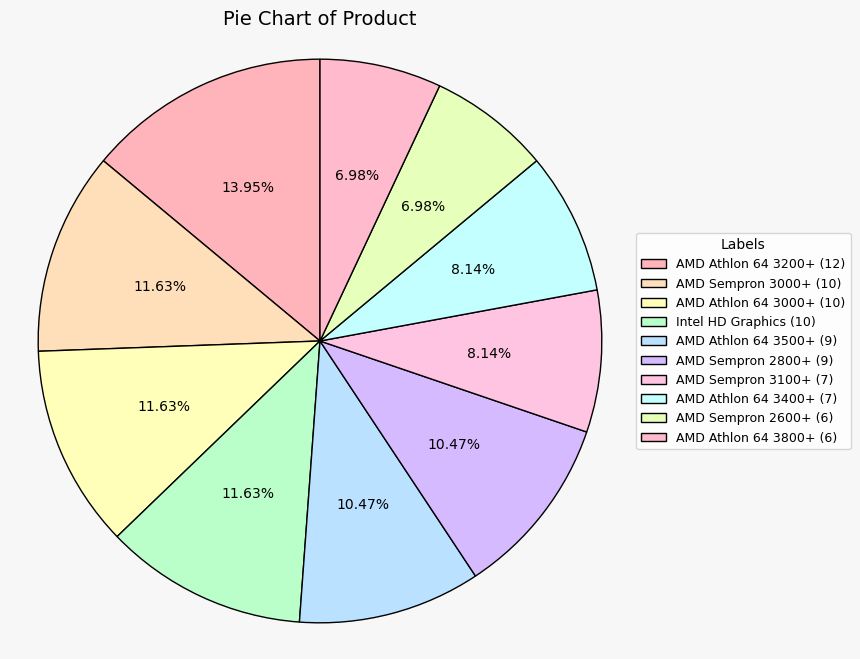


===== Bar Chart =====

Feature Product has more than 10 categories. Displaying top 10 most frequent.


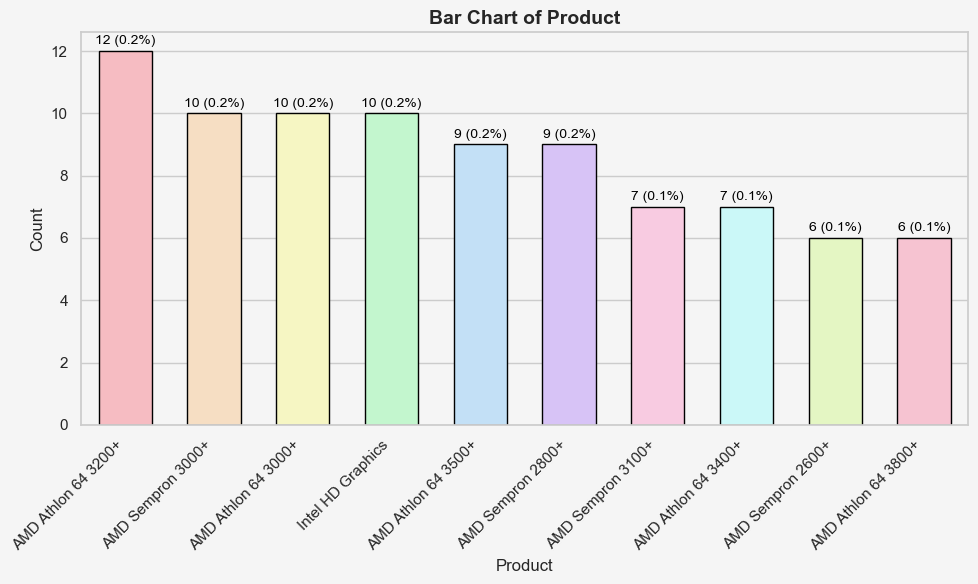

In [26]:
analyze_categorical_feature(full_data, 'Product')

- The `Product` column contains **4,278 unique chip models** across **4,854 entries**, indicating a high diversity of products.
- The most common product, **"AMD Athlon 64 3200+"**, appears only **12 times**, accounting for just **0.25%** of the data.
- Most product names are unique or nearly unique, reflecting a **long-tail distribution** typical in hardware datasets.
- This feature serves as a unique identifier rather than a meaningful variable for analysis.

### 3.2) Type

===== Summary of feature: Type =====

Feature: Type
------------------------------------------------------------
Data Type: object
Missing Values: 0 (0.00%)
------------------------------------------------------------
Description:
count     4854
unique       2
top        GPU
freq      2662
Name: Type, dtype: object
------------------------------------------------------------
Value Counts (All):
      Count  Frequency (%)
Type                      
GPU    2662      54.841368
CPU    2192      45.158632


===== Pie Chart =====



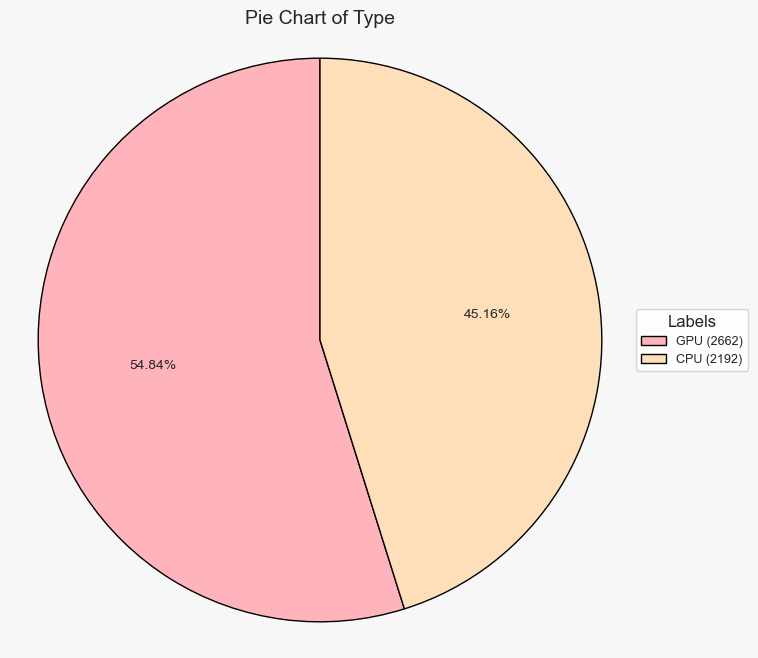


===== Bar Chart =====



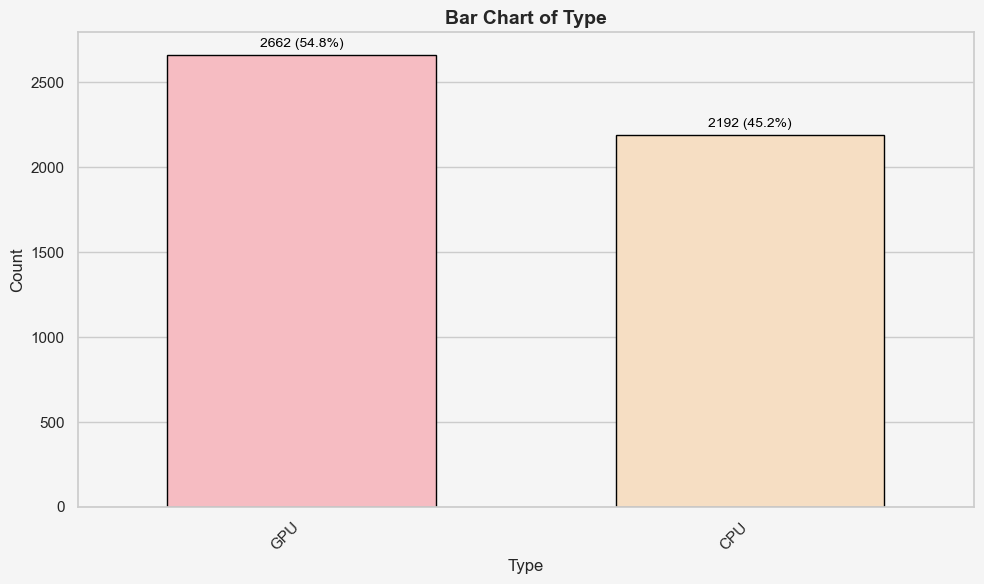

In [29]:
analyze_categorical_feature(full_data, 'Type')

- The `Type` column classifies chips into two categories: **GPU** and **CPU**, with no missing values.
- **GPUs** make up the majority at **54.84%**, while **CPUs** account for **45.16%** of the dataset.
- This near-even split suggests balanced representation for comparing graphics and processing units.
- The binary nature of this feature makes it suitable for categorical grouping in analysis.

### 3.3) Release Date

===== Summary of feature: Release Date Day =====

Feature: Release Date Day
------------------------------------------------------------
Data Type: category
Missing Values: 75 (1.55%)
------------------------------------------------------------
Description:
count     4779
unique      31
top          1
freq      1060
Name: Release Date Day, dtype: int64
------------------------------------------------------------
Value Counts (All):
                  Count  Frequency (%)
Release Date Day                      
1                  1060      21.837660
7                   188       3.873094
5                   183       3.770087
2                   179       3.687680
23                  177       3.646477
14                  175       3.605274
3                   172       3.543469
27                  162       3.337454
6                   159       3.275649
4                   154       3.172641
21                  147       3.028430
15                  136       2.801813
30                

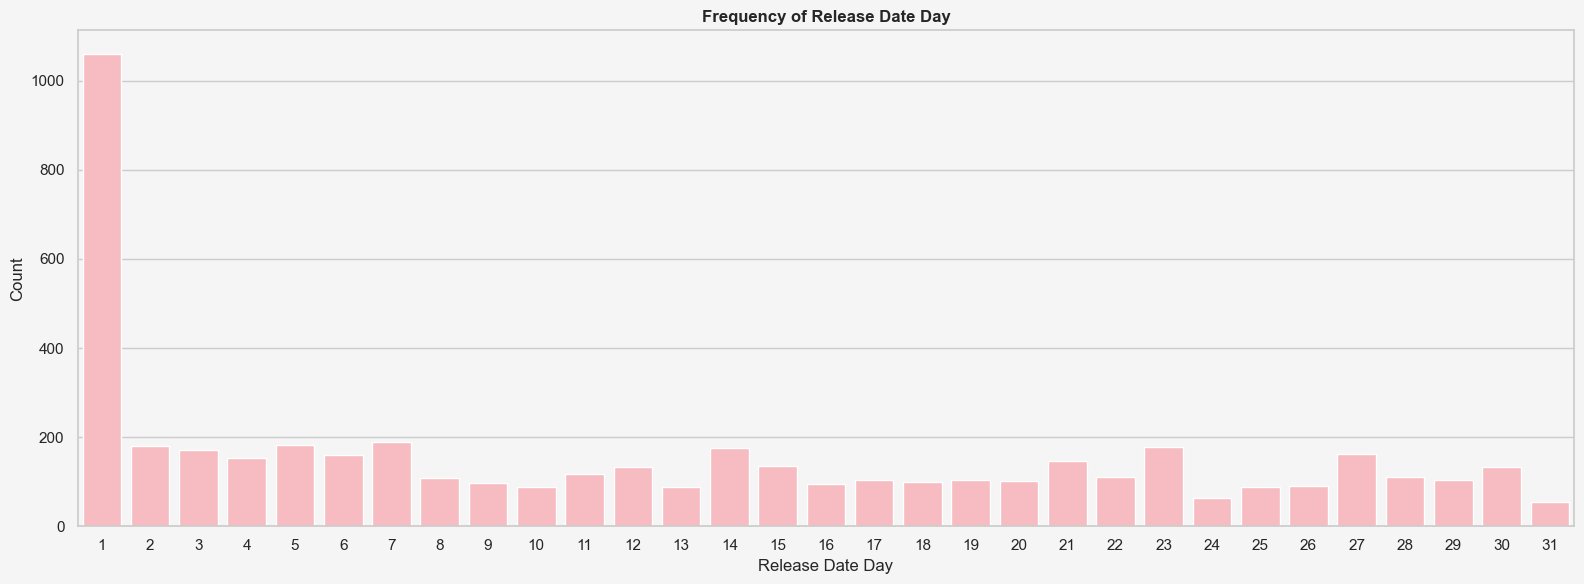

===== Summary of feature: Release Date Month =====

Feature: Release Date Month
------------------------------------------------------------
Data Type: category
Missing Values: 75 (1.55%)
------------------------------------------------------------
Description:
count     4779
unique      12
top          1
freq       585
Name: Release Date Month, dtype: int64
------------------------------------------------------------
Value Counts (All):
                    Count  Frequency (%)
Release Date Month                      
1                     585      12.051916
6                     516      10.630408
9                     494      10.177173
4                     477       9.826947
3                     460       9.476720
5                     442       9.105892
10                    372       7.663782
8                     330       6.798517
7                     308       6.345282
2                     302       6.221673
11                    255       5.253399
12                    238

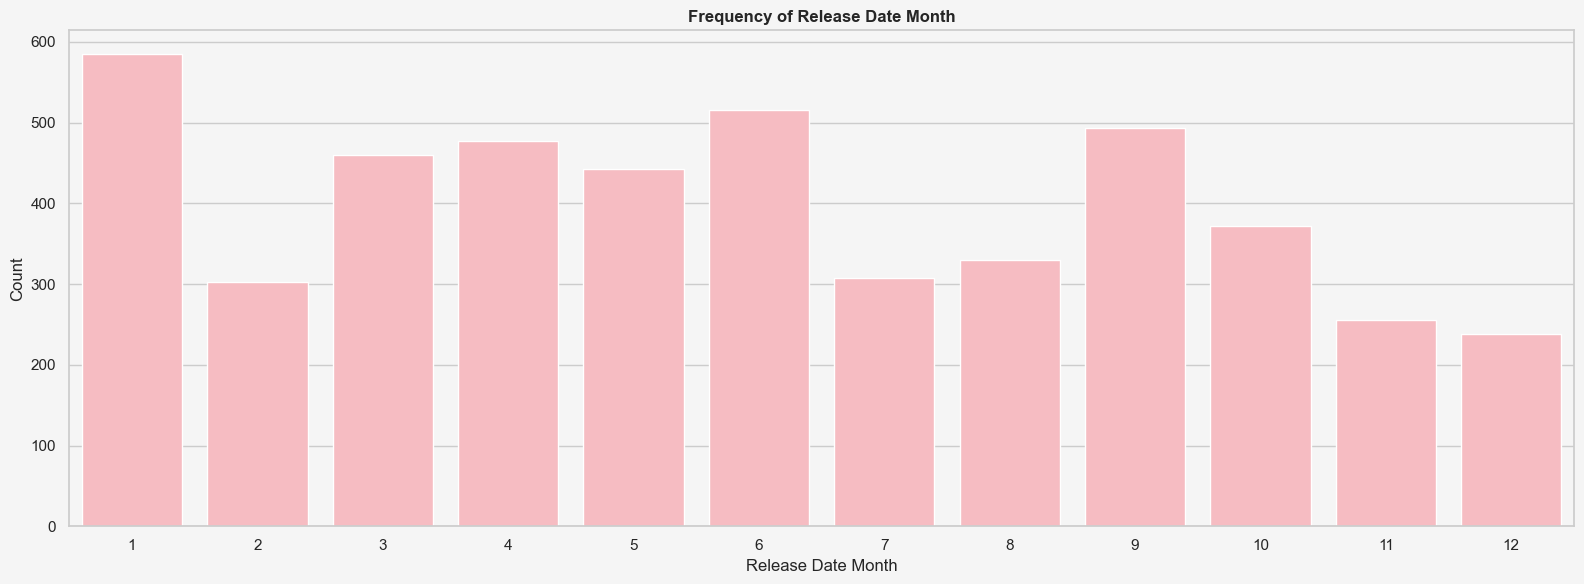

===== Summary of feature: Release Date Quarter =====

Feature: Release Date Quarter
------------------------------------------------------------
Data Type: category
Missing Values: 75 (1.55%)
------------------------------------------------------------
Description:
count     4779
unique       4
top          2
freq      1435
Name: Release Date Quarter, dtype: int64
------------------------------------------------------------
Value Counts (All):
                      Count  Frequency (%)
Release Date Quarter                      
2                      1435      29.563247
1                      1347      27.750309
3                      1132      23.320972
4                       865      17.820354
NaN                      75       1.545117



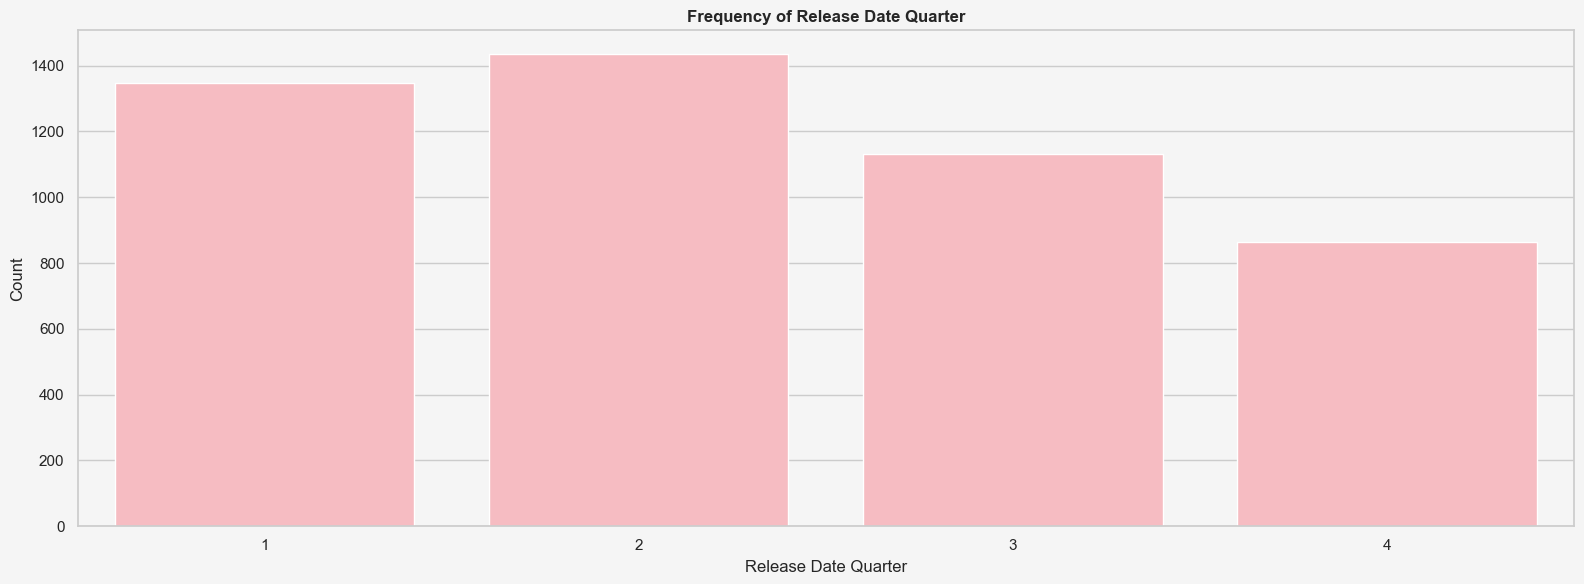

===== Summary of feature: Release Date Year =====

Feature: Release Date Year
------------------------------------------------------------
Data Type: category
Missing Values: 75 (1.55%)
------------------------------------------------------------
Description:
count     4779
unique      22
top       2013
freq       349
Name: Release Date Year, dtype: int64
------------------------------------------------------------
Value Counts (All):
                   Count  Frequency (%)
Release Date Year                      
2013                 349       7.189946
2012                 331       6.819118
2011                 330       6.798517
2010                 291       5.995056
2008                 285       5.871446
2004                 266       5.480016
2006                 264       5.438813
2005                 249       5.129790
2007                 227       4.676555
2009                 221       4.552946
2017                 218       4.491141
2015                 213       4.388133
2

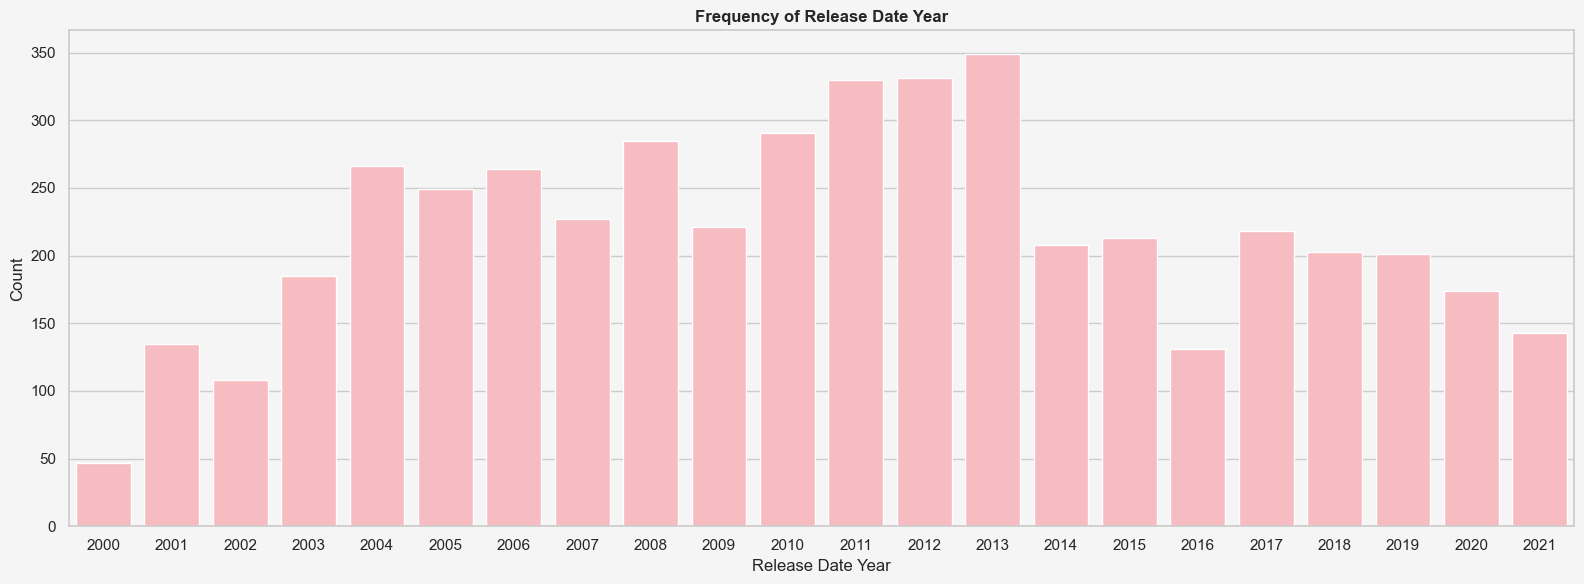

In [32]:
process_datetime_feature(full_data, 'Release Date')

- The `Release Date` components span from **2000 to 2021**, with the most active year being **2013** (7.19% of entries).
- **Quarter 2** and **January (Month 1)** dominate chip release trends, suggesting common launch cycles in mid and early year.
- The most frequent release **day** is the **1st**, accounting for over **21%**, indicating placeholder or default values.
- Only **1.55%** of entries have missing release information, implying mostly complete temporal coverage.

### 3.4) Process Size

===== Summary of feature: Process Size =====

Feature: Process Size
------------------------------------------------------------
Data Type: float64
Missing Values: 9 (0.19%)
------------------------------------------------------------
Description:
count    4845.000000
mean       55.109598
std        44.998676
min         0.000000
25%        22.000000
50%        40.000000
75%        90.000000
max       250.000000
Name: Process Size, dtype: float64
------------------------------------------------------------
Value Counts (All):
              Count  Frequency (%)
Process Size                      
14.0            620      12.772971
28.0            617      12.711166
90.0            479       9.868150
40.0            425       8.755665
130.0           383       7.890400
32.0            355       7.313556
65.0            341       7.025134
45.0            265       5.459415
22.0            259       5.335806
150.0           176       3.625876
55.0            172       3.543469
7.0          

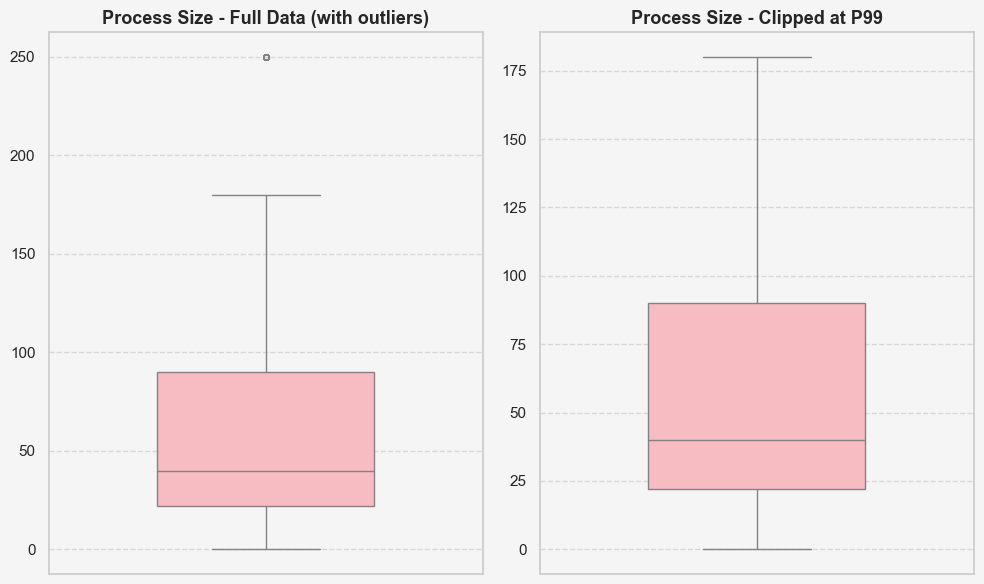


===== Histogram Comparison (Full vs Clipped) =====



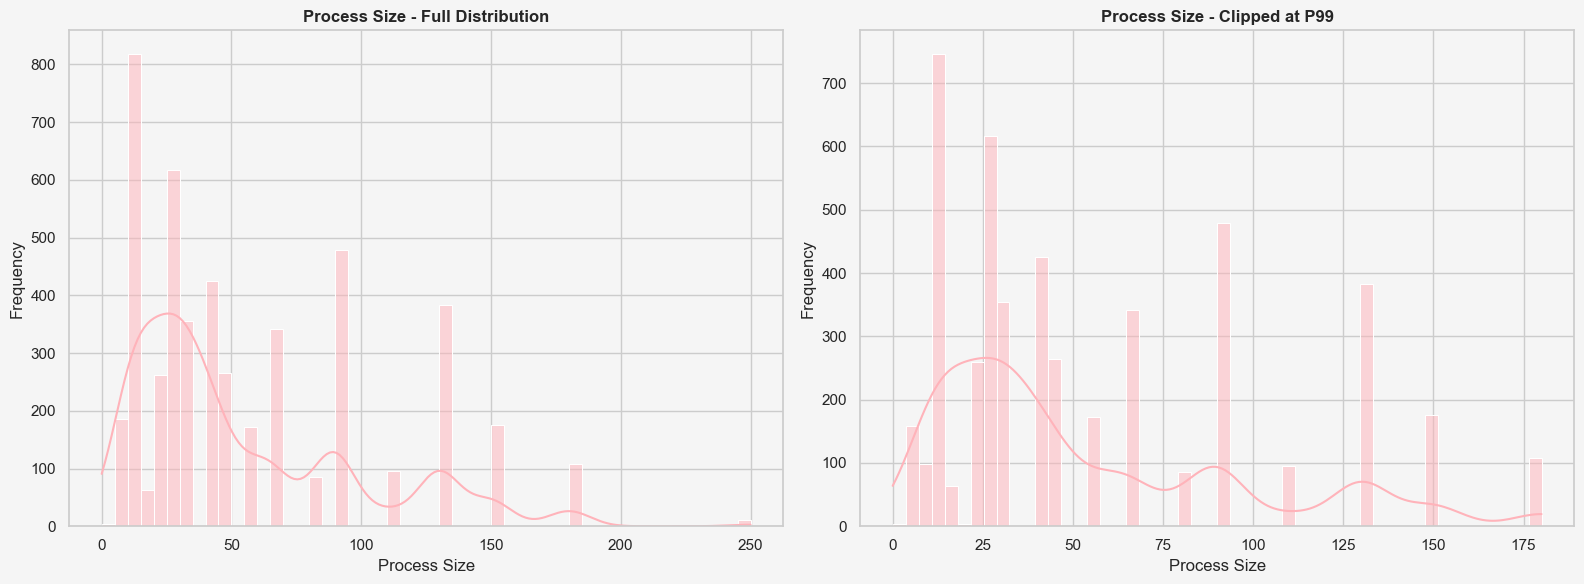

In [35]:
analyze_numerical_feature(full_data, 'Process Size')

- The `Process Size` ranges from **0 nm to 250 nm**, with a median of **40 nm**, reflecting significant technological evolution over time.
- The most common node sizes are **14 nm** and **28 nm**, together representing over **25%** of all entries.
- A few entries report **0 nm**, likely indicating placeholder or erroneous data.
- The distribution is **right-skewed**, with older, larger process nodes still well-represented in the dataset.

### 3.5) TDP

===== Summary of feature: TDP =====

Feature: TDP
------------------------------------------------------------
Data Type: float64
Missing Values: 626 (12.90%)
------------------------------------------------------------
Description:
count    4228.000000
mean       81.359981
std        76.807808
min         1.000000
25%        33.000000
50%        65.000000
75%       100.000000
max       900.000000
Name: TDP, dtype: float64
------------------------------------------------------------
Value Counts (All):
       Count  Frequency (%)
TDP                        
NaN      626      12.896580
65.0     341       7.025134
35.0     315       6.489493
15.0     229       4.717759
95.0     181       3.728883
...      ...            ...
189.0      1       0.020602
102.0      1       0.020602
286.0      1       0.020602
345.0      1       0.020602
900.0      1       0.020602

[201 rows x 2 columns]


===== Box Plot =====



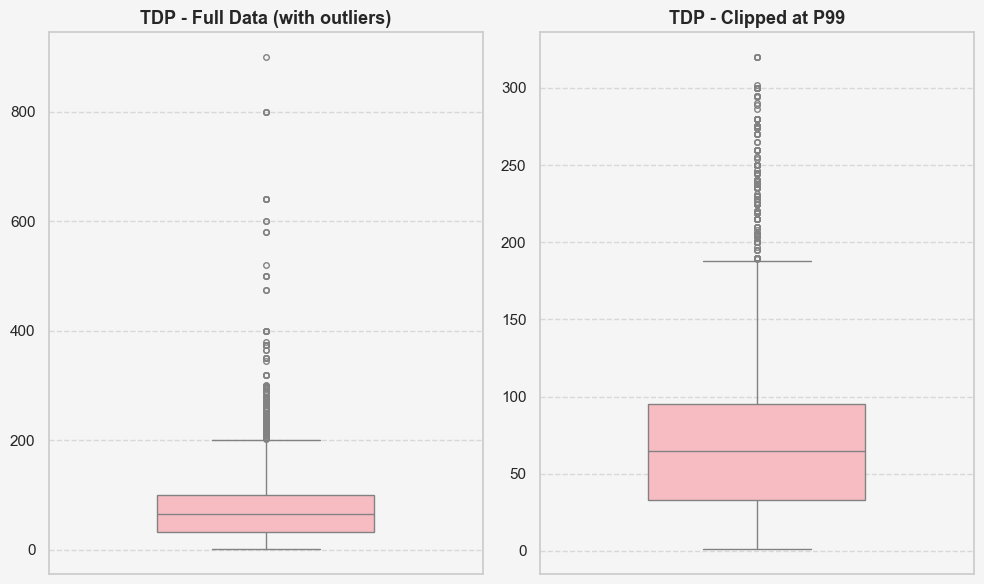


===== Histogram Comparison (Full vs Clipped) =====



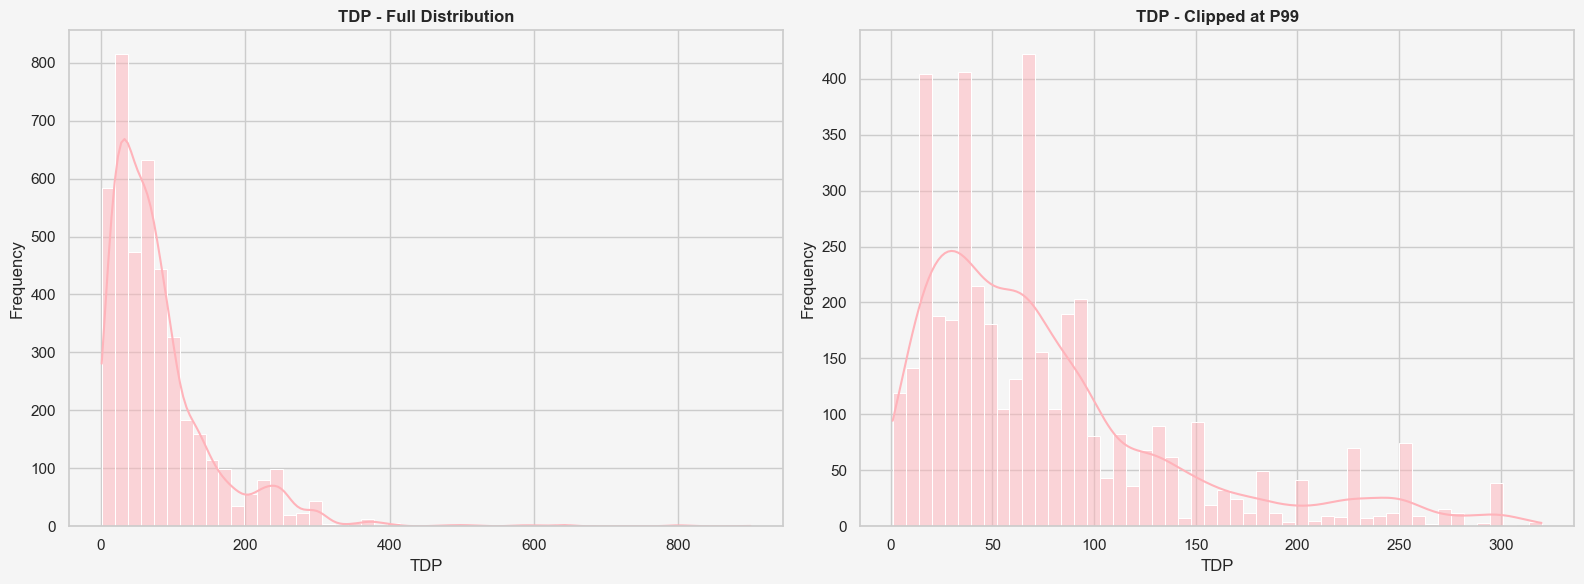

In [38]:
analyze_numerical_feature(full_data, 'TDP')

- The `TDP` values range from **1W to 900W**, with a median of **65W**, reflecting a wide variety of chip power profiles.
- The most frequent TDP ratings are **65W**, **35W**, and **15W**, suggesting common power targets for mainstream processors.
- The distribution is **right-skewed**, with a small number of high-power chips pushing the maximum to **900W**.
- About **12.9%** of entries are missing TDP values, indicating gaps in thermal specification coverage.

### 3.6) Die Size

===== Summary of feature: Die Size =====

Feature: Die Size
------------------------------------------------------------
Data Type: float64
Missing Values: 715 (14.73%)
------------------------------------------------------------
Description:
count    4139.000000
mean      188.440445
std       126.189383
min         1.000000
25%       104.000000
50%       148.000000
75%       239.000000
max       826.000000
Name: Die Size, dtype: float64
------------------------------------------------------------
Value Counts (All):
          Count  Frequency (%)
Die Size                      
NaN         715      14.730119
118.0       130       2.678204
246.0       103       2.121961
123.0        94       1.936547
160.0        93       1.915946
...         ...            ...
322.0         1       0.020602
279.0         1       0.020602
348.0         1       0.020602
209.0         1       0.020602
222.0         1       0.020602

[192 rows x 2 columns]


===== Box Plot =====



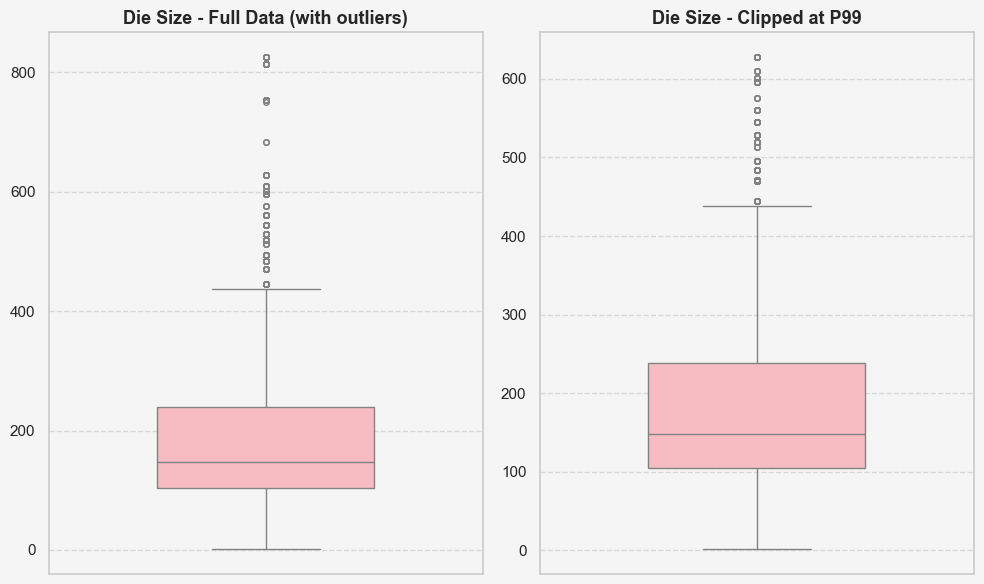


===== Histogram Comparison (Full vs Clipped) =====



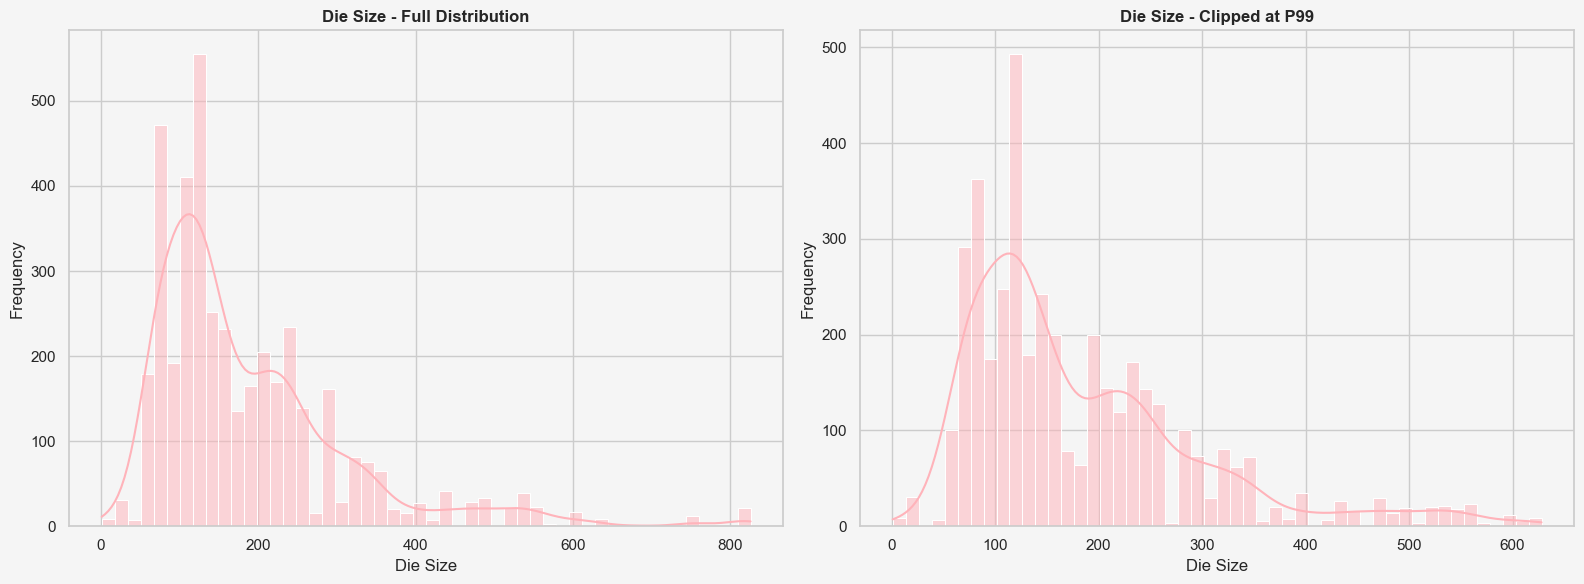

In [41]:
analyze_numerical_feature(full_data, 'Die Size')

- The `Die Size` ranges from **1 mm² to 826 mm²**, with a median of **148 mm²**, indicating wide variation in chip complexity and integration.
- The average die size is **188.44 mm²**, with significant spread, as shown by a high standard deviation of **126.19**.
- Common die sizes include **118 mm²** and **246 mm²**, but most values are dispersed across many unique sizes.
- Approximately **14.7%** of entries are missing die size data, representing a notable gap in chip physical specifications.

### 3.7) Transistors

===== Summary of feature: Transistors =====

Feature: Transistors
------------------------------------------------------------
Data Type: float64
Missing Values: 711 (14.65%)
------------------------------------------------------------
Description:
count     4143.000000
mean      1929.922279
std       4044.891098
min          8.000000
25%        154.000000
50%        624.000000
75%       1550.000000
max      54200.000000
Name: Transistors, dtype: float64
------------------------------------------------------------
Value Counts (All):
             Count  Frequency (%)
Transistors                      
NaN            711      14.647713
1400.0         173       3.564071
1178.0         118       2.430985
106.0          102       2.101360
63.0            63       1.297899
...            ...            ...
880.0            1       0.020602
420.0            1       0.020602
49.0             1       0.020602
463.0            1       0.020602
198.0            1       0.020602

[197 rows x 2 col

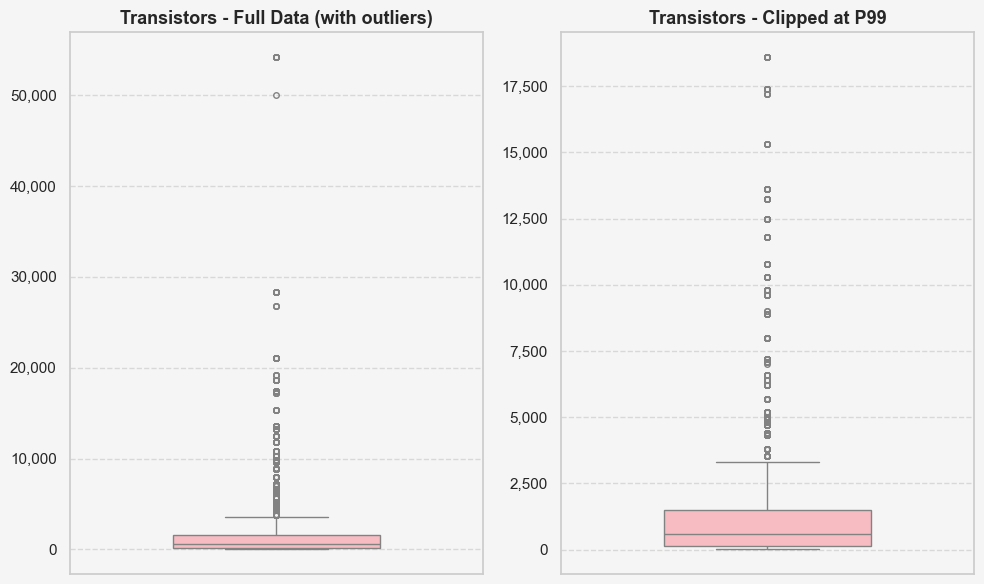


===== Histogram Comparison (Full vs Clipped) =====



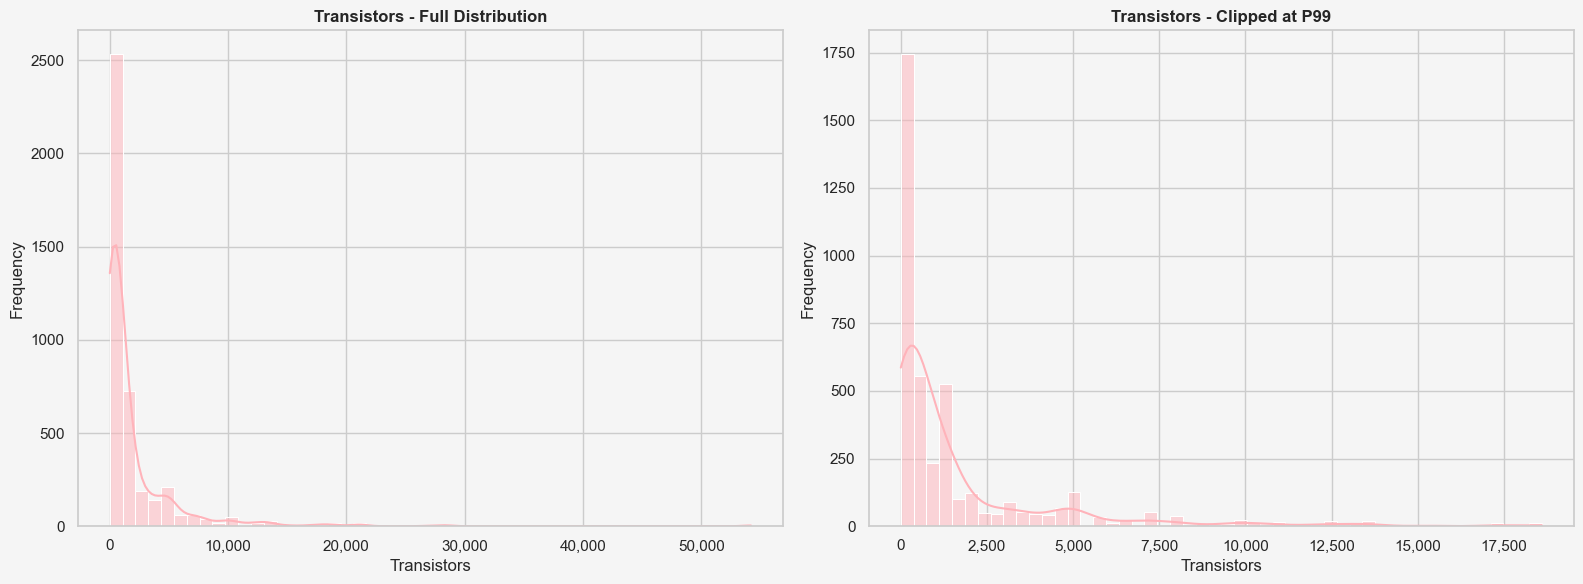

In [44]:
analyze_numerical_feature(full_data, 'Transistors')

- The `Transistors` count varies widely from **8 million to 54.2 billion**, with a highly skewed distribution and a median of **624 million**.
- The mean transistor count is **1.93 billion**, but the large standard deviation (**4.04 billion**) reflects extreme upper outliers.
- Common values like **1.4B** and **1.178B** suggest clustering around modern mainstream chip designs.
- About **14.65%** of entries are missing, indicating partial coverage of transistor count data across products.

### 3.8) Freq

===== Summary of feature: Freq =====

Feature: Freq
------------------------------------------------------------
Data Type: float64
Missing Values: 0 (0.00%)
------------------------------------------------------------
Description:
count    4854.000000
mean     1484.406057
std      1066.701523
min       100.000000
25%       590.000000
50%      1073.500000
75%      2400.000000
max      4700.000000
Name: Freq, dtype: float64
------------------------------------------------------------
Value Counts (All):
        Count  Frequency (%)
Freq                        
2400.0    138       2.843016
2000.0    138       2.843016
500.0     131       2.698805
300.0     128       2.637000
2200.0    124       2.554594
...       ...            ...
2830.0      1       0.020602
844.0       1       0.020602
2790.0      1       0.020602
1038.0      1       0.020602
416.0       1       0.020602

[527 rows x 2 columns]


===== Box Plot =====



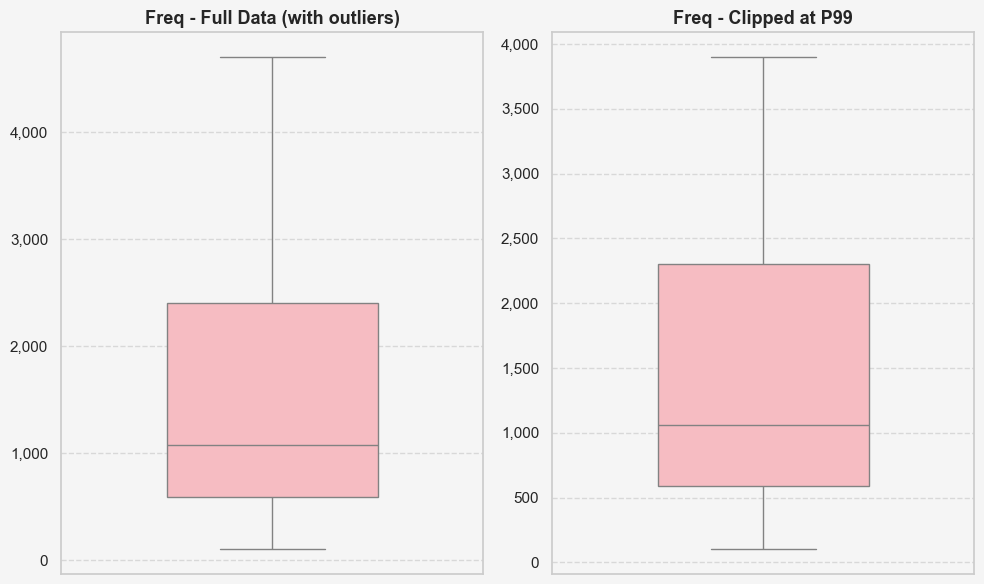


===== Histogram Comparison (Full vs Clipped) =====



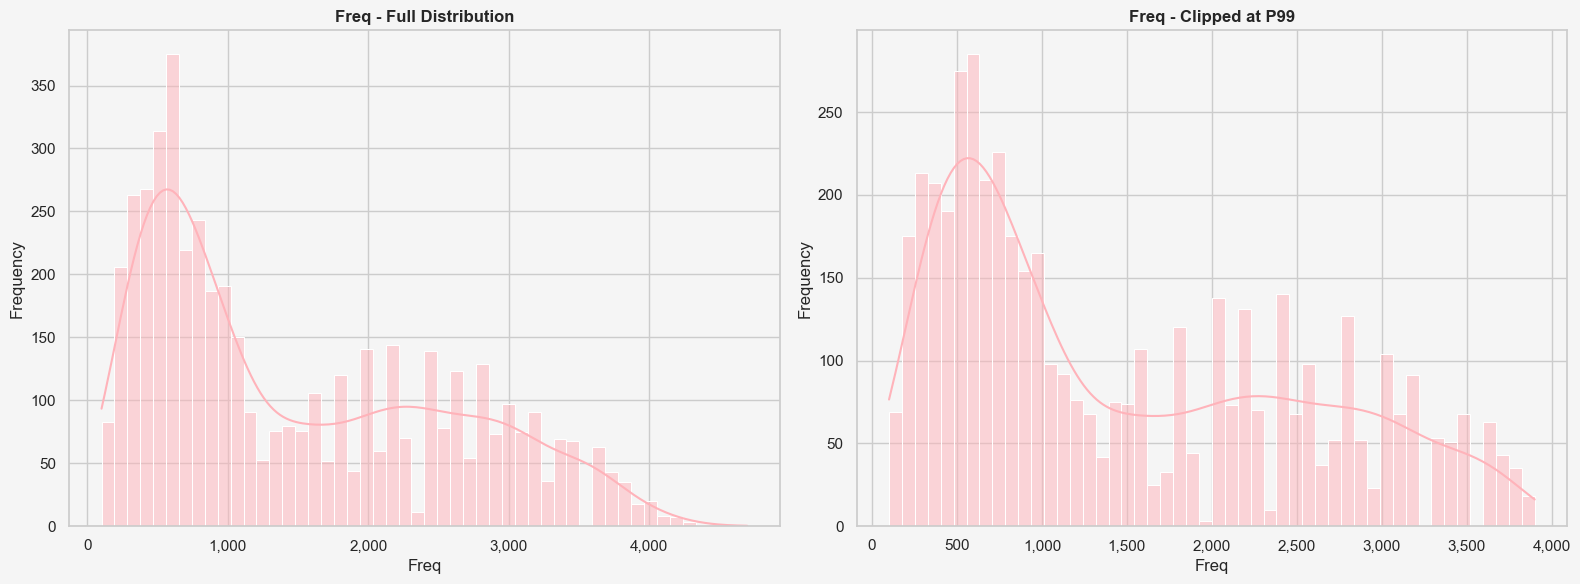

In [47]:
analyze_numerical_feature(full_data, 'Freq')

- The `Freq` feature ranges from **100 MHz to 4700 MHz**, with a median of **1073.5 MHz**, capturing a broad spectrum of chip performance tiers.
- The average frequency is **1484 MHz**, but the large standard deviation (**1066.7 MHz**) suggests high variability across products.
- Frequencies like **2000 MHz** and **2400 MHz** are among the most common, reflecting standard operating levels for modern chips.
- All entries are complete with **0% missing values**, making this a reliable feature for performance-related analysis.

### 3.9) Foundry

===== Summary of feature: Foundry =====

Feature: Foundry
------------------------------------------------------------
Data Type: object
Missing Values: 0 (0.00%)
------------------------------------------------------------
Description:
count     4854
unique      10
top       TSMC
freq      2178
Name: Foundry, dtype: object
------------------------------------------------------------
Value Counts (All):
         Count  Frequency (%)
Foundry                      
TSMC      2178      44.870210
Intel     1390      28.636176
Unknown    866      17.840956
GF         265       5.459415
UMC         79       1.627524
Samsung     60       1.236094
Sony        10       0.206016
IBM          3       0.061805
NEC          2       0.041203
Renesas      1       0.020602


===== Pie Chart =====



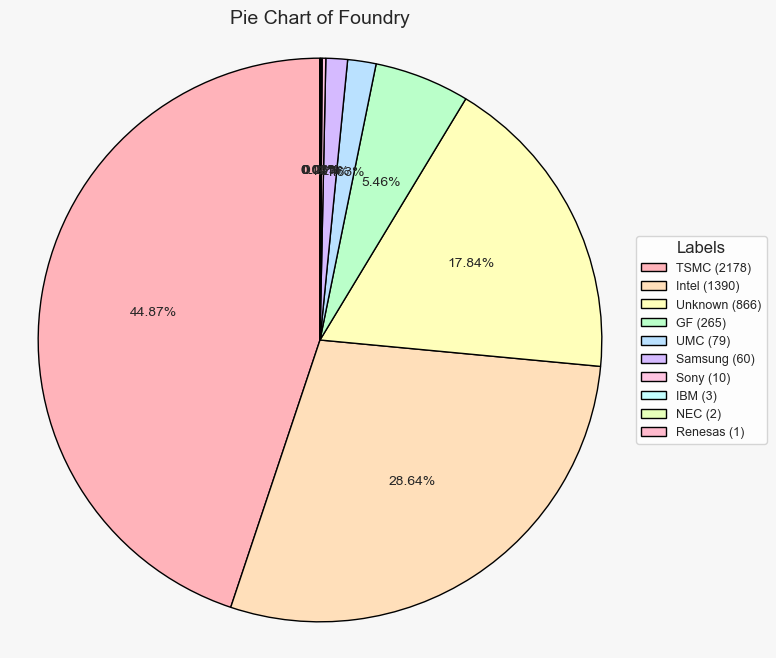


===== Bar Chart =====



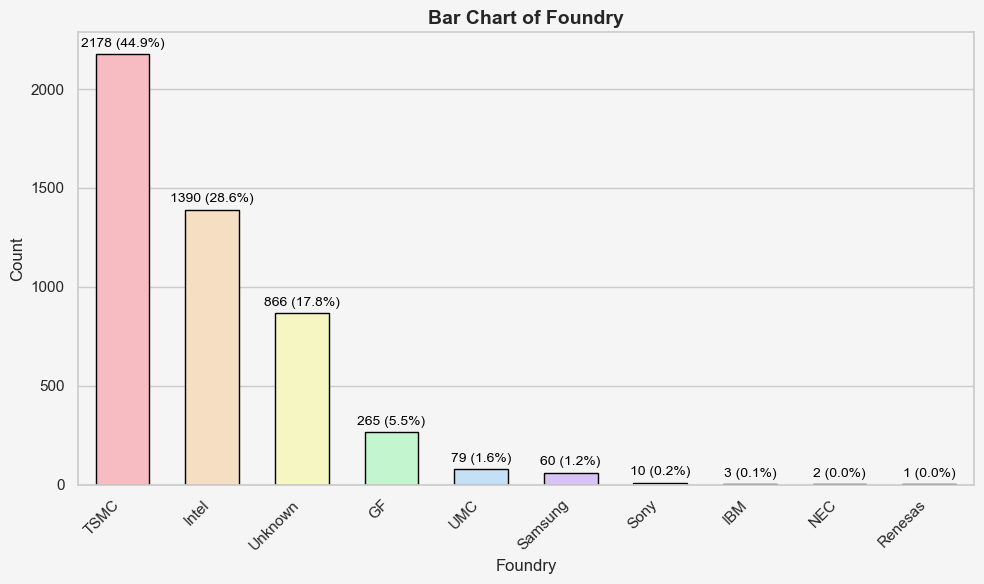

In [50]:
analyze_categorical_feature(full_data, 'Foundry')

- The `Foundry` column includes **10 unique manufacturers**, with **TSMC** dominating at **44.87%** of all entries.
- **Intel** also represents a significant portion (**28.64%**), while other foundries like **GF**, **UMC**, and **Samsung** contribute marginally.
- A notable **17.84%** of entries are labeled as **Unknown**, indicating incomplete manufacturing source data.
- The distribution highlights a strong concentration of chip production among a few major foundries.

### 3.10) Vendor

===== Summary of feature: Vendor =====

Feature: Vendor
------------------------------------------------------------
Data Type: object
Missing Values: 0 (0.00%)
------------------------------------------------------------
Description:
count     4854
unique       5
top        AMD
freq      1662
Name: Vendor, dtype: object
------------------------------------------------------------
Value Counts (All):
        Count  Frequency (%)
Vendor                      
AMD      1662      34.239802
Intel    1392      28.677379
NVIDIA   1201      24.742480
ATI       535      11.021838
Other      64       1.318500


===== Pie Chart =====



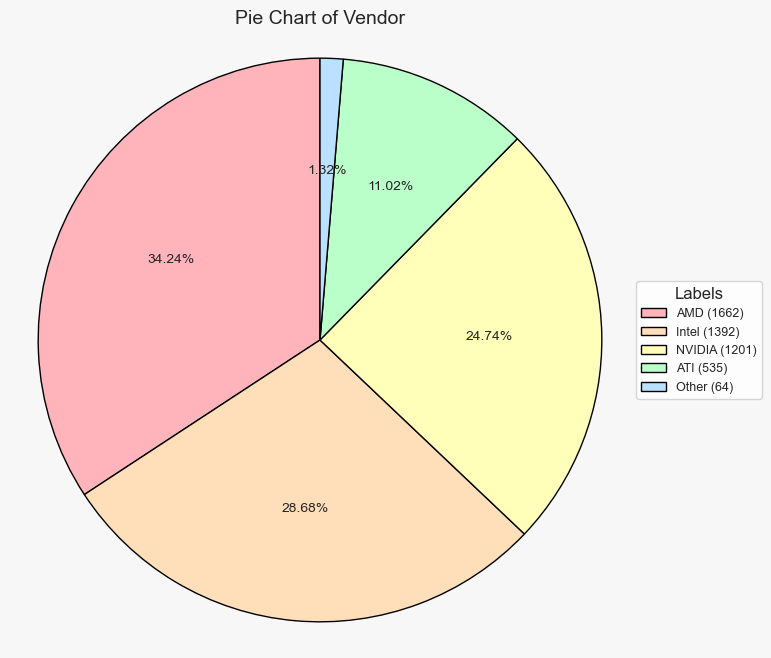


===== Bar Chart =====



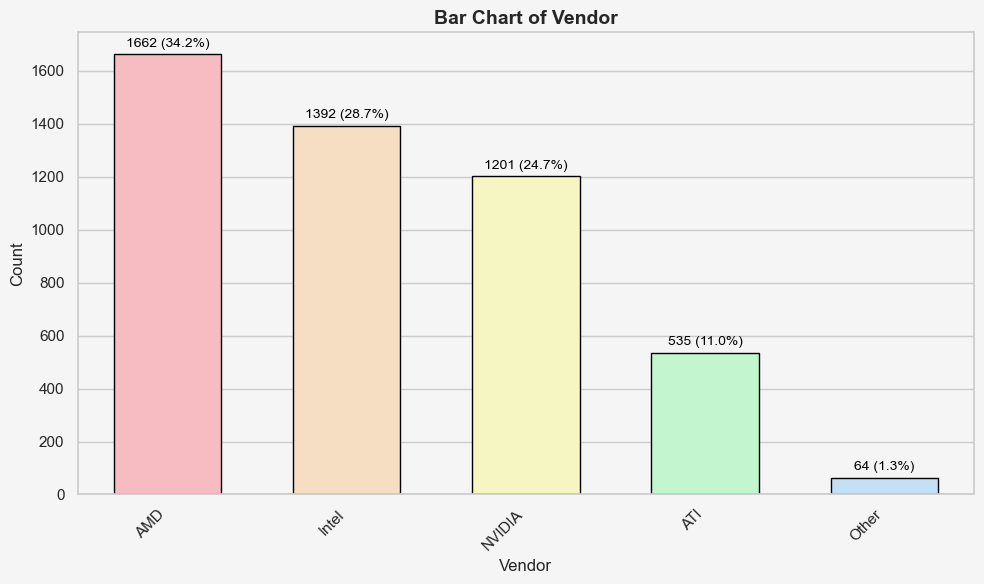

In [53]:
analyze_categorical_feature(full_data, 'Vendor')

- The `Vendor` feature includes **5 unique chip makers**, with **AMD** leading at **34.24%**, followed by **Intel (28.68%)** and **NVIDIA (24.74%)**.
- **ATI** accounts for **11.02%**, likely representing legacy GPUs before AMD’s acquisition.
- A small portion (**1.32%**) is labeled as **Other**, capturing less common or unidentified vendors.
- The distribution reflects a market dominated by three major players, with AMD having the largest representation.

### 3.11) FP16 GFLOPS

===== Summary of feature: FP16 GFLOPS =====

Feature: FP16 GFLOPS
------------------------------------------------------------
Data Type: float64
Missing Values: 4318 (88.96%)
------------------------------------------------------------
Description:
count       536.000000
mean       8397.459851
std       13799.551131
min          10.020000
25%         768.800000
50%        2965.500000
75%       10600.000000
max      184600.000000
Name: FP16 GFLOPS, dtype: float64
------------------------------------------------------------
Value Counts (All):
             Count  Frequency (%)
FP16 GFLOPS                      
NaN           4318      88.957561
768.00          10       0.206016
1248.00          8       0.164813
921.60           7       0.144211
786.40           7       0.144211
...            ...            ...
33.41            1       0.020602
89.12            1       0.020602
27480.00         1       0.020602
251.50           1       0.020602
1505.00          1       0.020602

[344 row

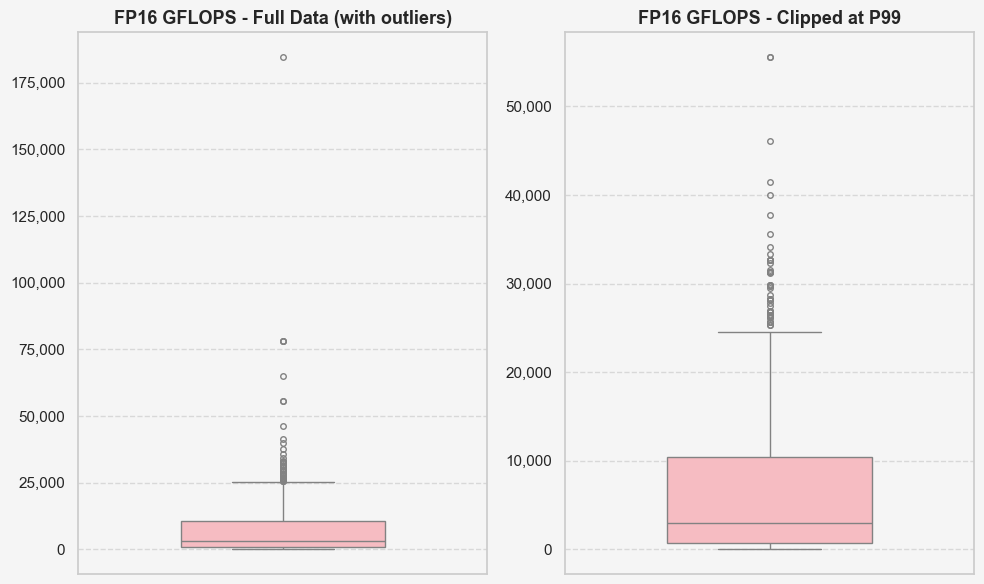


===== Histogram Comparison (Full vs Clipped) =====



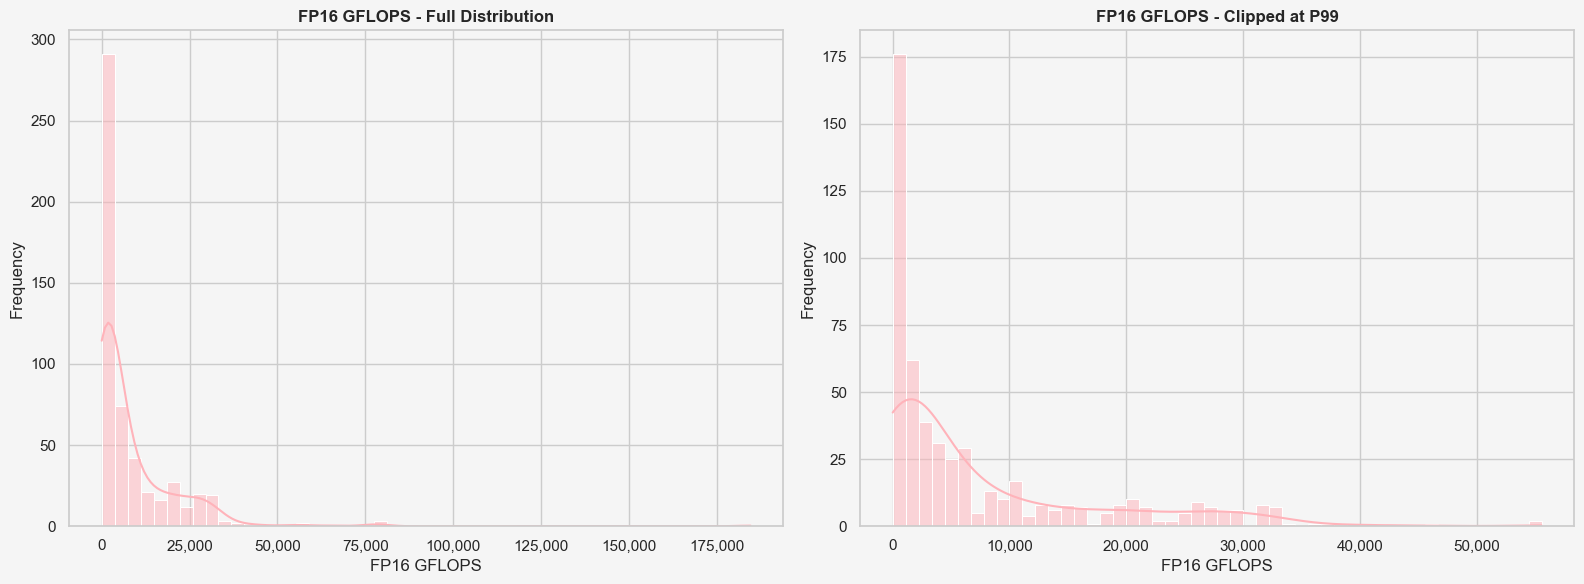

In [56]:
analyze_numerical_feature(full_data, 'FP16 GFLOPS')

- The `FP16 GFLOPS` metric is available for only **11.04%** of entries, with a high missing rate of **88.96%**.
- Performance values range widely from **10.02 to 184,600 GFLOPS**, with a median of **2,965.5 GFLOPS**.
- The distribution is highly **right-skewed**, driven by a few extremely high-performing chips.
- Despite limited coverage, the available data captures a broad spectrum of 16-bit floating-point compute capabilities.

### 3.12) FP32 GFLOPS

===== Summary of feature: FP32 GFLOPS =====

Feature: FP32 GFLOPS
------------------------------------------------------------
Data Type: float64
Missing Values: 2906 (59.87%)
------------------------------------------------------------
Description:
count     1948.000000
mean      2134.756653
std       3898.431487
min         12.800000
25%        257.300000
50%        696.000000
75%       2116.750000
max      40000.000000
Name: FP32 GFLOPS, dtype: float64
------------------------------------------------------------
Value Counts (All):
             Count  Frequency (%)
FP32 GFLOPS                      
NaN           2906      59.868150
384.00          28       0.576844
80.00           23       0.473836
240.00          23       0.473836
96.00           18       0.370828
...            ...            ...
1326.00          1       0.020602
78.08            1       0.020602
574.10           1       0.020602
2812.00          1       0.020602
41.52            1       0.020602

[822 rows x 2 co

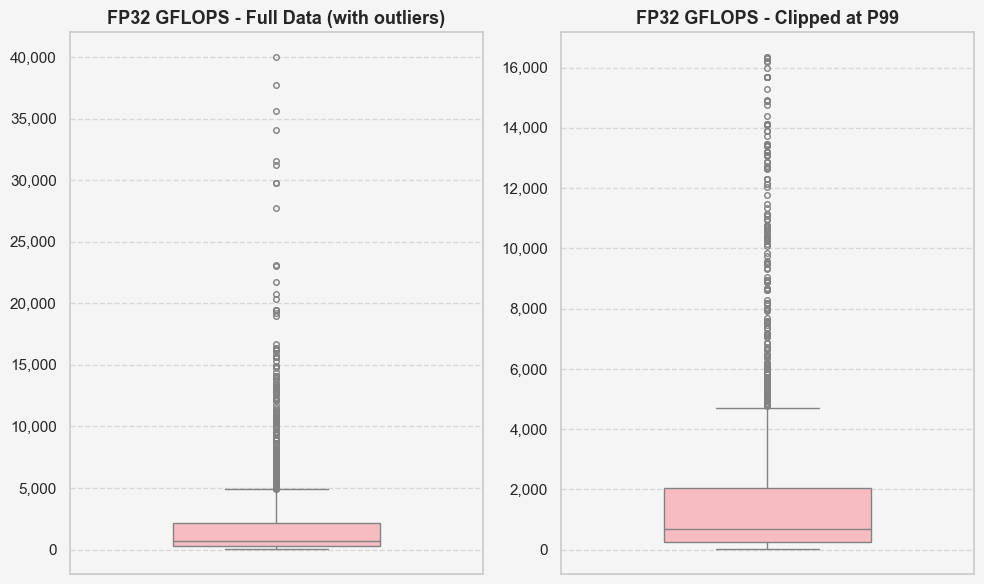


===== Histogram Comparison (Full vs Clipped) =====



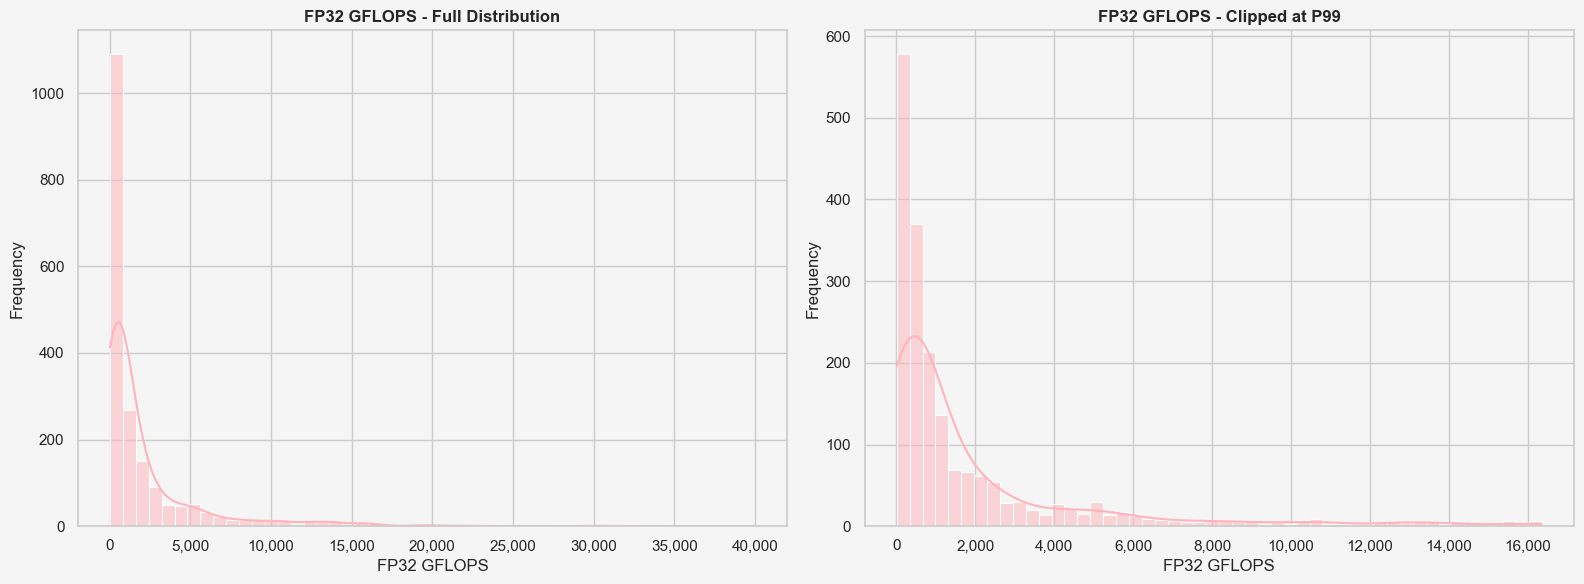

In [59]:
analyze_numerical_feature(full_data, 'FP32 GFLOPS')

- The `FP32 GFLOPS` feature is present in **40.13%** of the dataset, with a missing rate of **59.87%**.
- Values span from **12.8 to 40,000 GFLOPS**, with a median of **696 GFLOPS**, indicating a wide range of compute capabilities.
- The distribution is **heavily right-skewed**, with a few high-end chips exhibiting extremely high performance.
- Common performance tiers cluster between **240–384 GFLOPS**, reflecting typical mainstream GPU capabilities.

### 3.12) FP64 GFLOPS

===== Summary of feature: FP64 GFLOPS =====

Feature: FP64 GFLOPS
------------------------------------------------------------
Data Type: float64
Missing Values: 3548 (73.09%)
------------------------------------------------------------
Description:
count     1306.000000
mean       363.670511
std       1145.931856
min          3.600000
25%         38.295000
50%         89.280000
75%        220.000000
max      11540.000000
Name: FP64 GFLOPS, dtype: float64
------------------------------------------------------------
Value Counts (All):
             Count  Frequency (%)
FP64 GFLOPS                      
NaN           3548      73.094355
96.00           18       0.370828
43.20           12       0.247219
77.76           12       0.247219
95.36           12       0.247219
...            ...            ...
67.31            1       0.020602
88.20            1       0.020602
207.40           1       0.020602
73.92            1       0.020602
36.00            1       0.020602

[673 rows x 2 co

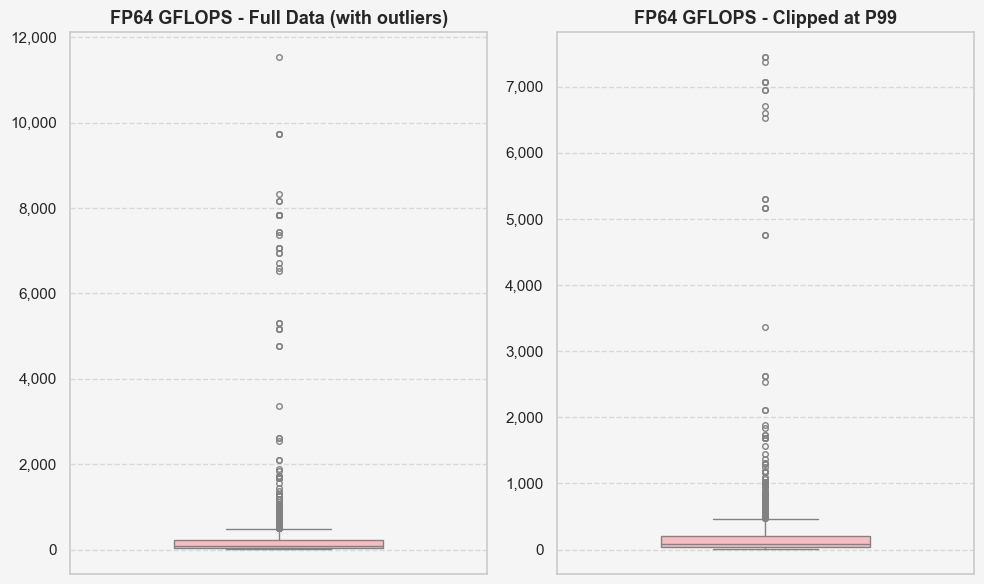


===== Histogram Comparison (Full vs Clipped) =====



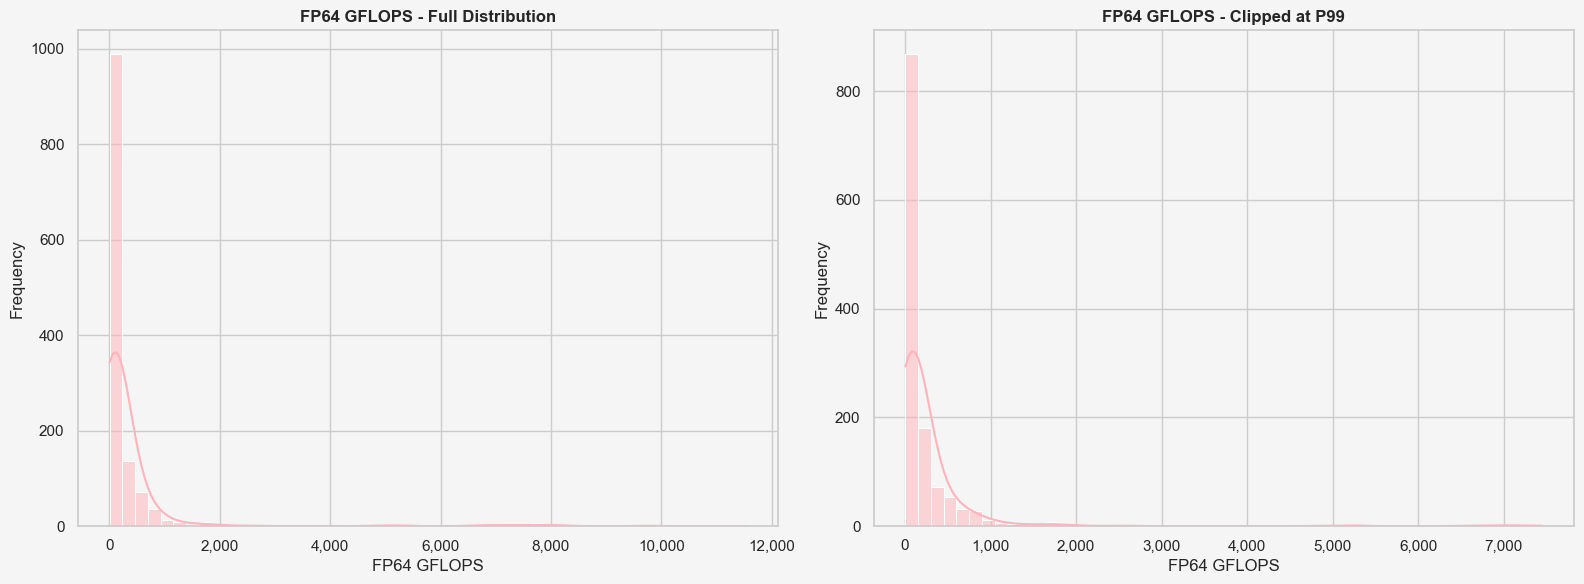

In [62]:
analyze_numerical_feature(full_data, 'FP64 GFLOPS')

- The `FP64 GFLOPS` metric is missing in **73.09%** of entries, limiting its analytical completeness.
- Recorded values range from **3.6 to 11,540 GFLOPS**, with a median of **89.28 GFLOPS**, showing wide variation in double-precision performance.
- The average is **363.67 GFLOPS**, but the high standard deviation indicates a few chips with exceptionally high throughput.
- Performance values commonly cluster around **43–96 GFLOPS**, suggesting moderate double-precision capabilities for most products.

## 4) Bivariate analysis

### 4.1) Numerical vs numerical features (Correlation & scatter plots)

#### 4.1.1) Scatter plots

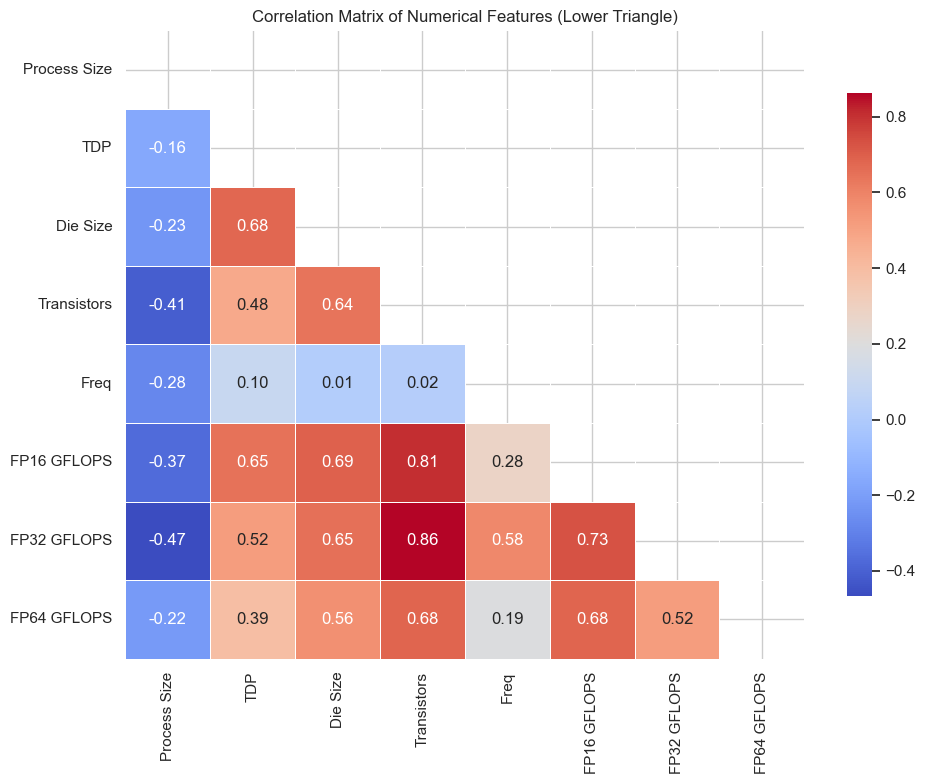

In [67]:
# Select numerical features to analyze correlation
numerical_cols = [
    'Process Size', 'TDP', 'Die Size',
    'Transistors', 'Freq', 'FP16 GFLOPS',
    'FP32 GFLOPS', 'FP64 GFLOPS'
]

# Compute pairwise Pearson correlation matrix
corr = full_data[numerical_cols].corr()

# Mask the upper triangle for a cleaner lower-triangle heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': .8}
)
plt.title('Correlation Matrix of Numerical Features (Lower Triangle)')
plt.tight_layout()
plt.show()


**Correlation Matrix Summary (Numerical Features)**

- **Transistors** have the strongest positive correlations with performance metrics:
  - FP32 GFLOPS (0.86), FP16 GFLOPS (0.81), and Die Size (0.64).
- **Die Size** is strongly correlated with TDP (0.68) and all GFLOPS values, suggesting larger chips tend to be more powerful and power-hungry.
- **Process Size** shows moderate to strong **negative correlations** with all key performance indicators, especially FP32 GFLOPS (−0.47) and Transistors (−0.41), aligning with trends in semiconductor scaling.
- **GFLOPS metrics** (FP16, FP32, FP64) are **strongly interrelated**, confirming that high compute performance generally applies across multiple precision types.

### 4.2) Numerical vs categorical features (ANOVA)

In [70]:
def plot_numerical_vs_categorical(df, numerical_cols, categorical_cols):
    """
    Plots how numerical features differ across categorical groups using bar charts and ANOVA p-values.
    """
    pastel_colors = [
        "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF",
        "#D5BAFF", "#FFC4E1", "#C4FFFF", "#E6FFBA", "#FFBACD"
    ]

    sns.set(style="whitegrid")

    for num_col in numerical_cols:
        n_cat = len(categorical_cols)
        cols_per_row = 3
        rows = math.ceil(n_cat / cols_per_row)

        # Create a grid of subplots
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 4))
        fig.suptitle(f"{num_col} vs Categorical Features", fontsize=16)
        axes = axes.flatten()

        for idx, cat_col in enumerate(categorical_cols):
            ax = axes[idx]
            sub_df = df[[num_col, cat_col]].dropna()

            # Prepare groups for ANOVA test
            categories = sub_df[cat_col].value_counts().index.tolist()
            num_categories = len(categories)
            groups = [group[num_col].values for name, group in sub_df.groupby(cat_col)]
            f_stat, p_val = f_oneway(*groups) if num_categories > 1 else (None, None)
            title_suffix = f"p = {p_val:.4f}" if p_val is not None else ""

            ax.set_facecolor("#f5f5f5")

            if num_categories <= 4:
                # Use vertical column plot for fewer categories
                avg_vals = sub_df.groupby(cat_col)[num_col].mean().sort_index()
                colors = pastel_colors[:len(avg_vals)]
                sns.barplot(x=avg_vals.index, y=avg_vals.values, palette=colors,
                            edgecolor="black", ax=ax)
                ax.set_title(f"{num_col} vs {cat_col}\n(Column Plot {title_suffix})")
                ax.set_ylabel(num_col)
                ax.set_xlabel(cat_col)
                ax.tick_params(axis='x', rotation=45)

                # Add data labels on bars
                for i, v in enumerate(avg_vals.values):
                    ax.text(i, v + 0.01 * max(avg_vals.values), f"{v:.2f}", ha='center', va='bottom', fontsize=9)

            else:
                # Use horizontal bar plot for many categories (top 10 only)
                avg_vals = sub_df.groupby(cat_col)[num_col].mean().sort_values(ascending=False).head(10)
                colors = pastel_colors[:len(avg_vals)]
                sns.barplot(y=avg_vals.index, x=avg_vals.values, palette=colors,
                            edgecolor="black", ax=ax)
                ax.set_title(f"{num_col} vs {cat_col}\n(Bar Plot {title_suffix})")
                ax.set_xlabel(num_col)
                ax.set_ylabel(cat_col)

                # Add data labels inside bars
                for i, (cat, val) in enumerate(avg_vals.items()):
                    ax.text(val / 2, i, f"{val:.2f}", va='center', ha='center', fontsize=9)

        # Hide unused subplots
        for j in range(len(categorical_cols), len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout to fit the title
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()


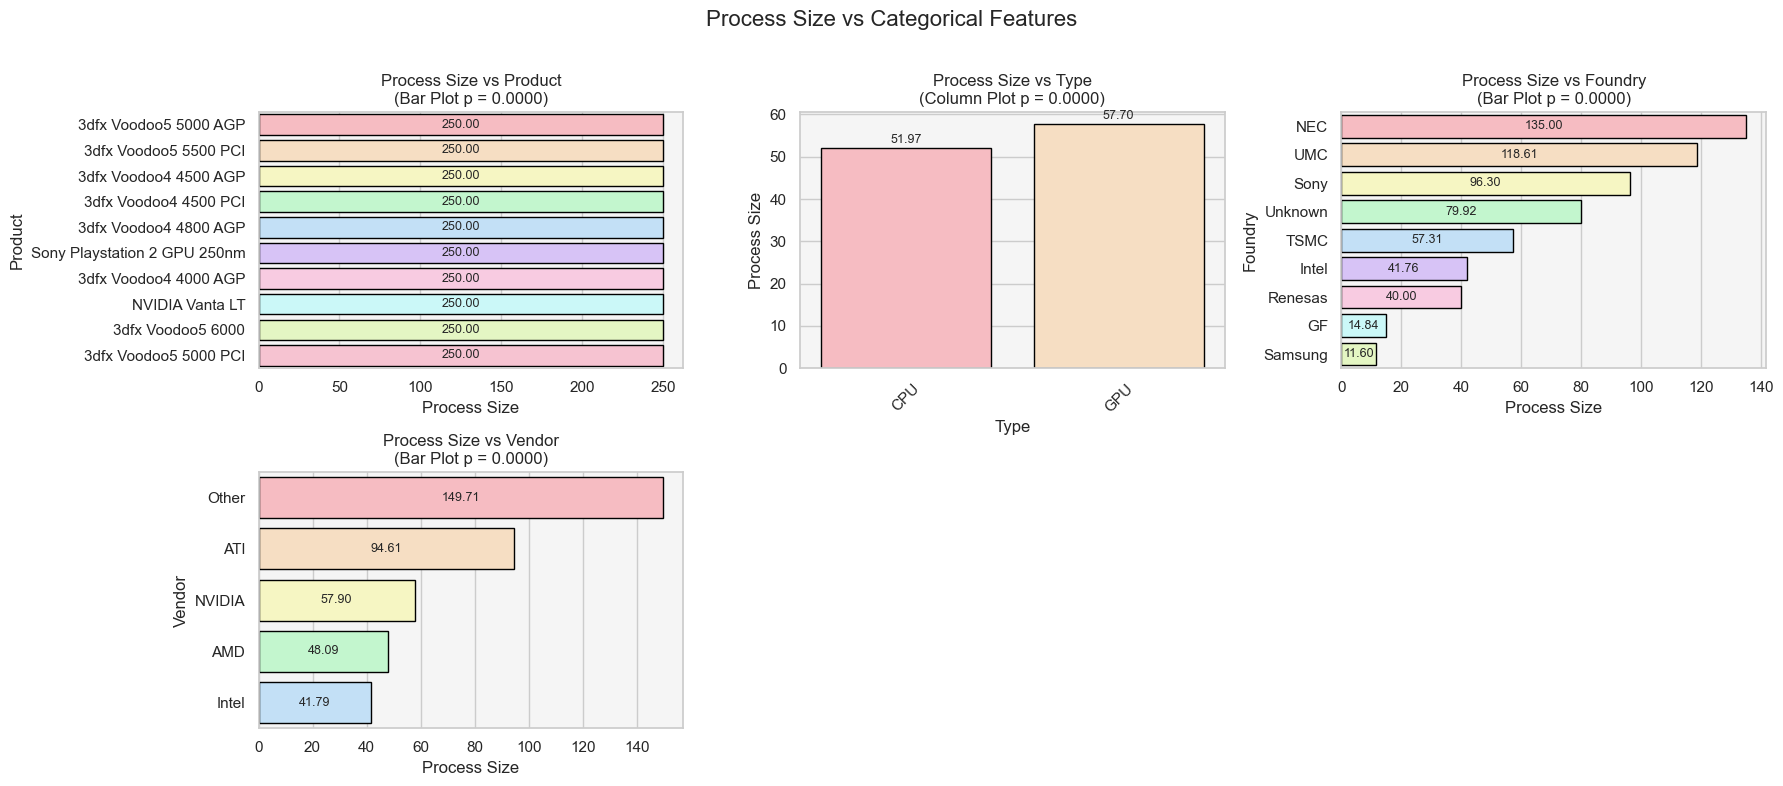

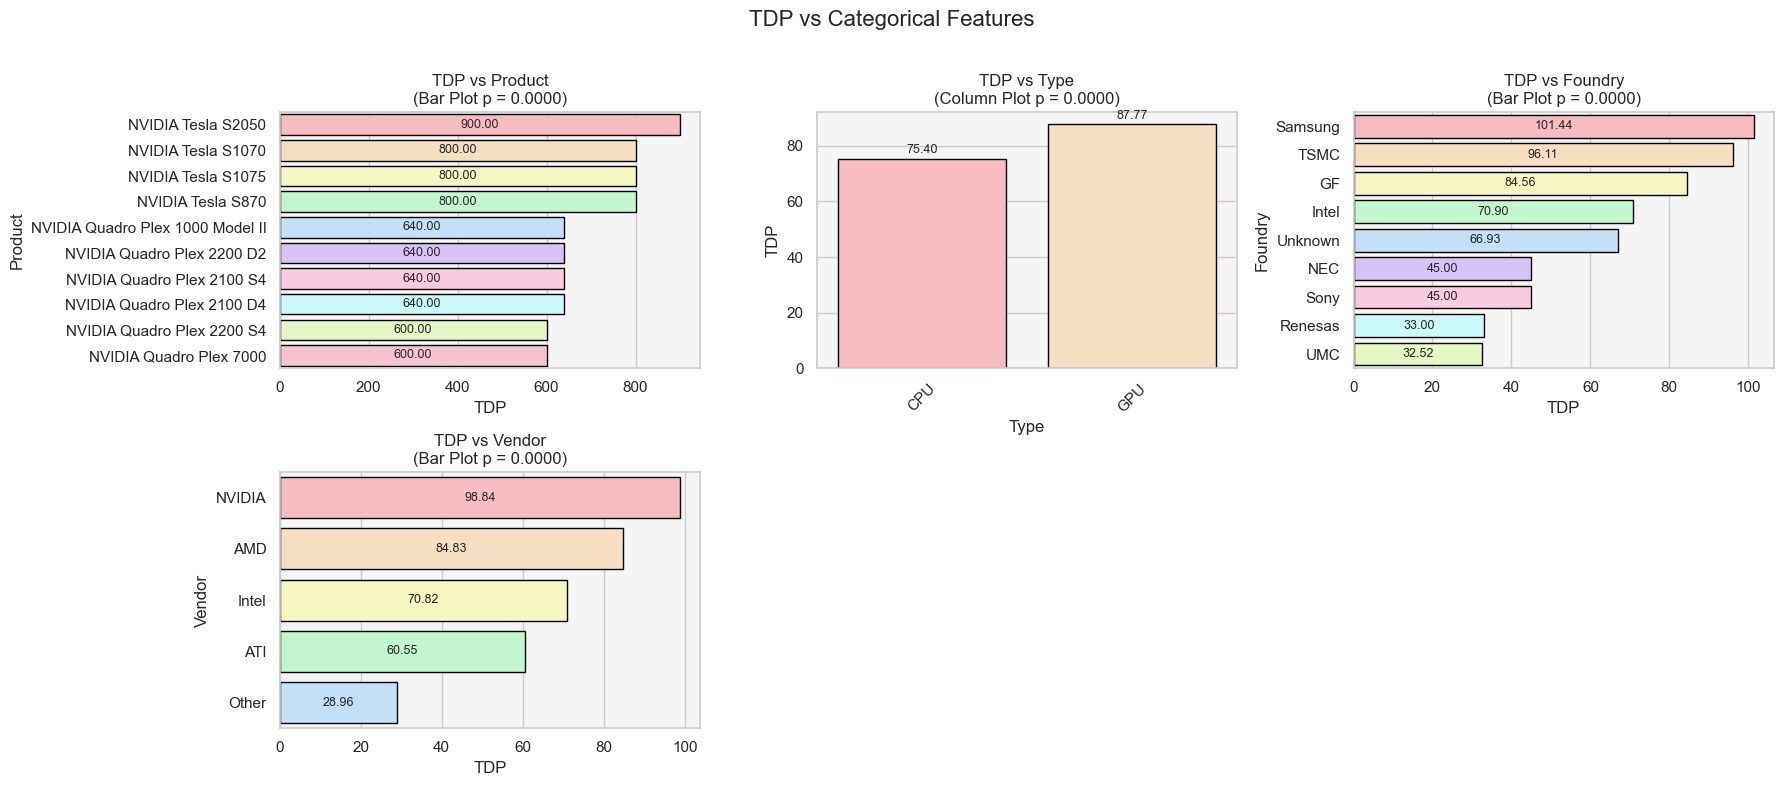

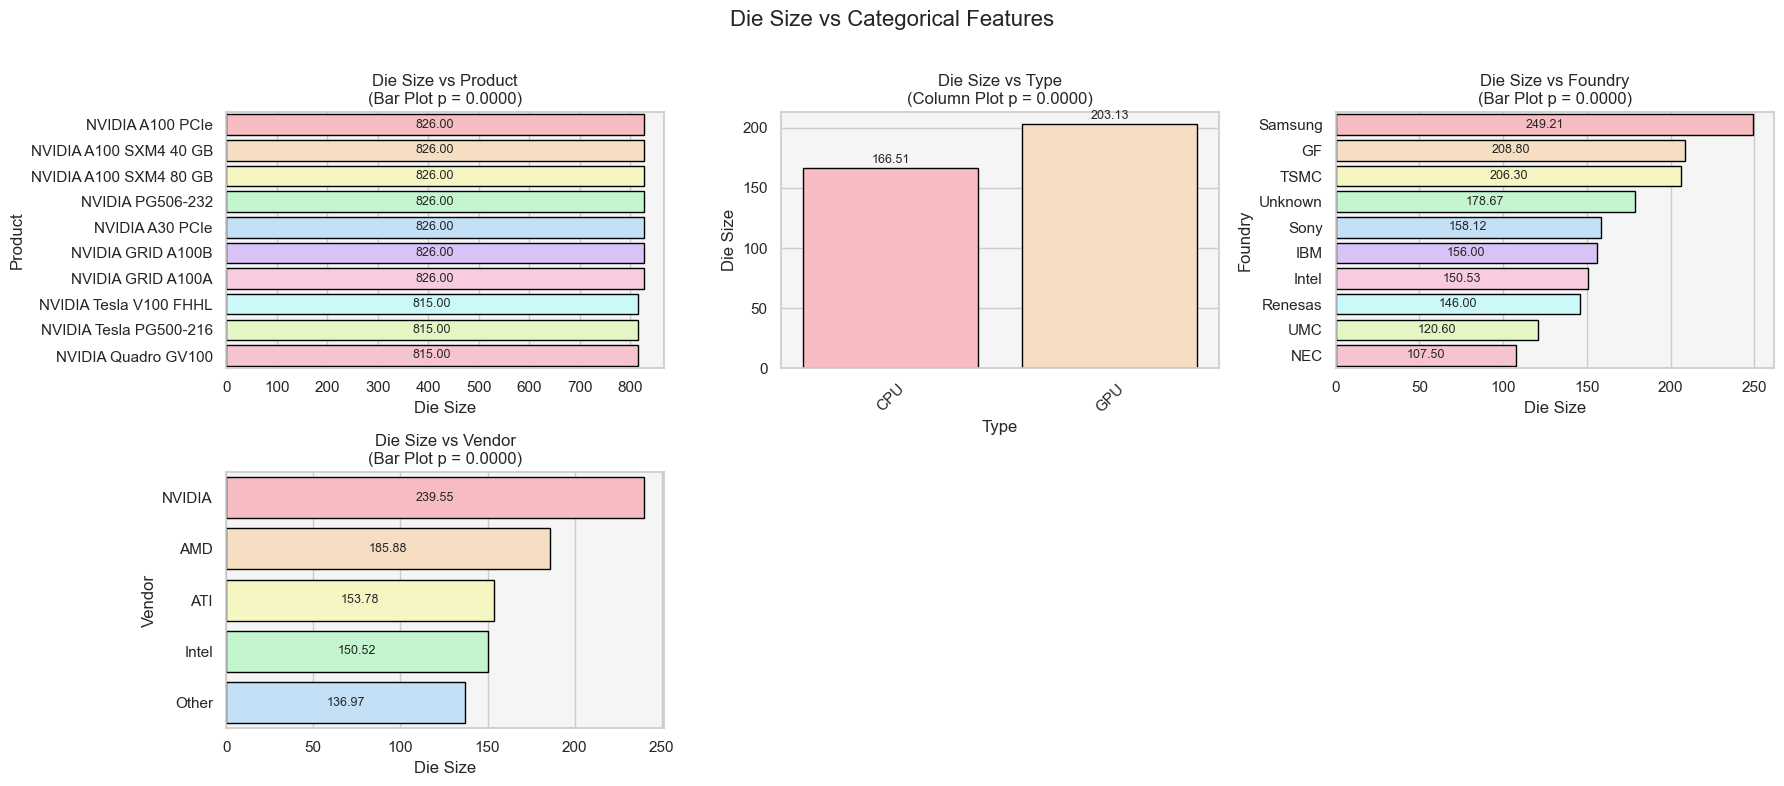

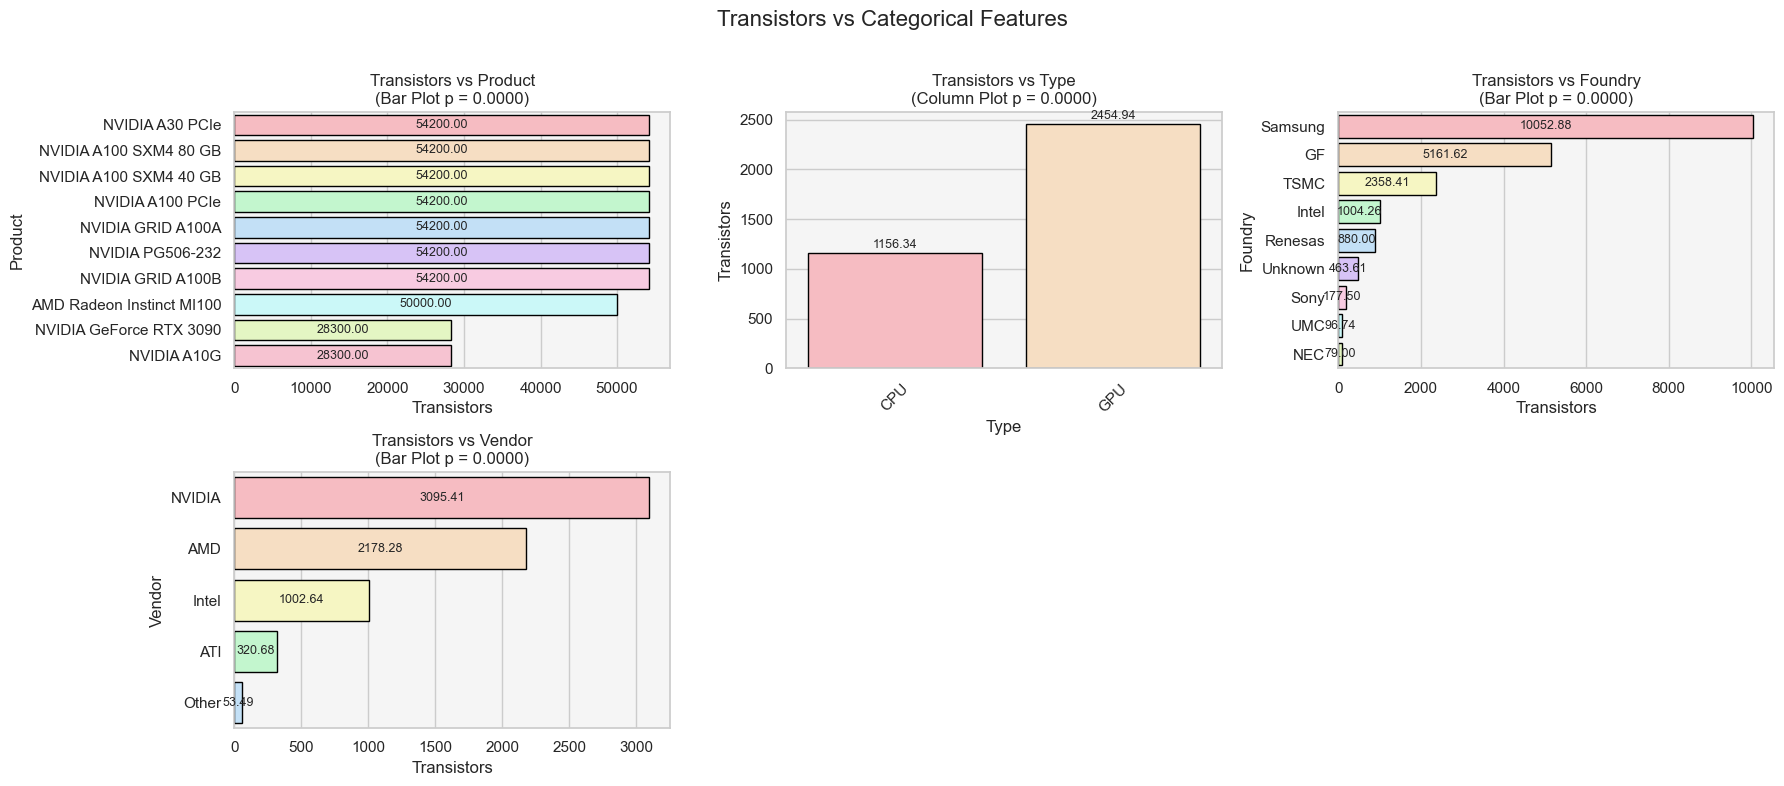

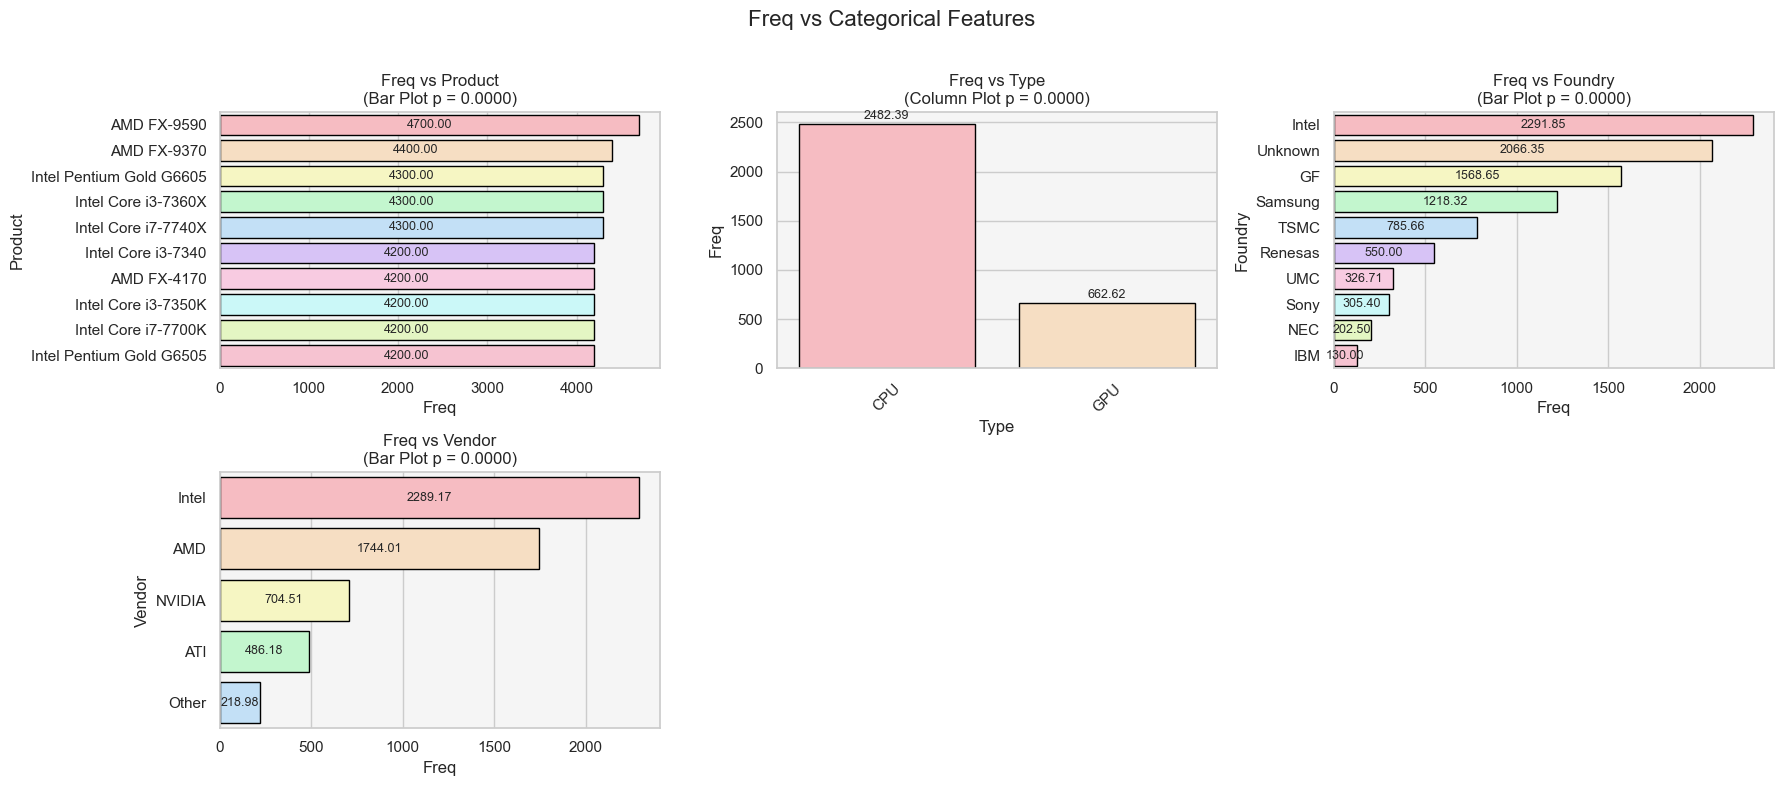

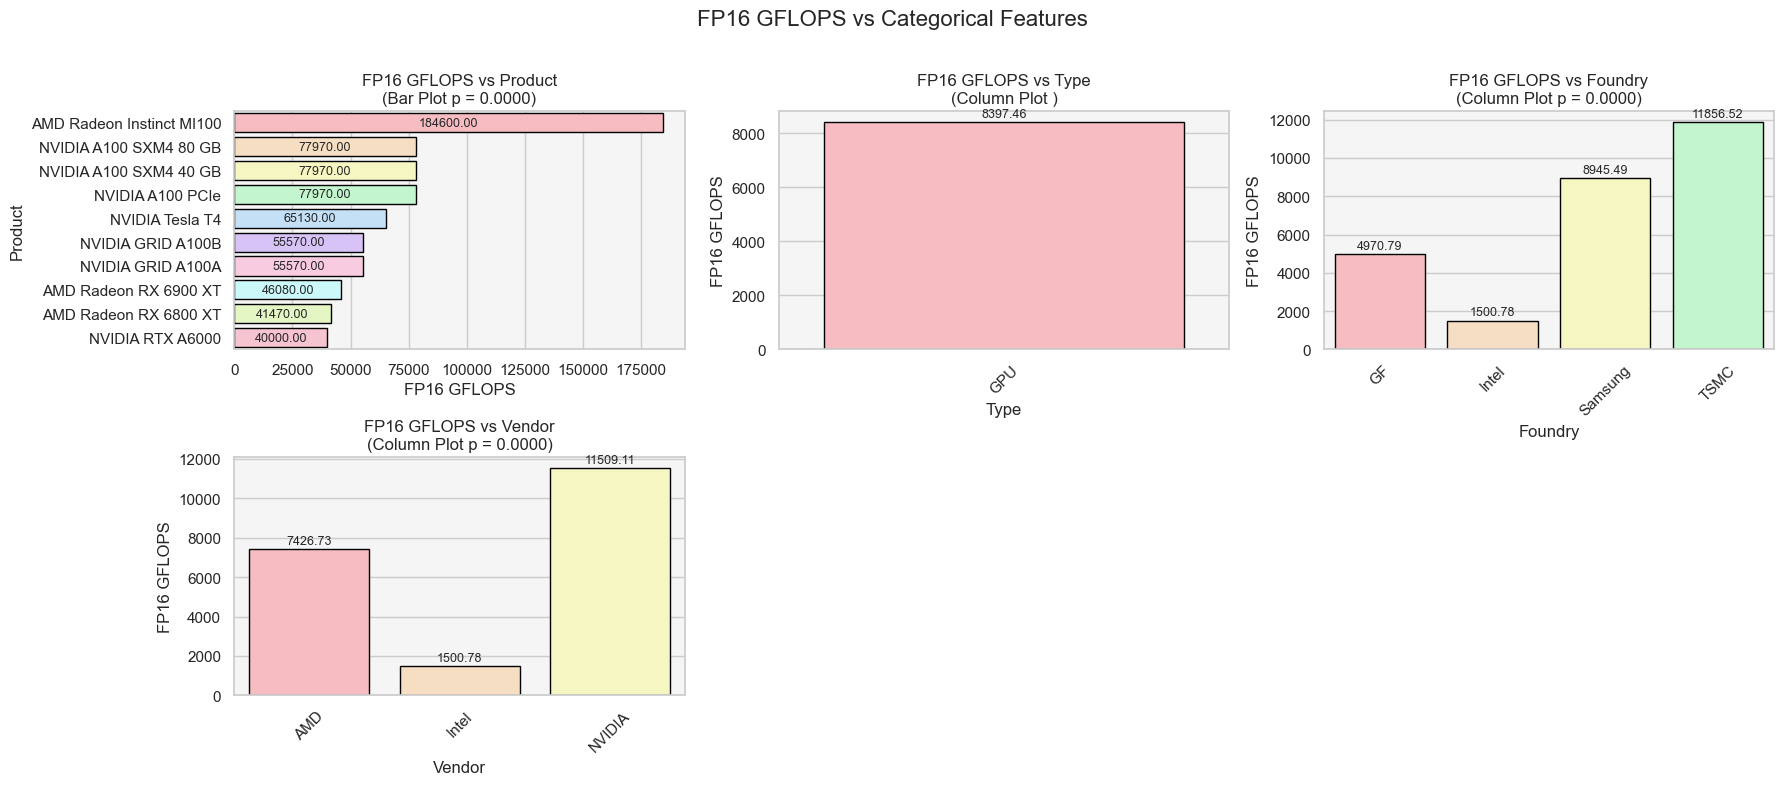

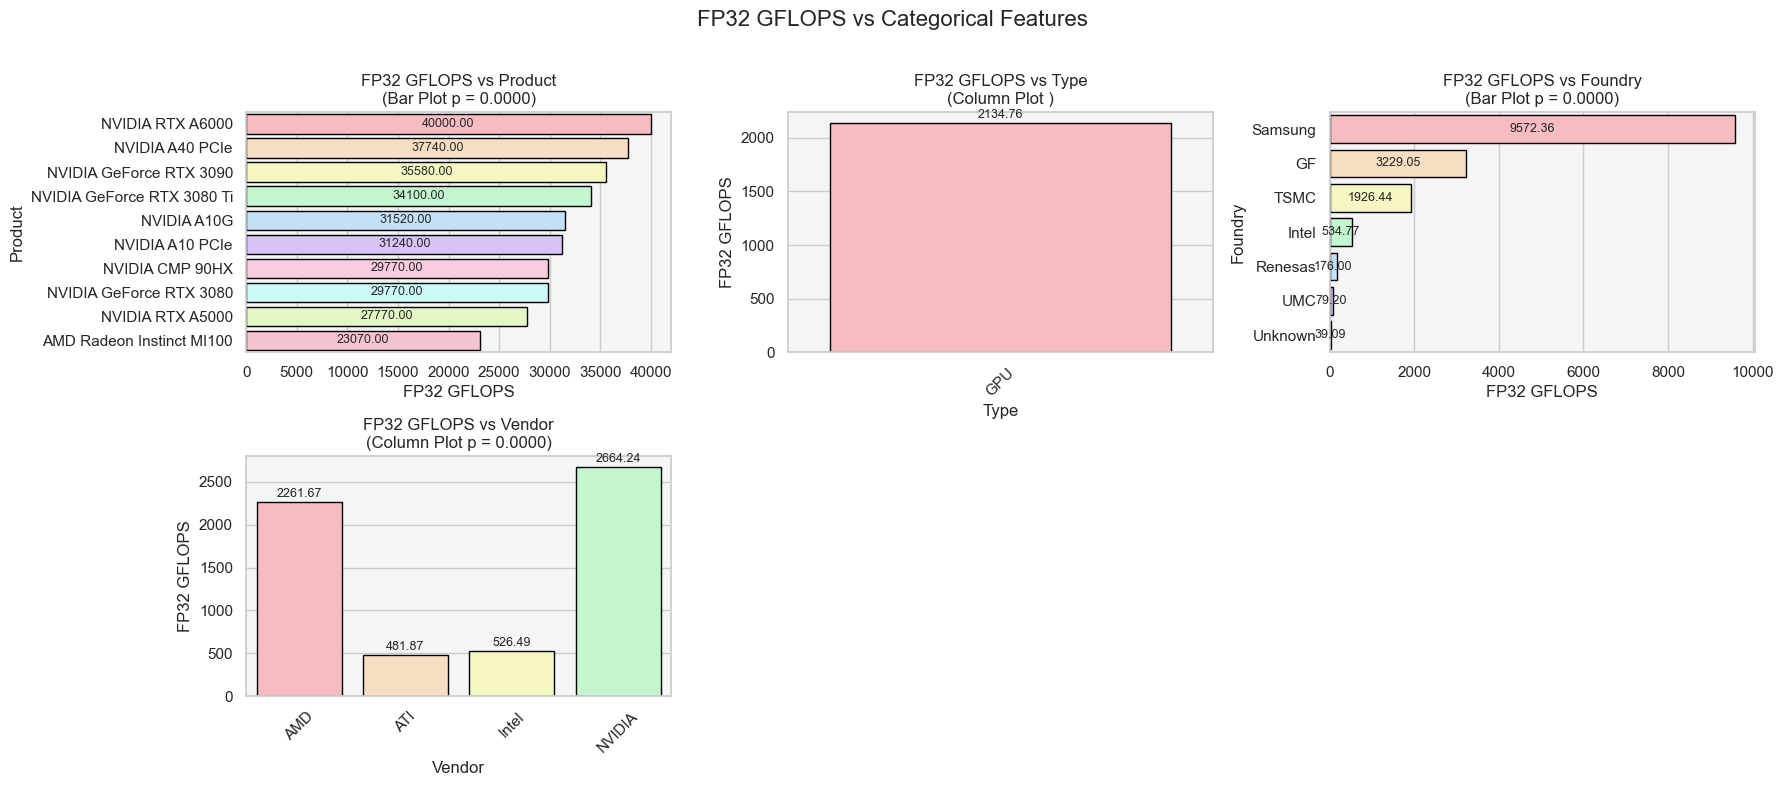

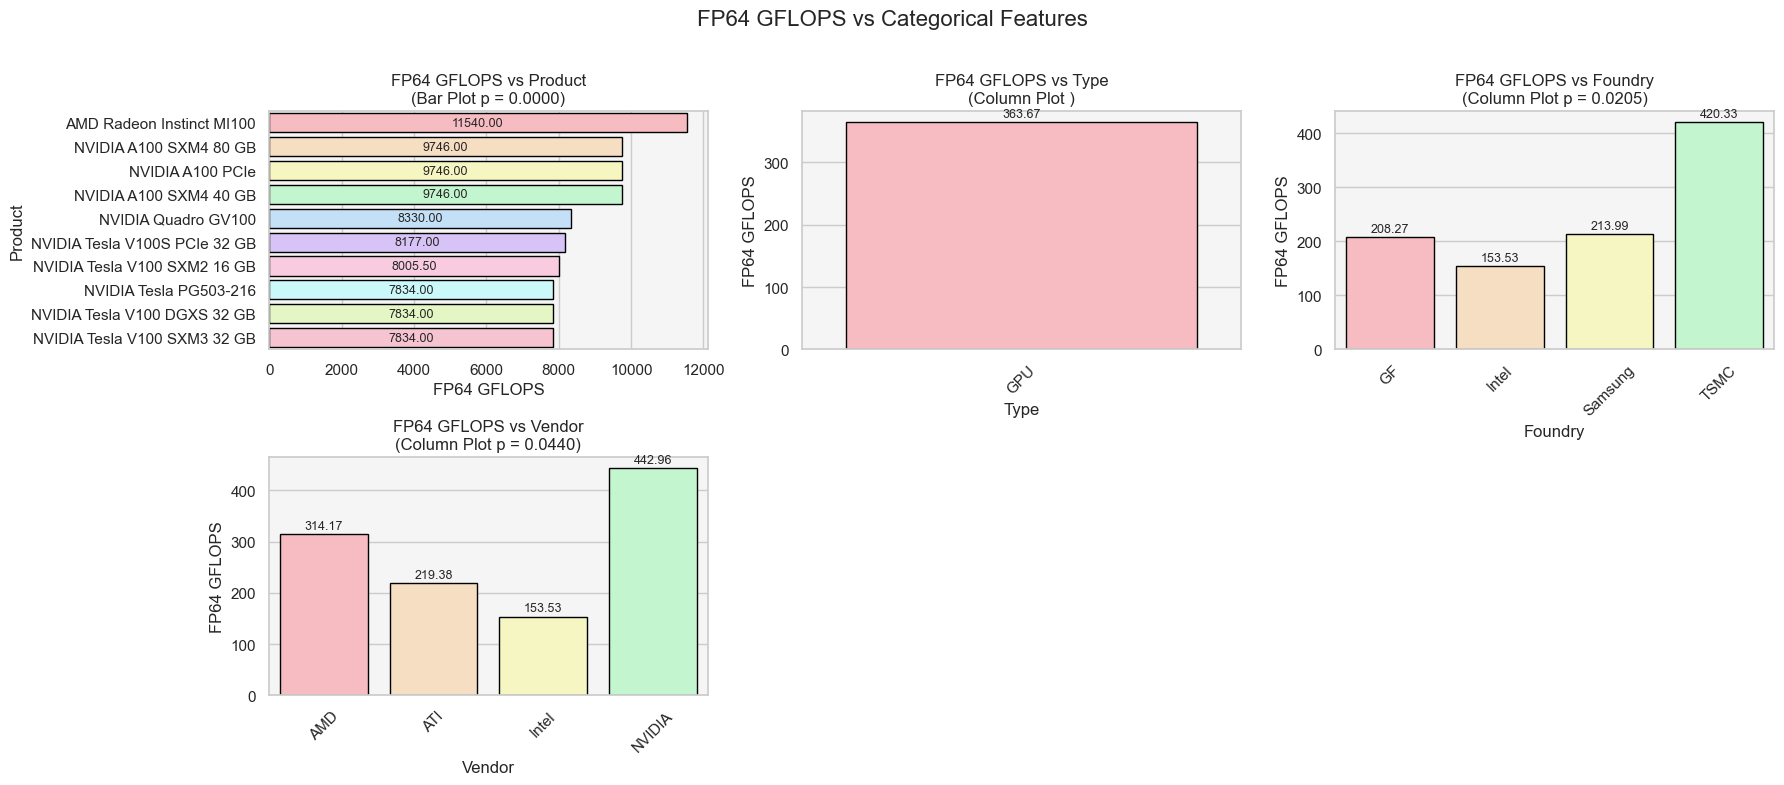

In [71]:
numerical_cols = [
    'Process Size', 'TDP', 'Die Size',
    'Transistors', 'Freq', 'FP16 GFLOPS',
    'FP32 GFLOPS', 'FP64 GFLOPS'
]

categorical_cols = ['Product', 'Type', 'Foundry', 'Vendor']
plot_numerical_vs_categorical(full_data, numerical_cols, categorical_cols)

**Key Insights:**

- All numerical variables show **statistically significant relationships** (p < 0.05) with at least three categorical dimensions: `Product`, `Vendor`, `Foundry`, and `Type`.

**Process Size
- Strong variation by **Vendor** and **Foundry**, reflecting different manufacturing technologies.
- **GPU** chips have slightly larger process sizes than **CPUs** (~5.73 nm difference).
- Outliers such as the **3dfx Voodoo5 5000 AGP (250 nm)** and **Matrox QID LP PCIe (0 nm)** suggest inclusion of legacy or anomalous data.

**TDP (Thermal Design Power)**
- **NVIDIA** and **Samsung** chips have the highest average TDP, indicating higher power consumption.
- **GPUs consume more power** than CPUs (~12.37 W higher on average).
- Large spread in values suggests product-specific performance tuning and use cases.

**Die Size**
- **GPUs** have significantly larger die areas than **CPUs** (~36.6 mm² difference).
- Die size is strongly influenced by **Vendor** and **Foundry**, indicating silicon real estate usage strategy.
- Maximum die size: **NVIDIA A100 PCIe (826 mm²)**.

**Transistor Count**
- **Transistor count is highest in NVIDIA GPUs**, with the A30 PCIe reaching **54.2 billion transistors**.
- **Samsung** leads among foundries in average transistor counts.
- **GPUs > CPUs** by over **1.29 billion** transistors on average, aligning with their parallel architecture.

**Frequency**
- **CPUs have significantly higher clock speeds** than GPUs (avg. ~2482 MHz vs. 662 MHz).
- **Intel dominates** in frequency both as a vendor and as a foundry.
- Largest frequency observed in **AMD FX-9590 (4700 MHz)**.

**FP16 GFLOPS**
- Highest throughput observed in **AMD Instinct MI100 (184,600 GFLOPS)**.
- Significant variation across **Product**, **Vendor**, and **Foundry**, but not by Type (only GPUs reported).
- **TSMC** and **NVIDIA** dominate this space for deep learning acceleration.

**FP32 GFLOPS**
- **NVIDIA RTX A6000** achieves the highest FP32 performance (40,000 GFLOPS).
- **Samsung** and **NVIDIA** show leading averages.
- No difference found across Type — likely only measured in GPUs.

**FP64 GFLOPS**
- Scientific computation capability led by **AMD Instinct MI100 (11,540 GFLOPS)**.
- Significant by **Vendor** and **Foundry**, but not by Type.
- FP64 performance is heavily product-dependent and specialized.

---

**Overall Conclusions**
- **Vendor** and **Foundry** are the most influential categories across all performance and physical metrics.
- **Type (CPU vs. GPU)** matters mostly for frequency, TDP, die size, and transistor count, but not floating-point compute metrics.
- Several extreme outliers highlight modern, high-performance chips used in **AI, HPC, and data center workloads**.
- This analysis reinforces the diversity and specialization in chip design strategies across different manufacturers and use cases.

In [72]:
# Pastel color palette
pastel_colors = [
    "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF",
    "#D5BAFF", "#FFC4E1", "#C4FFFF", "#E6FFBA", "#FFBACD"
]

def bubble_plots_by_category_mean(
    df, numerical_cols, categorical_cols,
    cols_per_row: int = 3,
    bubble_size: int = 1500,
    annot_fontsize: int = 10,
    max_cats: int = 10,
    top_n: int = 5
):
    """
    Draws bubble plots (mean x, y per category) for each categorical column.
    If the number of groups > max_cats, only keeps top_n groups with the highest 'score'
    (score = mean across all numerical_cols).
    """
    sns.set(style="whitegrid")
    
    combos = list(combinations(numerical_cols, 2))
    n_plots = len(combos)
    rows = math.ceil(n_plots / cols_per_row)
    
    for cat_col in categorical_cols:
        # Compute mean for each group
        subdf = df[numerical_cols + [cat_col]].dropna()
        mean_df = subdf.groupby(cat_col)[numerical_cols].mean().reset_index()
        
        # If number of groups > max_cats, select top_n by average score
        if mean_df.shape[0] > max_cats:
            mean_df['score'] = mean_df[numerical_cols].mean(axis=1)
            mean_df = mean_df.nlargest(top_n, 'score').drop(columns='score')
        
        categories = mean_df[cat_col].tolist()
        palette = dict(zip(categories, pastel_colors[:len(categories)]))
        
        # Create figure and axes
        fig, axes = plt.subplots(rows, cols_per_row,
                                 figsize=(cols_per_row * 5, rows * 4))
        axes = axes.flatten()
        fig.suptitle(f"Mean Bubble Plots by '{cat_col}' (showing {len(categories)} categories)", y=0.98, fontsize=16)
        
        # Draw each subplot, disable internal legends
        for ax, (x_col, y_col) in zip(axes, combos):
            sns.scatterplot(
                data=mean_df,
                x=x_col, y=y_col,
                hue=cat_col,
                palette=palette,
                s=bubble_size,
                edgecolor='k',
                linewidth=1.0,
                alpha=0.7,
                ax=ax,
                legend=False
            )
            ax.set_xlabel(f"Mean {x_col}")
            ax.set_ylabel(f"Mean {y_col}")
            
            # Annotate mean y-values
            for _, row in mean_df.iterrows():
                ax.text(
                    row[x_col], row[y_col],
                    f"{row[y_col]:.2f}",
                    ha='center', va='center',
                    fontsize=annot_fontsize,
                    color='black',
                    weight='bold'
                )
        
        # Remove unused axes
        for ax in axes[n_plots:]:
            fig.delaxes(ax)
        
        # Create a shared legend with black borders
        patches = [
            mpatches.Patch(
                facecolor=palette[cat],
                edgecolor='k',
                label=str(cat),
                linewidth=1.5
            )
            for cat in categories
        ]
        fig.legend(
            handles=patches,
            title=cat_col,
            loc='upper center',
            bbox_to_anchor=(0.5, 0.92),
            ncol=len(categories),
            frameon=True,
            fontsize='small',
            title_fontsize='medium'
        )
        
        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()


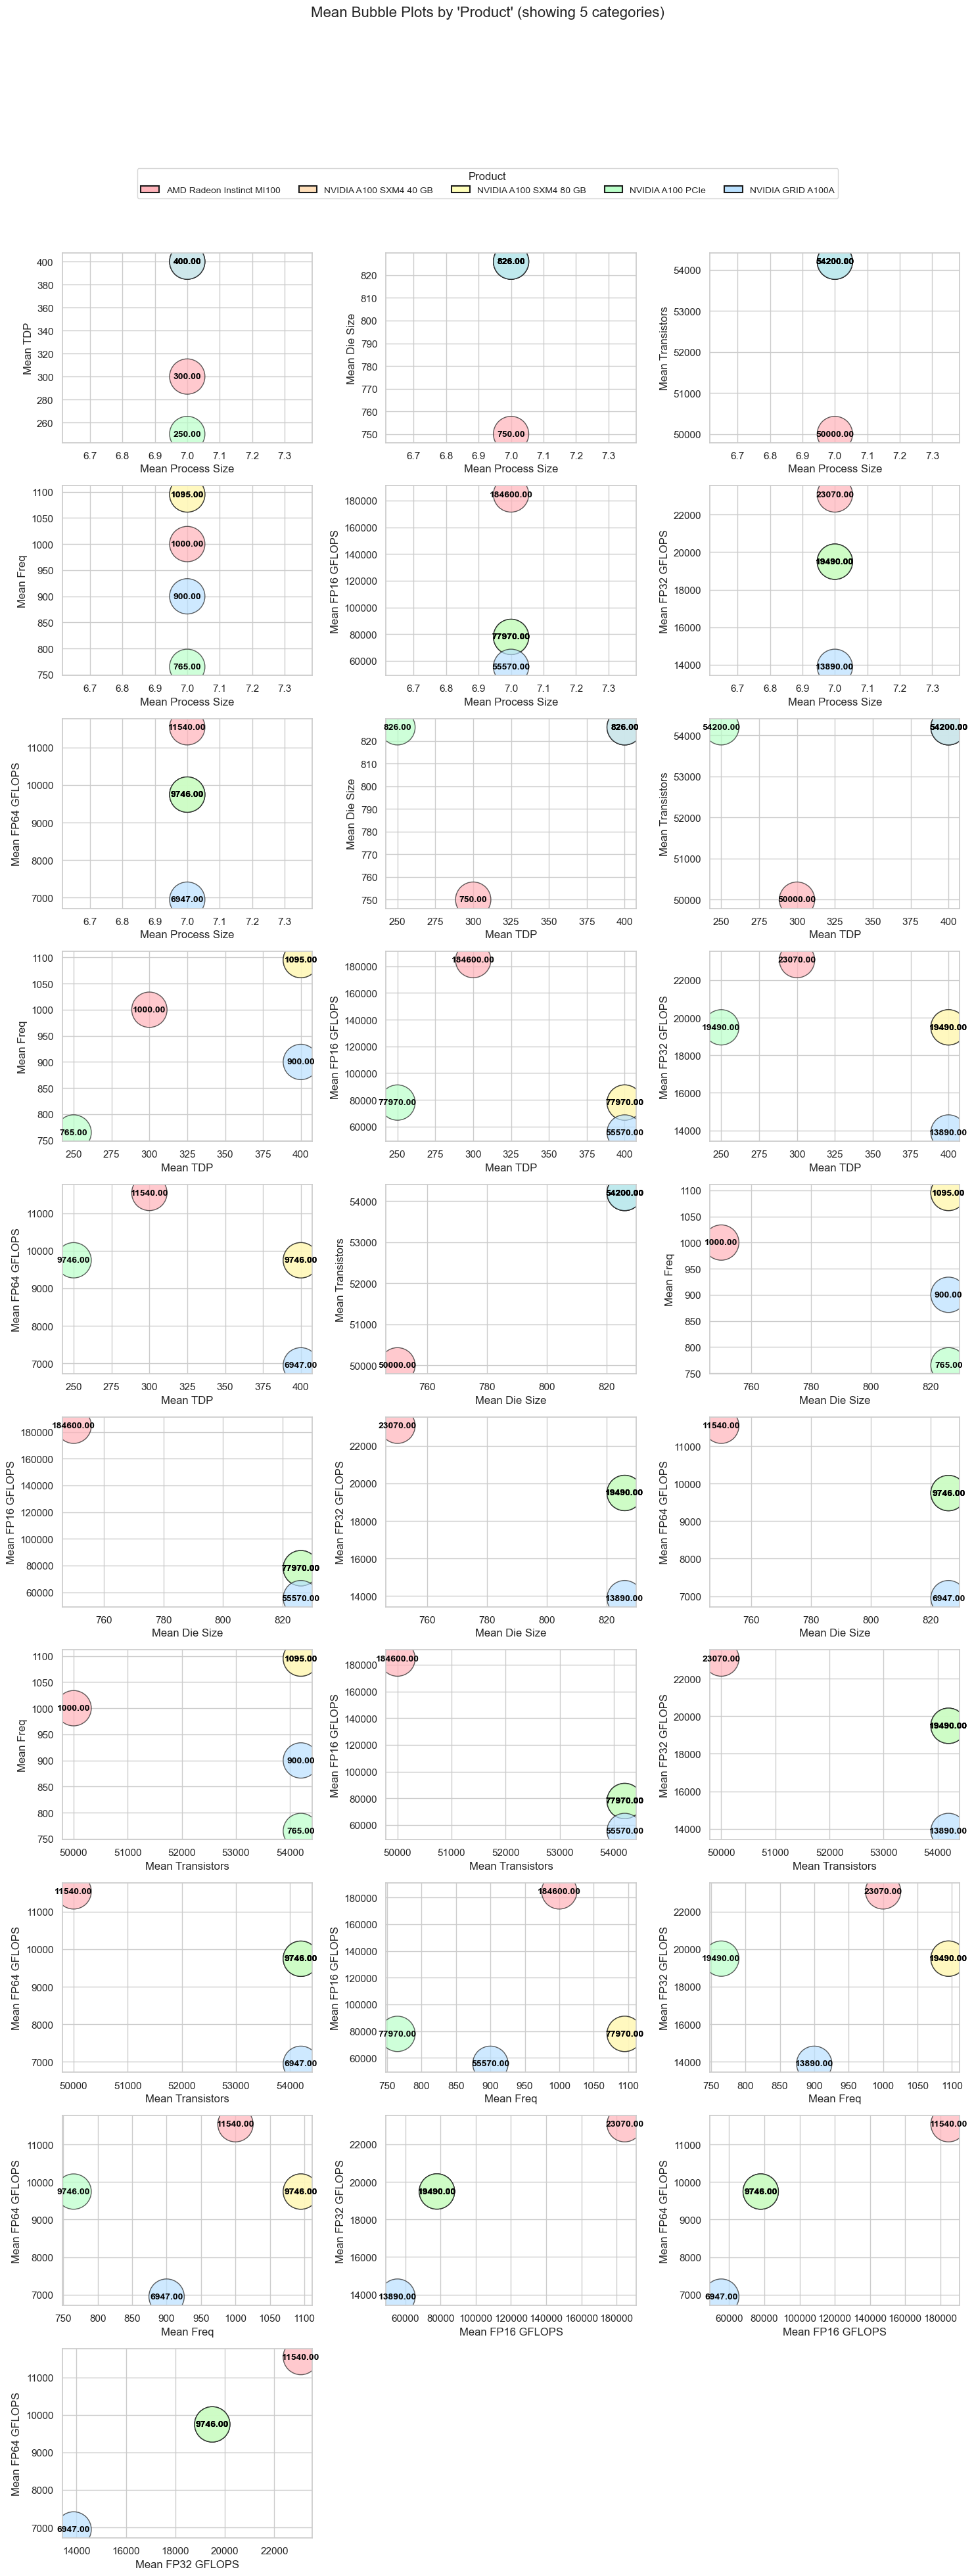

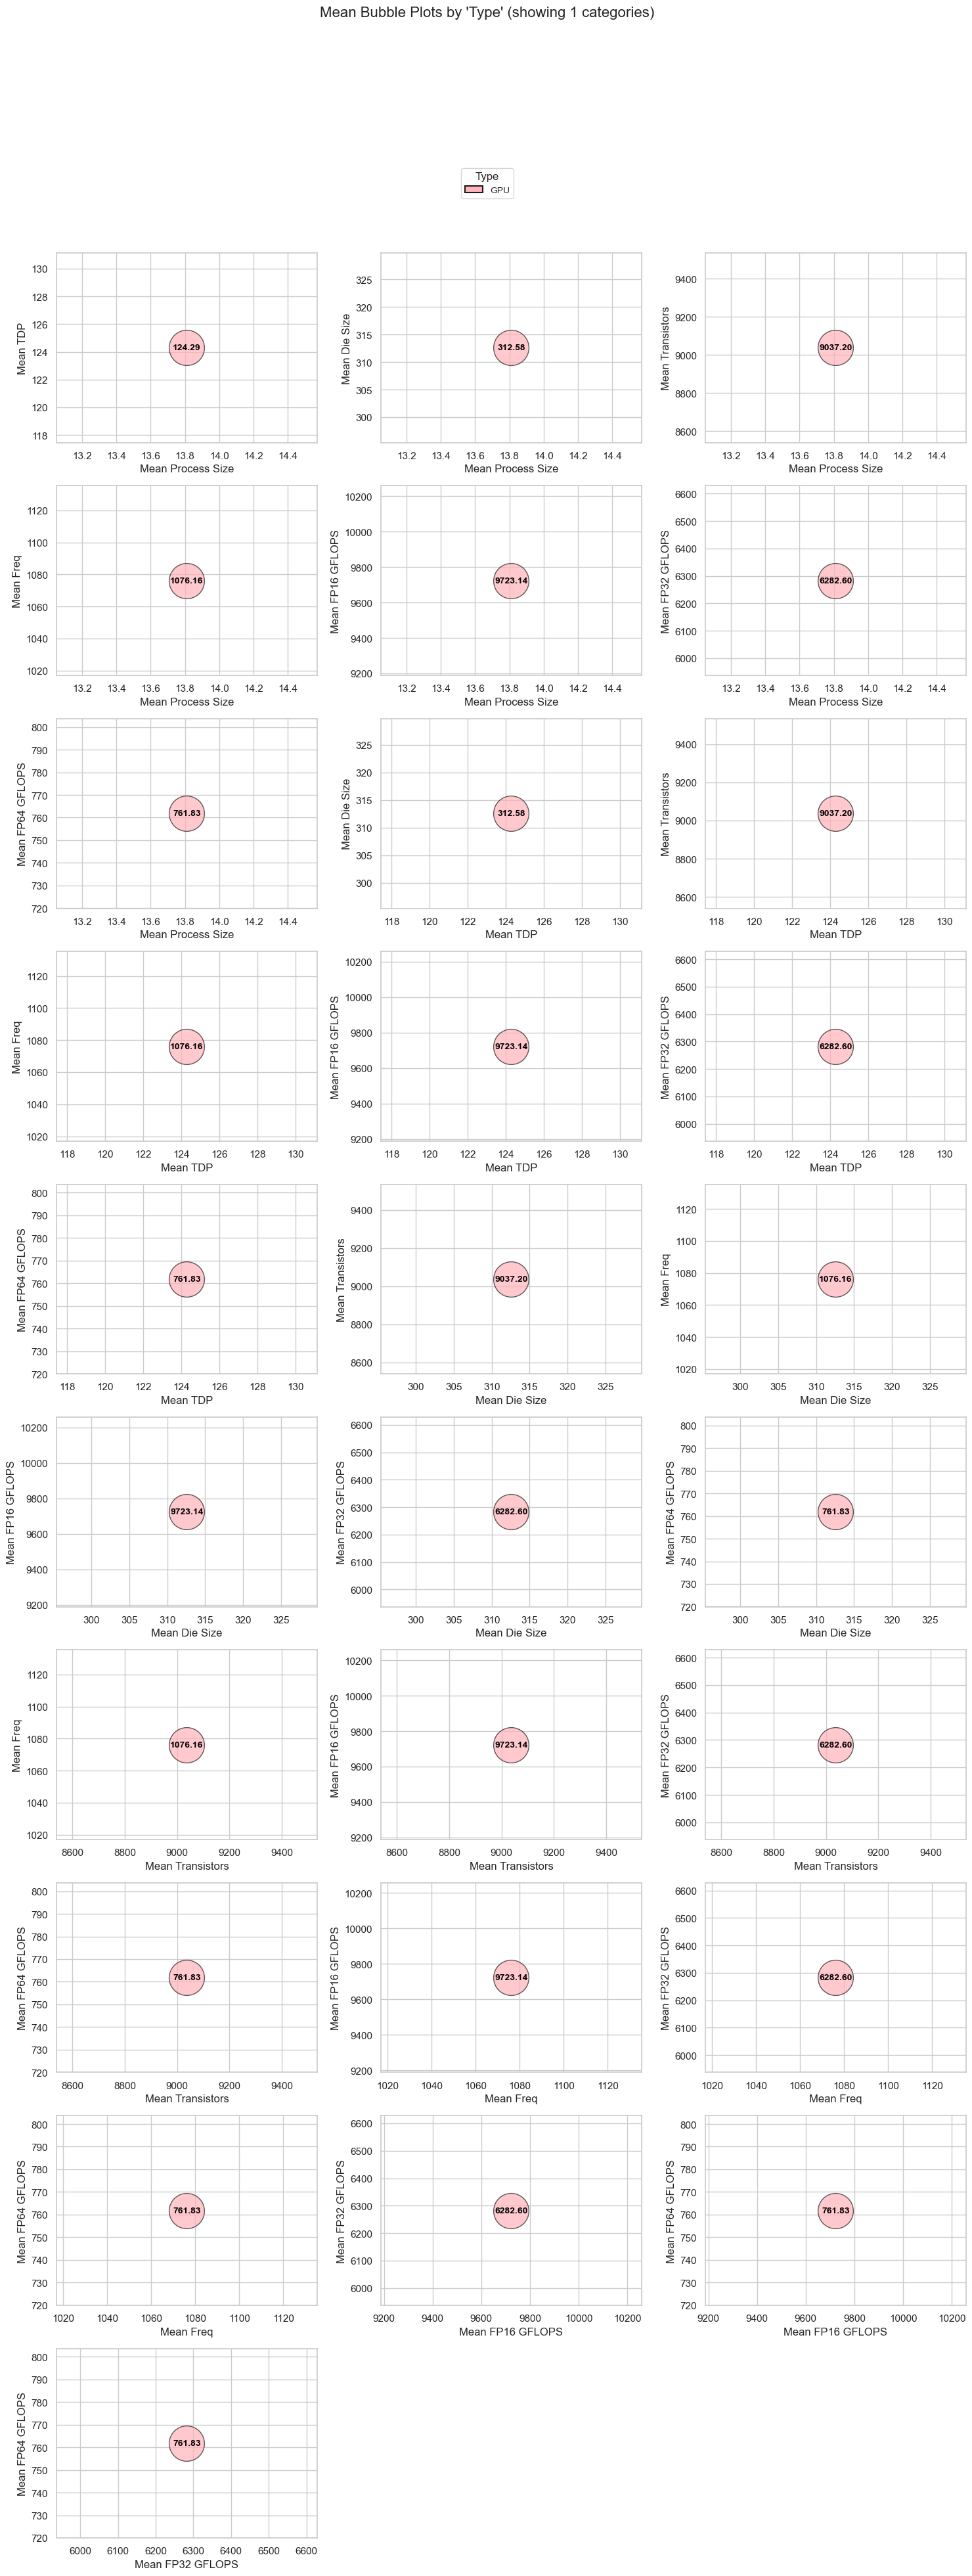

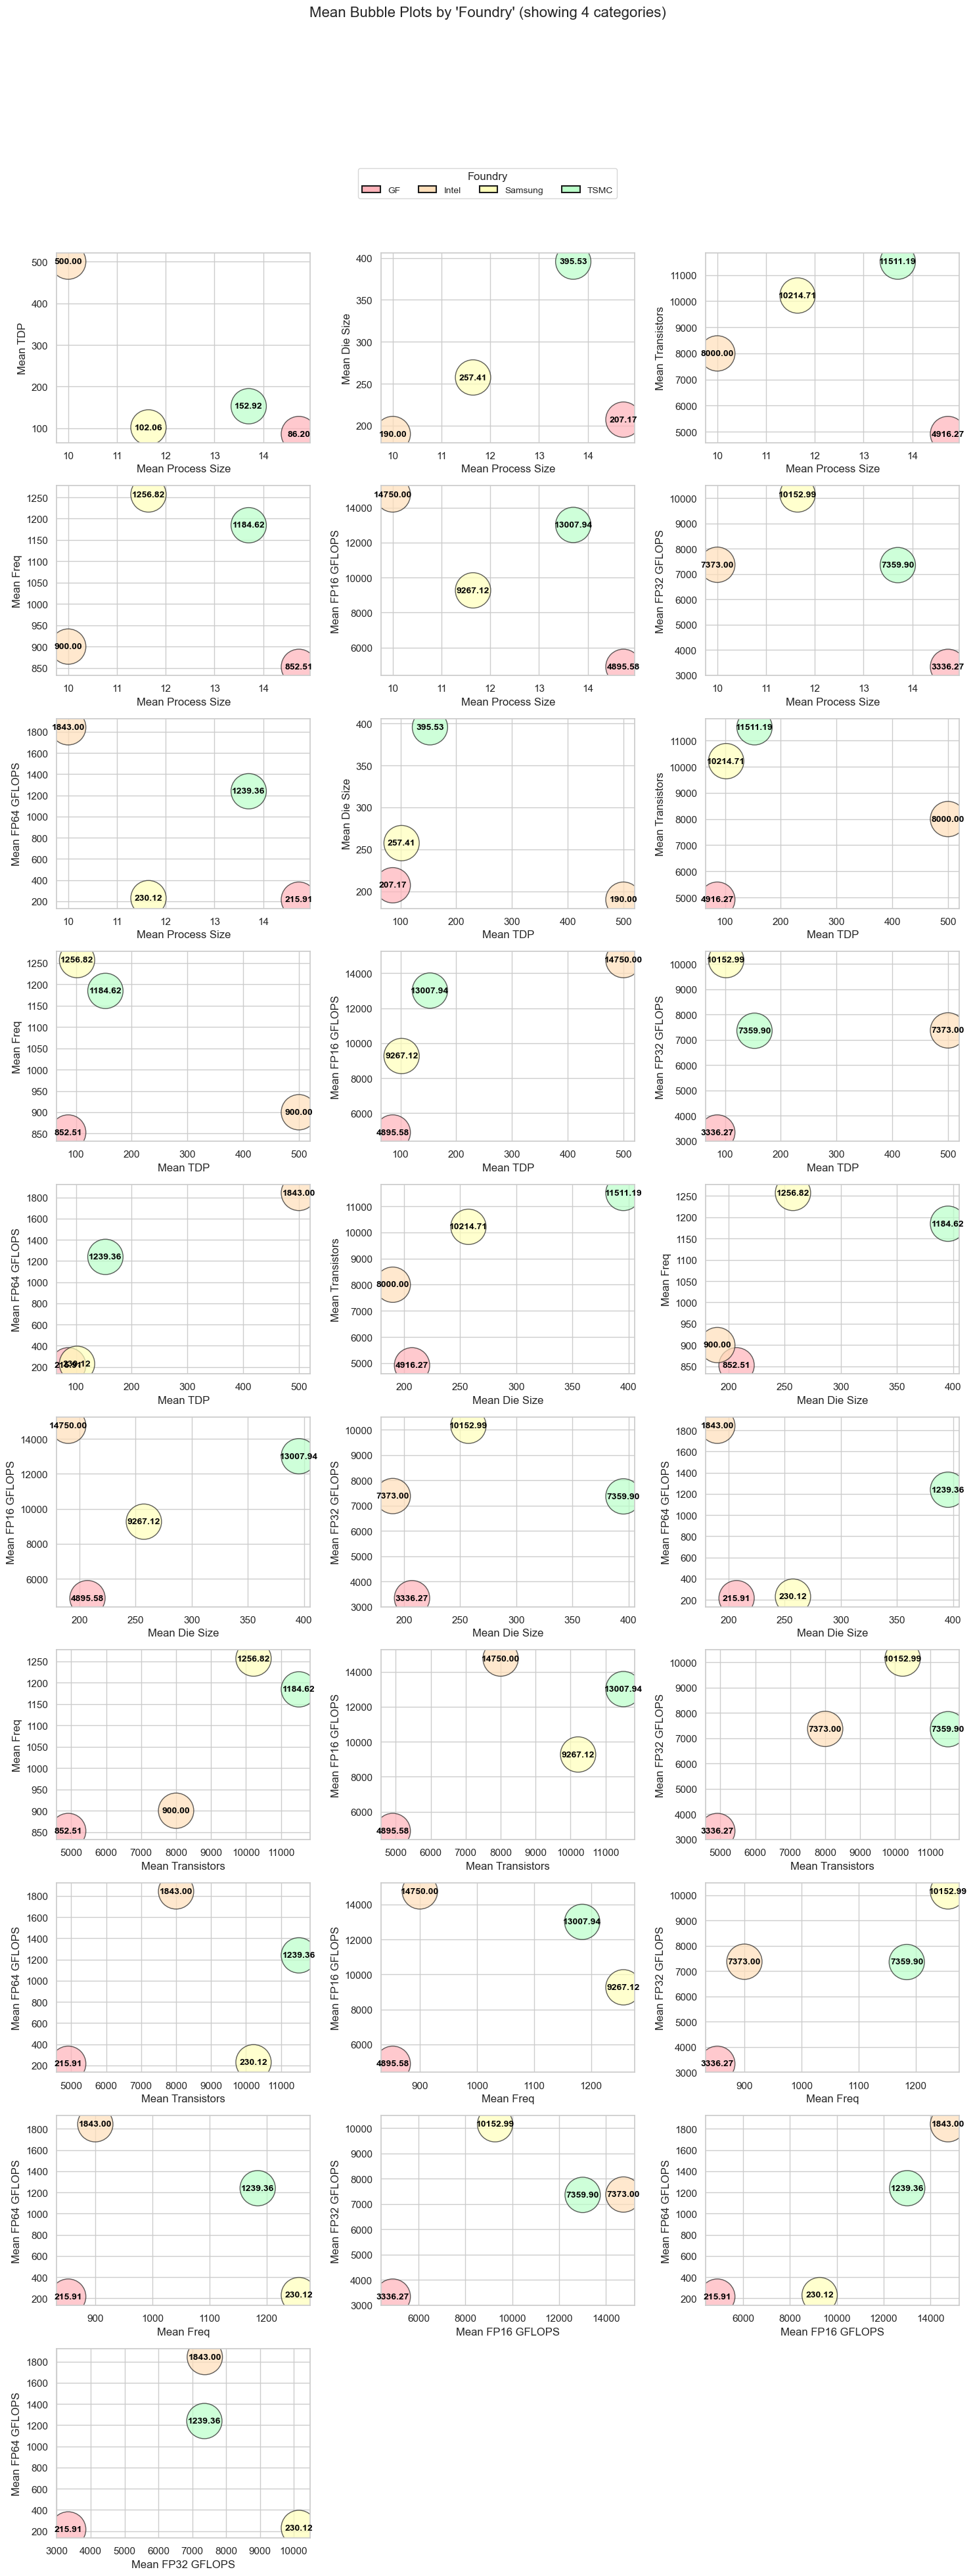

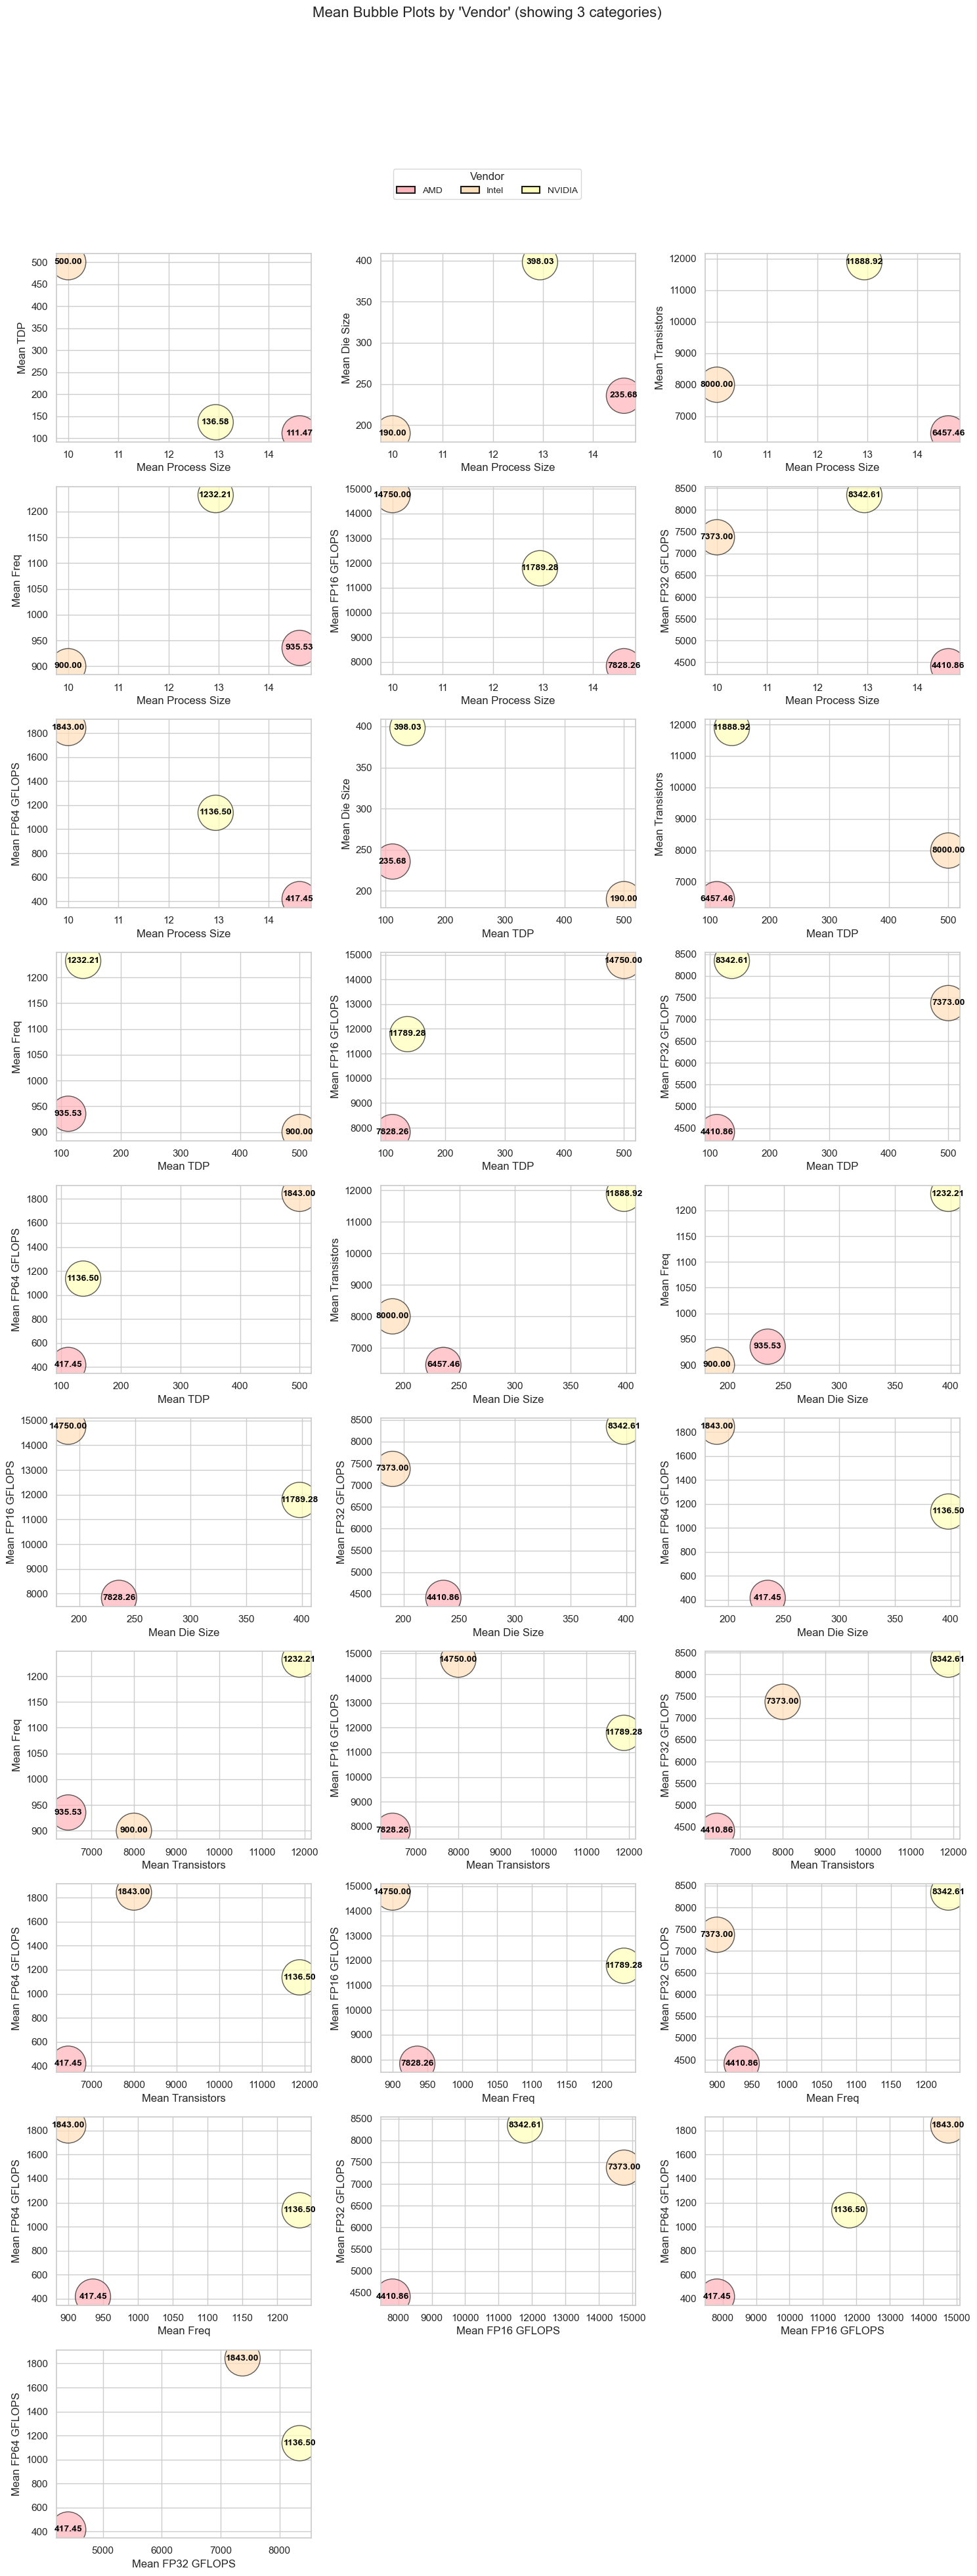

In [73]:
bubble_plots_by_category_mean(full_data, numerical_cols, categorical_cols)

**Key Insights Summary:**

---

**Product Comparison**

**General Overview**
- 388 original products; Top 5 are analyzed in detail.
- All products use the same 7nm process, shifting comparison focus toward architecture and performance.

**Performance Highlights**
- **Best Performer**: `AMD Radeon Instinct MI100`
  - Top 20% across FP16, FP32, FP64 GFLOPS.
  - High compute with fewer transistors and smaller die.
  - Moderate outlier (1.24 std deviation).
- **Worst Performer**: `NVIDIA GRID A100A`
  - Among the bottom 20% in all GFLOPS metrics.
  - Shares die size and transistor count with other A100 variants, but performs worse.

**Outlier Analysis**
- Only MI100 flagged as a moderate performance outlier.
- All other products, including NVIDIA A100 variants, are within normal range.

**Correlation & Pairwise Analysis**
- **Significant Correlations**:
  - `Die Size` ↔ `Transistors`: r = 1.00, p = 0.000
  - `FP32` ↔ `FP64 GFLOPS`: r = 1.00, p = 0.000
  - `Die Size` ↔ `FP16 GFLOPS`: r = -0.98, p = 0.0029
  - `Transistors` ↔ `FP16 GFLOPS`: r = -0.98, p = 0.0029
- **Strong but Not Significant**:
  - `TDP` ↔ `Frequency`: r = 0.70
  - `FP16` ↔ `FP32/FP64 GFLOPS`: r ≈ 0.80

**Architectural Observations**
- All A100 variants: Same die and transistor count.
- Performance variation likely due to frequency and thermal design (TDP).
- MI100: Outperforms with smaller die and fewer transistors, showing architectural efficiency.

**Quadrant Patterns**
- MI100: High Performance – Low Resource.
- GRID A100A: Low Performance – High Resource.

---

**Foundry Comparison**

**Summary by Foundry**
- **GF (GlobalFoundries)**: Weakest performance, large process size, lowest GFLOPS.
- **Intel**: Highest TDP (500W), smallest process size, excels in FP16 & FP64.
- **Samsung**: Highest frequency, strong FP32, weaker in FP64.
- **TSMC**: Most balanced and consistent across all metrics.

**Correlation Highlights (n = 4)**
- Total pairs: 28 → None statistically significant due to small n.
- Strong (|r| ≥ 0.7) examples:
  - `Process Size` ↔ `TDP`: r = -0.79
  - `FP16` ↔ `FP64 GFLOPS`: r = 0.91
  - `Transistors` ↔ `Freq`: r = 0.88
  - `TDP` ↔ `FP64 GFLOPS`: r = 0.88

**Conclusion**
- **TSMC**: Most consistent and well-rounded.
- **GF**: Weak in almost all aspects, but not an outlier.
- **Intel & Samsung**: Specialization with trade-offs.
- Performance is strongly related to architecture, though significance is limited by sample size.

---

**GPU Vendor Analysis**

**Overall Vendor Comparison**
- **NVIDIA**: Best overall – leads in die size, transistors, frequency, FP32 GFLOPS.
- **Intel**: Strong in FP16/FP64, highest TDP → compute-focused.
- **AMD**: Largest process size but weakest across GFLOPS metrics.

**Performance & Z-Scores**
- All vendors fall within normal range (no strong outliers).
- Z-score (closeness to dataset center):
  - NVIDIA: 0.62
  - Intel: 0.78
  - AMD: 0.80

**Correlation Summary**
- 28 pairs analyzed:
  - 12 strong correlations (|r| ≥ 0.7)
  - Only 1 significant: `FP16` ↔ `FP64 GFLOPS` (r = 0.997, p = 0.0498)
  - Strongest non-significant: `Process Size` ↔ `TDP` (r = -0.9527)

**Quadrant Patterns**
- **NVIDIA**: High-High – design and performance are aligned.
- **Intel**: Low-High – high compute with modest design specs.
- **AMD**: High-Low – large die and node, poor performance.

**Vendor Highlights**
- **AMD**: Inefficient performance-to-design ratio.
- **Intel**: Targets precision-heavy workloads (FP64).
- **NVIDIA**: Balanced design and compute performance.

---

**Final Summary**
- **NVIDIA**: Overall leader in performance and architecture alignment.
- **Intel**: Strong in compute-heavy tasks; trades off energy efficiency.
- **AMD**: Needs improvement in design efficiency despite large node size.
- **TSMC**: Best-performing foundry; consistent across metrics.
- Performance patterns show strong inter-variable relationships, especially among GFLOPS and die/transistor metrics.

## 5) Business findings from the EDA

**Business Insights from Chip EDA**

**1. Market Concentration and Vendor Positioning**
- **AMD** holds the largest share of models (34%), followed by **Intel** (29%) and **NVIDIA** (25%). ATI and “Other” remain niche players.  
- **Action**:  
  - Leverage AMD’s scale across broad segments.  
  - Position NVIDIA as a premium, high‑margin brand based on its performance-per-watt advantage.  
  - Highlight Intel’s FP16/FP64 precision strengths in HPC/go‑to‑market materials.

**2. Foundry Partnerships Drive Differentiation**
- **TSMC** powers 45% of all chips, offering balanced performance; **Intel**’s in‑house foundry covers 29%; “Unknown” (18%) signals supply‑chain data gaps.  
- **Action**:  
  - Deepen collaboration with TSMC for mainstream and AI‑focused products.  
  - Improve traceability for smaller foundries to mitigate quality risks.

**3. Product Lifecycle and Release Timing**
- Peak launch year: **2013**.  
- Seasonality: **Q2** and **January** dominate.  
- .> 21% of dates fall on the 1st of the month (likely placeholders).  
- **Action**:  
  - Align new launches with established windows to maximize visibility.  
  - Clean and enrich release‑date records to improve time‑to‑market analytics.

**4. Technology Node Trends and Cost Implications**
- Median node: **40 nm**; most common: **14 nm** & **28 nm**.  
- Outliers at **0 nm** and **250 nm** indicate data errors or legacy parts.  
- **Action**:  
  - Prioritize 14 nm/28 nm in cost-performance modeling.  
  - Remove or correct obsolete/erroneous entries to focus R&D.

**5. Power vs. Performance Trade‑Offs**
- GPUs consume ~**12 W** more than CPUs (median TDP 65 W) and have ~**36 mm²** larger die.  
- **NVIDIA** & **Samsung** lead in TDP/frequency (high‑performance segment); **Intel** trades higher TDP for superior FP16/FP64 throughput.  
- **Action**:  
  - Tailor CPUs for energy‑efficient edge/mobile markets.  
  - Position high‑TDP GPUs for AI/data‑center workloads.  
  - Market Intel’s high‑precision compute for HPC applications.

**6. Compute Capability Clusters**
- **Mainstream GPUs** cluster around **240–384 FP32 GFLOPS**.  
- **Flagship outliers**:  
  - **AMD Instinct MI100**: 184 600 FP16, 11 540 FP64.  
  - **NVIDIA RTX A6000**: 40 000 FP32.  
- **Action**:  
  - Develop tiered SKUs: “Mainstream” vs. “Flagship AI/HPC”.  
  - Introduce “value” SKUs around 300–500 FP32 GFLOPS for mid‑market.

**7. Data Completeness as a Competitive Lever**
- Missing rates: FP16 GFLOPS (89%), FP32 GFLOPS (60%), FP64 GFLOPS (73%).  
- **Action**:  
  - Invest in richer spec data collection (OEM partnerships, benchmark scraping).  
  - Enhance competitive intelligence and validate performance claims.

**8. Correlation–Driven Feature Redundancies**
- Near‑perfect correlations:  
  - **FP32 vs. FP64 GFLOPS**  
  - **Die Size vs. Transistor Count**  
- **Action**:  
  - Simplify spec sheets by highlighting one representative GFLOPS metric and one physical metric to reduce buyer confusion.

**9. Outlier Products as Innovation Showcases**
- **AMD MI100** emphasizes architectural efficiency (high compute, low die/transistor count).  
- **NVIDIA A100 variants** emphasize scale (large die/transistor count).  
- **Action**:  
  - Use these as “halo” products in marketing.  
  - Integrate efficiency learnings into mid‑range offerings.


#  IV) Prepare the data

## 1) Outliers handling

In [79]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, feat_with_outliers=['Process Size', 'TDP', 'Die Size', 'Transistors']):
        self.feat_with_outliers = feat_with_outliers

    def fit(self, df, y=None):
        return self

    def transform(self, df):
        if set(self.feat_with_outliers).issubset(df.columns):
            Q1 = df[self.feat_with_outliers].quantile(0.25)
            Q3 = df[self.feat_with_outliers].quantile(0.75)
            IQR = Q3 - Q1
            condition = ~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) | 
                          (df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)
            df_cleaned = df[condition].copy()
            return df_cleaned
        else:
            missing_features = list(set(self.feat_with_outliers) - set(df.columns))
            print(f"Missing features in dataframe: {missing_features}")
            return df

## 2) Feature engineering

In [81]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=['Process Size', 'TDP', 'Die Size',
                                 'Transistors']):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if (X[self.features] < -1).any().any():
            raise ValueError("Some values are less than -1, cannot apply log1p safely.")
        
        X[self.features] = np.log1p(X[self.features])
        return X

# One-hot encoding
class OneHotEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, features=['Foundry', 'Vendor']):
        self.features = features
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.features])
        return self

    def transform(self, X):
        encoded = self.encoder.transform(X[self.features])
        encoded_df = pd.DataFrame(encoded, columns=self.encoder.get_feature_names_out(self.features), index=X.index)
        X = X.drop(columns=self.features)
        return pd.concat([X, encoded_df], axis=1)

# Imputer for missing values
class ImputerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', features=['Process Size', 'TDP', 'Die Size', 'Transistors'], group_col='Type'):
        self.strategy = strategy
        self.features = features
        self.group_col = group_col

    def fit(self, X, y=None):
        if self.strategy == 'mean':
            self.group_values = X.groupby(self.group_col)[self.features].mean()
        elif self.strategy == 'median':
            self.group_values = X.groupby(self.group_col)[self.features].median()
        else:
            self.group_values = X.groupby(self.group_col)[self.features].agg(lambda x: x.mode().iloc[0])
        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.features:
            for group in self.group_values.index:
                value = self.group_values.loc[group, feature]
                mask = (X[self.group_col] == group) & (X[feature].isna())
                X.loc[mask, feature] = value
        return X


## 3) Data Preprocessing

In [83]:
def full_pipeline(df):
    pipeline = Pipeline([
        ('imputer', ImputerWrapper()),
        ('outlier_remover', OutlierRemover()),
        ('one_hot_encoder', OneHotEncoderWrapper()),
        ('log_transform', LogTransformer())
    ])
    
    df_processed = pipeline.fit_transform(df)
    return df_processed

In [84]:
columns_to_keep = ['Type', 'Process Size', 'TDP', 'Die Size', 'Transistors', 
                   'Freq', 'Foundry', 'Vendor', 'FP32 GFLOPS']

filtered_data = full_data[columns_to_keep]

In [85]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          4854 non-null   object 
 1   Process Size  4845 non-null   float64
 2   TDP           4228 non-null   float64
 3   Die Size      4139 non-null   float64
 4   Transistors   4143 non-null   float64
 5   Freq          4854 non-null   float64
 6   Foundry       4854 non-null   object 
 7   Vendor        4854 non-null   object 
 8   FP32 GFLOPS   1948 non-null   float64
dtypes: float64(6), object(3)
memory usage: 341.4+ KB


In [86]:
filtered_data_prep = full_pipeline(filtered_data)

In [87]:
filtered_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4439 entries, 0 to 4853
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             4439 non-null   object 
 1   Process Size     4439 non-null   float64
 2   TDP              4439 non-null   float64
 3   Die Size         4439 non-null   float64
 4   Transistors      4439 non-null   float64
 5   Freq             4439 non-null   float64
 6   FP32 GFLOPS      1615 non-null   float64
 7   Foundry_GF       4439 non-null   float64
 8   Foundry_IBM      4439 non-null   float64
 9   Foundry_Intel    4439 non-null   float64
 10  Foundry_NEC      4439 non-null   float64
 11  Foundry_Renesas  4439 non-null   float64
 12  Foundry_Samsung  4439 non-null   float64
 13  Foundry_Sony     4439 non-null   float64
 14  Foundry_TSMC     4439 non-null   float64
 15  Foundry_UMC      4439 non-null   float64
 16  Foundry_Unknown  4439 non-null   float64
 17  Vendor_AMD       44

In [88]:
# CPU table 
cpu = filtered_data_prep[filtered_data['Type'] == 'CPU'].drop(columns=['FP32 GFLOPS', 'Type']).dropna()
cpu_data = cpu.copy()
# GPU table
gpu = filtered_data_prep[filtered_data['Type'] == 'GPU'].drop(columns=['Freq', 'Type']).dropna()
gpu_data = gpu.copy()

In [89]:
cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, 0 to 2191
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Process Size     2111 non-null   float64
 1   TDP              2111 non-null   float64
 2   Die Size         2111 non-null   float64
 3   Transistors      2111 non-null   float64
 4   Freq             2111 non-null   float64
 5   Foundry_GF       2111 non-null   float64
 6   Foundry_IBM      2111 non-null   float64
 7   Foundry_Intel    2111 non-null   float64
 8   Foundry_NEC      2111 non-null   float64
 9   Foundry_Renesas  2111 non-null   float64
 10  Foundry_Samsung  2111 non-null   float64
 11  Foundry_Sony     2111 non-null   float64
 12  Foundry_TSMC     2111 non-null   float64
 13  Foundry_UMC      2111 non-null   float64
 14  Foundry_Unknown  2111 non-null   float64
 15  Vendor_AMD       2111 non-null   float64
 16  Vendor_ATI       2111 non-null   float64
 17  Vendor_Intel     21

In [90]:
gpu_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 2194 to 4853
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Process Size     1615 non-null   float64
 1   TDP              1615 non-null   float64
 2   Die Size         1615 non-null   float64
 3   Transistors      1615 non-null   float64
 4   FP32 GFLOPS      1615 non-null   float64
 5   Foundry_GF       1615 non-null   float64
 6   Foundry_IBM      1615 non-null   float64
 7   Foundry_Intel    1615 non-null   float64
 8   Foundry_NEC      1615 non-null   float64
 9   Foundry_Renesas  1615 non-null   float64
 10  Foundry_Samsung  1615 non-null   float64
 11  Foundry_Sony     1615 non-null   float64
 12  Foundry_TSMC     1615 non-null   float64
 13  Foundry_UMC      1615 non-null   float64
 14  Foundry_Unknown  1615 non-null   float64
 15  Vendor_AMD       1615 non-null   float64
 16  Vendor_ATI       1615 non-null   float64
 17  Vendor_Intel    

In [91]:
cpu_data.to_csv('cpu_data.csv', index=False)
gpu_data.to_csv('gpu_data.csv', index=False)

# V) Short-list promising models

## 1) Models training

In [94]:
# Let's define a function to load and prepare the data
def load_data(filepath):
    """Load dataset from filepath and return prepared X and y"""
    data = pd.read_csv(filepath)
    return data

# Load CPU data - adjust filepath as needed
try:
    cpu_data = load_data('cpu_data.csv')
    print("CPU data loaded successfully")
    print(f"CPU data shape: {cpu_data.shape}")
except Exception as e:
    print(f"Error loading CPU data: {e}")
    print("No data")

# Load GPU data - adjust filepath as needed
try:
    gpu_data = load_data('gpu_data.csv')
    print("GPU data loaded successfully")
    print(f"GPU data shape: {gpu_data.shape}")
except Exception as e:
    print(f"Error loading GPU data: {e}")
    print("No data")

# Prepare CPU data
X_cpu = cpu_data.drop('Freq', axis=1)
y_cpu = cpu_data['Freq']

# Prepare GPU data
X_gpu = gpu_data.drop('FP32 GFLOPS', axis=1)
y_gpu = gpu_data['FP32 GFLOPS']

# Create train-test splits for both datasets
X_cpu_train, X_cpu_test, y_cpu_train, y_cpu_test = train_test_split(
    X_cpu, y_cpu, test_size=0.2, random_state=42
)

X_gpu_train, X_gpu_test, y_gpu_train, y_gpu_test = train_test_split(
    X_gpu, y_gpu, test_size=0.2, random_state=42
)

# Scale the features
cpu_scaler = StandardScaler()
X_cpu_train_scaled = cpu_scaler.fit_transform(X_cpu_train)
X_cpu_test_scaled = cpu_scaler.transform(X_cpu_test)

gpu_scaler = StandardScaler()
X_gpu_train_scaled = gpu_scaler.fit_transform(X_gpu_train)
X_gpu_test_scaled = gpu_scaler.transform(X_gpu_test)

CPU data loaded successfully
CPU data shape: (2111, 20)
GPU data loaded successfully
GPU data shape: (1615, 20)


In [95]:
# Create dictionaries of regression models
regressors = {
    'linear_regression': LinearRegression(),
    'ridge_regression': Ridge(random_state=42),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'random_forest': RandomForestRegressor(random_state=42),
    'xgboost': xgb.XGBRegressor(random_state=42),
    'lightgbm': lgb.LGBMRegressor(random_state=42),
    'catboost': CatBoostRegressor(random_state=42, verbose=0),
    'neural_network': MLPRegressor(random_state=42, max_iter=1000),
    'svr': SVR()
}

In [96]:
# Define a function to plot feature importance
def plot_feature_importance(model, X, y, model_name, feature_names, target_name):
    """Plot feature importance if the model supports it"""
    plt.figure(figsize=(12, 6))
    
    if hasattr(model, 'feature_importances_'):
        # Models with built-in feature_importances_ attribute
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.title(f'Feature Importance for {model_name} - {target_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()
    elif isinstance(model, (LinearRegression, Ridge, SVR)):
        # For linear models, use coefficients if available
        if hasattr(model, 'coef_'):
            coefs = model.coef_
            indices = np.argsort(np.abs(coefs))[::-1]
            
            plt.title(f'Feature Coefficients for {model_name} - {target_name}')
            plt.bar(range(X.shape[1]), np.abs(coefs[indices]), align='center')
            plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
            plt.tight_layout()
            plt.show()
        else:
            # Use permutation importance for models without direct feature importance
            perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
            sorted_idx = perm_importance.importances_mean.argsort()[::-1]
            
            plt.title(f'Permutation Importance for {model_name} - {target_name}')
            plt.bar(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], 
                    align='center', yerr=perm_importance.importances_std[sorted_idx])
            plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
            plt.tight_layout()
            plt.show()
    else:
        # Use permutation importance for models without direct feature importance
        perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
        sorted_idx = perm_importance.importances_mean.argsort()[::-1]
        
        plt.title(f'Permutation Importance for {model_name} - {target_name}')
        plt.bar(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], 
                align='center', yerr=perm_importance.importances_std[sorted_idx])
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
        plt.tight_layout()
        plt.show()

In [97]:
# Function to get predictions
def get_predictions(model, X_train, y_train, X_test, model_name, dataset_name, final_model=False):
    """Get predictions using cross-validation or the final model"""
    if not final_model:
        # Path for saved prediction model
        pred_path = Path(f'saved_models/{dataset_name}/{model_name}/y_pred_{model_name}.sav')
        try:
            pred_path.resolve(strict=True)
        except FileNotFoundError:
            # Cross-validation predictions
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            y_pred = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)
            
            # Create directory if it doesn't exist
            os.makedirs(os.path.dirname(pred_path), exist_ok=True)
            
            # Save predictions
            joblib.dump(y_pred, pred_path)
            return y_pred
        else:
            # Load predictions if they exist
            y_pred = joblib.load(pred_path)
            return y_pred
    else:
        # Path for saved final prediction model
        pred_path_final = Path(f'saved_models_final/{dataset_name}/{model_name}/y_pred_{model_name}_final.sav')
        try:
            pred_path_final.resolve(strict=True)
        except FileNotFoundError:
            # Predict using the trained model
            y_pred_final = model.predict(X_test)
            
            # Create directory if it doesn't exist
            os.makedirs(os.path.dirname(pred_path_final), exist_ok=True)
            
            # Save predictions
            joblib.dump(y_pred_final, pred_path_final)
            return y_pred_final
        else:
            # Load predictions if they exist
            y_pred_final = joblib.load(pred_path_final)
            return y_pred_final

In [98]:
# Function to display regression metrics
def display_metrics(y_true, y_pred, model_name):
    """Calculate and display various regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [99]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name, target_name):
    """Plot actual vs predicted values with a perfect prediction line"""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    # Get the range of values for the plot
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    
    # Plot the perfect prediction line
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.title(f'Actual vs Predicted {target_name} - {model_name}')
    plt.xlabel(f'Actual {target_name}')
    plt.ylabel(f'Predicted {target_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [100]:
# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name, target_name):
    """Plot residuals to check for patterns"""
    residuals = y_true - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    
    plt.title(f'Residual Plot - {model_name} - {target_name}')
    plt.xlabel(f'Predicted {target_name}')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [101]:
# Function to train and evaluate models
def train_model(model, model_name, X_train, y_train, X_test, y_test, dataset_name, target_name, final_model=False):
    """Train the model and evaluate its performance"""
    if not final_model:
        # Path for saved model
        model_path = Path(f'saved_models/{dataset_name}/{model_name}/{model_name}_model.sav')
        try:
            model_path.resolve(strict=True)
        except FileNotFoundError:
            # Train the model
            model_trained = model.fit(X_train, y_train)
            
            # Create directory if it doesn't exist
            os.makedirs(os.path.dirname(model_path), exist_ok=True)
            
            # Save the model
            joblib.dump(model_trained, model_path)
            return model_trained
        else:
            # Load the model if it exists
            model_trained = joblib.load(model_path)
            return model_trained
    else:
        # Path for saved final model
        model_path_final = Path(f'saved_models_final/{dataset_name}/{model_name}/{model_name}_model.sav')
        try:
            model_path_final.resolve(strict=True)
        except FileNotFoundError:
            # Train the model on all training data
            model_trained = model.fit(X_train, y_train)
            
            # Create directory if it doesn't exist
            os.makedirs(os.path.dirname(model_path_final), exist_ok=True)
            
            # Save the model
            joblib.dump(model_trained, model_path_final)
            return model_trained
        else:
            # Load the model if it exists
            model_trained = joblib.load(model_path_final)
            return model_trained

In [102]:
# Function to ensure folder exists
def ensure_folder_exists(dataset_name, model_name):
    """Ensure that the folder structure exists for saving models and predictions"""
    folder_path = f'saved_models/{dataset_name}/{model_name}'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    folder_path_final = f'saved_models_final/{dataset_name}/{model_name}'
    if not os.path.exists(folder_path_final):
        os.makedirs(folder_path_final)


                        CPU Frequency Prediction Models                         




--------------  linear_regression  ---------------


Training Data Metrics:
Model: linear_regression
Mean Squared Error (MSE): 318028.5879
Root Mean Squared Error (RMSE): 563.9402
Mean Absolute Error (MAE): 437.2316
R² Score: 0.4318
--------------------------------------------------
Test Data Metrics:
Model: linear_regression
Mean Squared Error (MSE): 287763.0141
Root Mean Squared Error (RMSE): 536.4355
Mean Absolute Error (MAE): 427.3540
R² Score: 0.4963
--------------------------------------------------


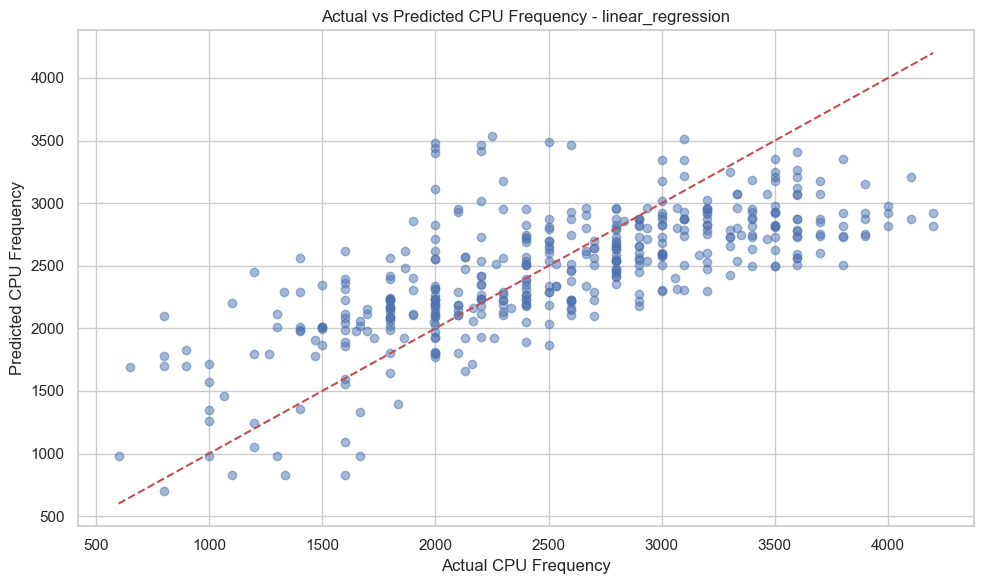

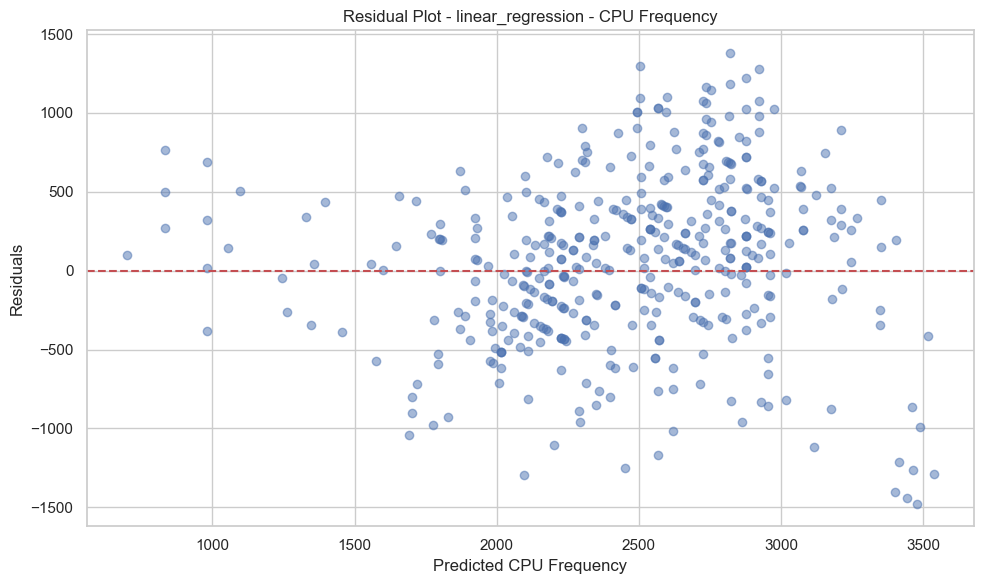

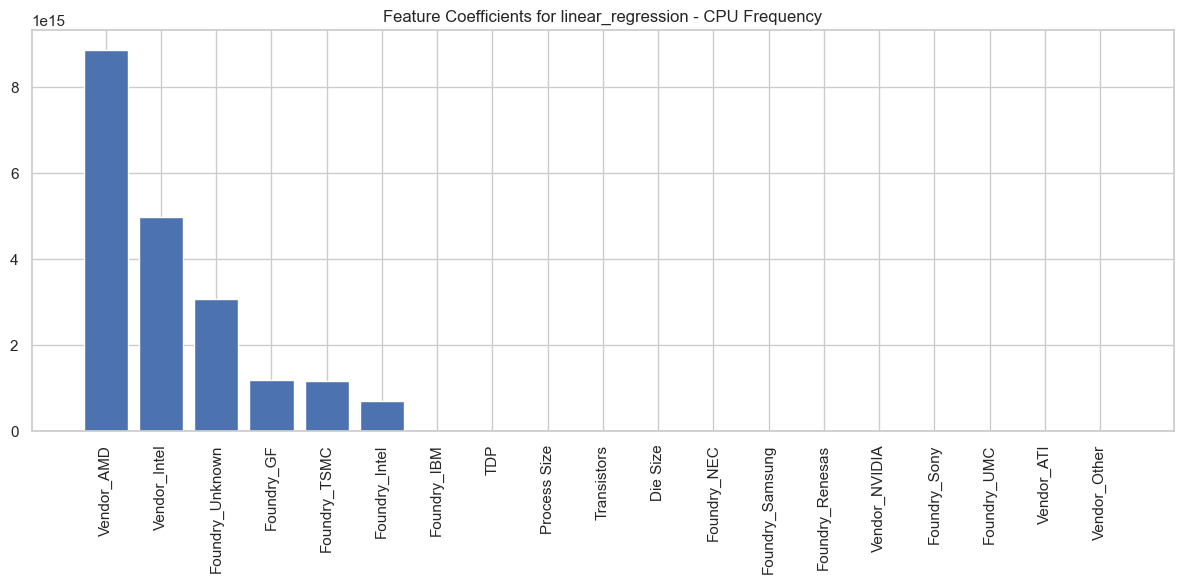




---------------  ridge_regression  ---------------


Training Data Metrics:
Model: ridge_regression
Mean Squared Error (MSE): 310319.9380
Root Mean Squared Error (RMSE): 557.0637
Mean Absolute Error (MAE): 434.5682
R² Score: 0.4455
--------------------------------------------------
Test Data Metrics:
Model: ridge_regression
Mean Squared Error (MSE): 287669.2766
Root Mean Squared Error (RMSE): 536.3481
Mean Absolute Error (MAE): 427.1841
R² Score: 0.4965
--------------------------------------------------


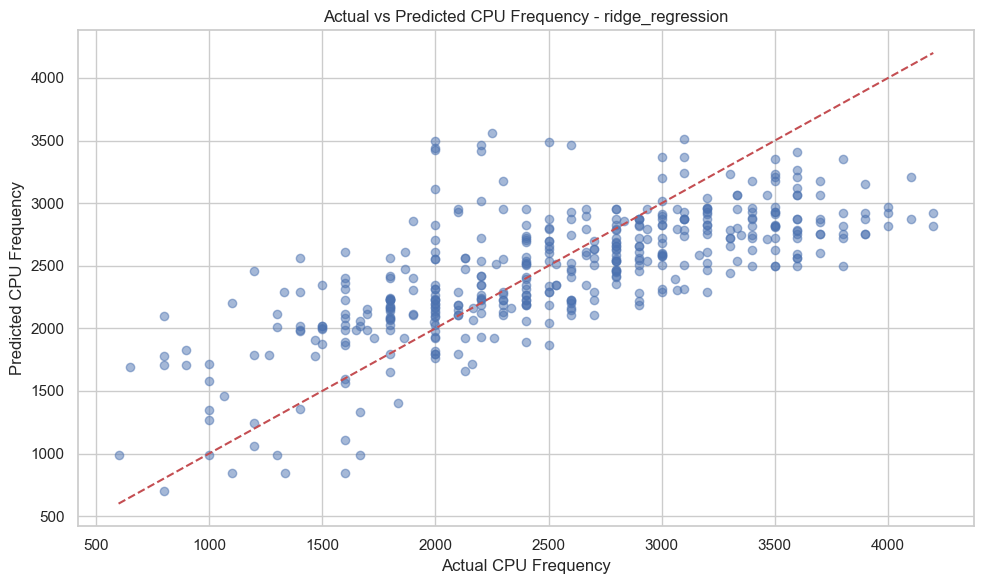

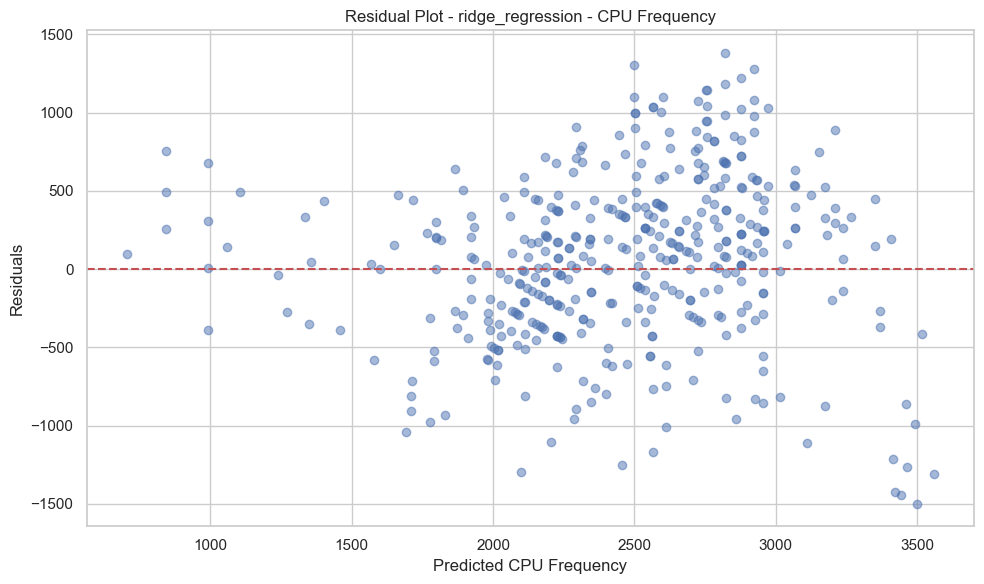

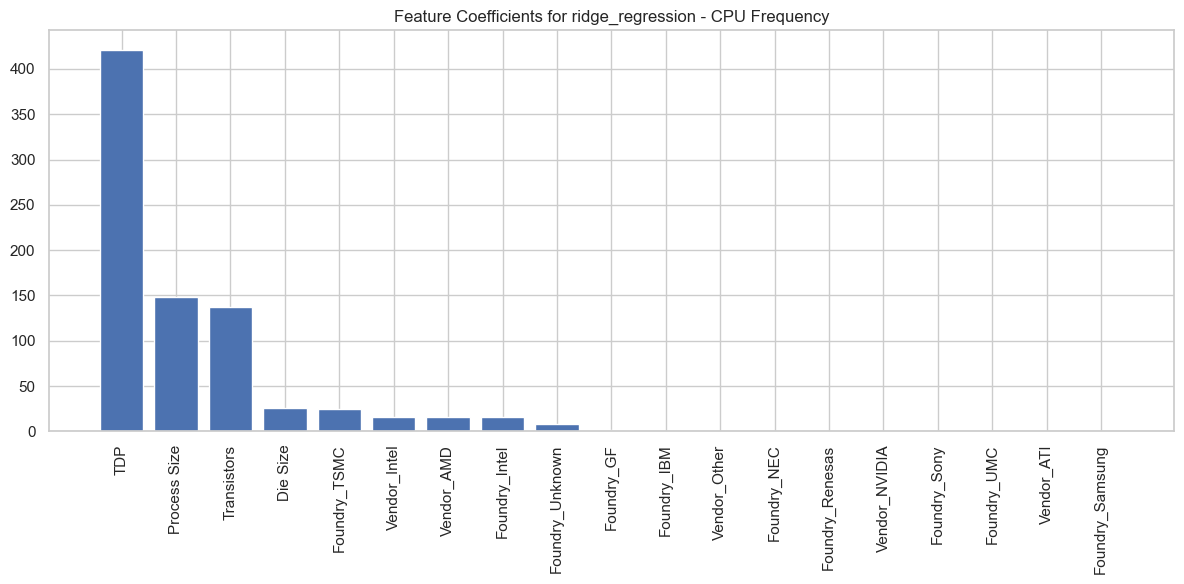




----------------  decision_tree  -----------------


Training Data Metrics:
Model: decision_tree
Mean Squared Error (MSE): 110831.6204
Root Mean Squared Error (RMSE): 332.9138
Mean Absolute Error (MAE): 248.8345
R² Score: 0.8020
--------------------------------------------------
Test Data Metrics:
Model: decision_tree
Mean Squared Error (MSE): 114522.2885
Root Mean Squared Error (RMSE): 338.4114
Mean Absolute Error (MAE): 249.8906
R² Score: 0.7995
--------------------------------------------------


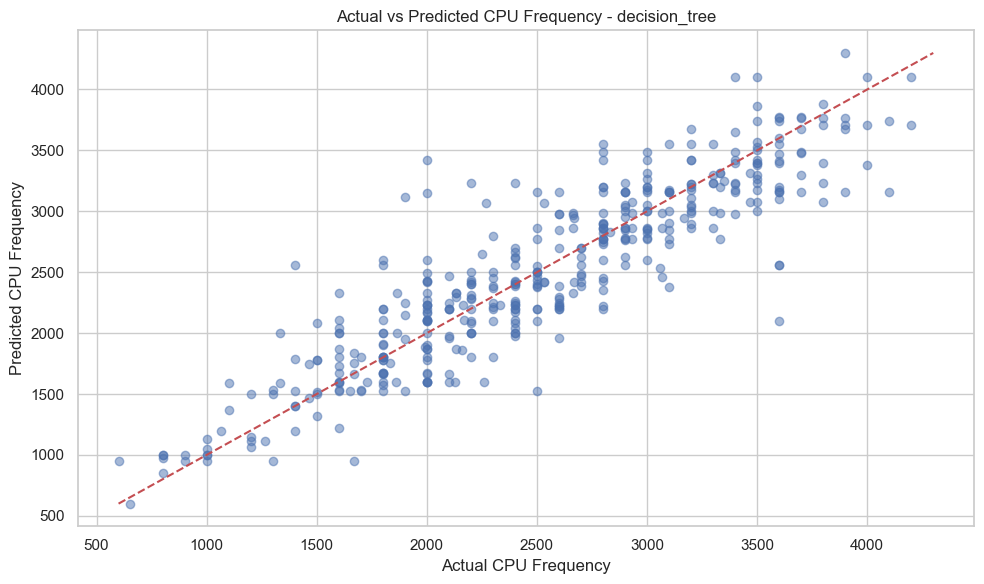

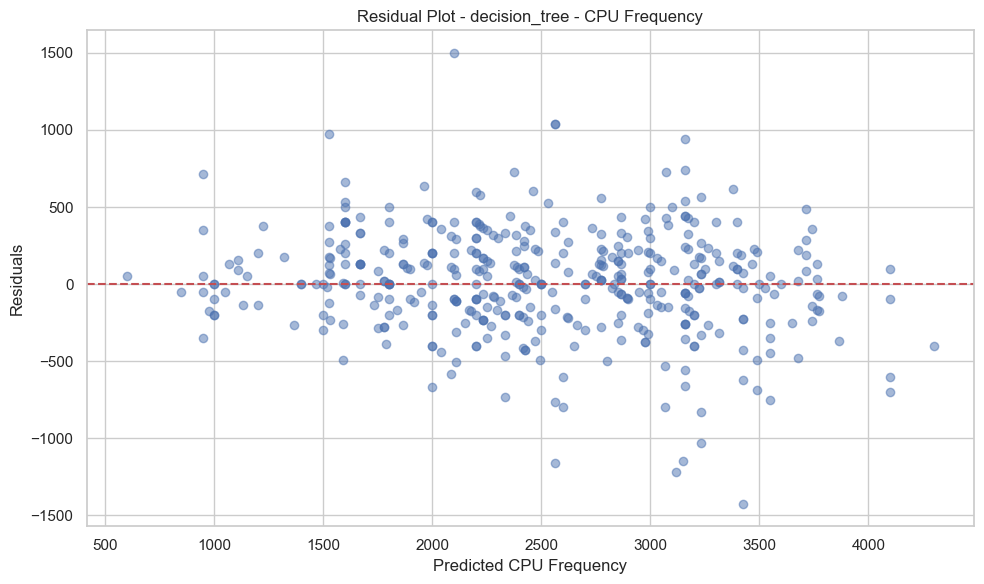

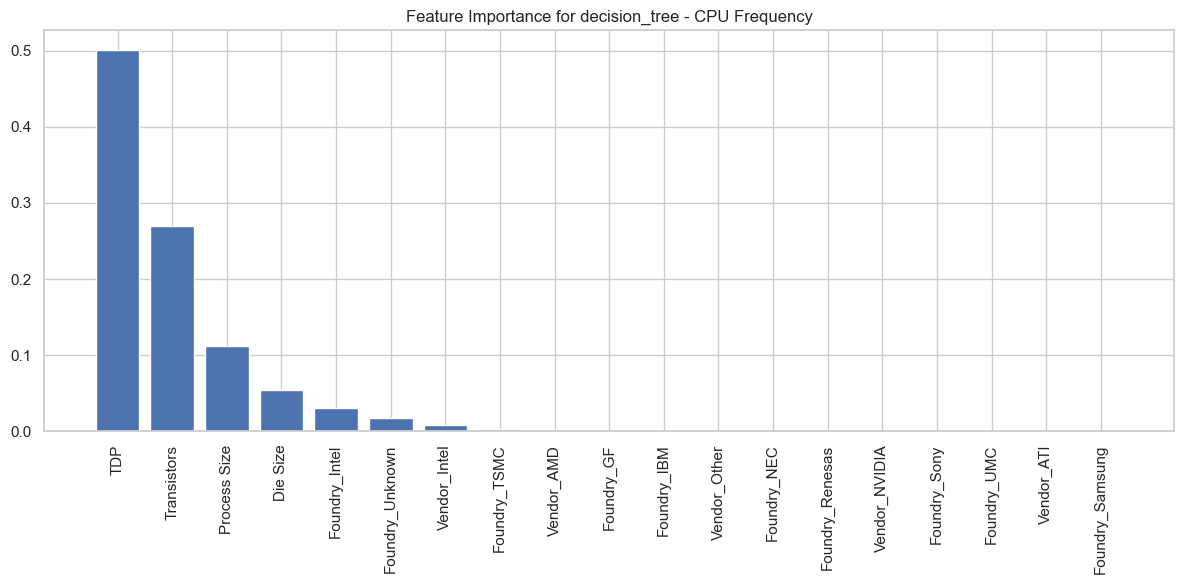




----------------  random_forest  -----------------


Training Data Metrics:
Model: random_forest
Mean Squared Error (MSE): 106537.1117
Root Mean Squared Error (RMSE): 326.4002
Mean Absolute Error (MAE): 245.3783
R² Score: 0.8096
--------------------------------------------------
Test Data Metrics:
Model: random_forest
Mean Squared Error (MSE): 113106.7166
Root Mean Squared Error (RMSE): 336.3134
Mean Absolute Error (MAE): 251.5930
R² Score: 0.8020
--------------------------------------------------


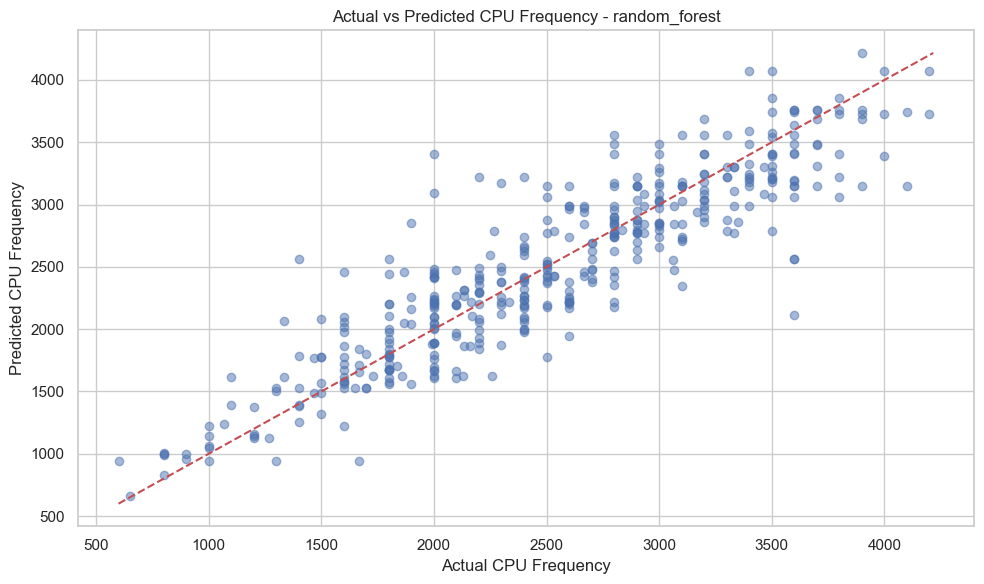

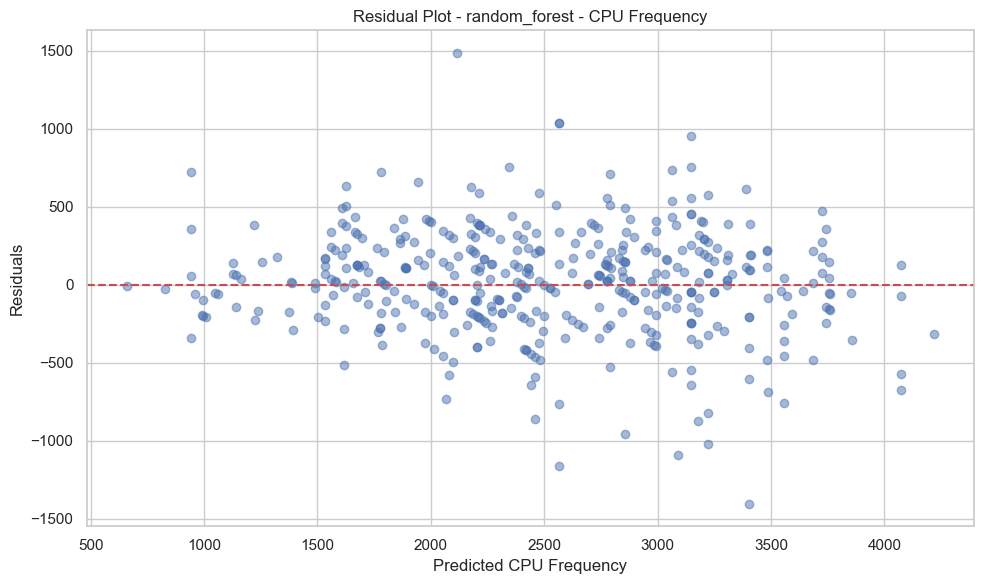

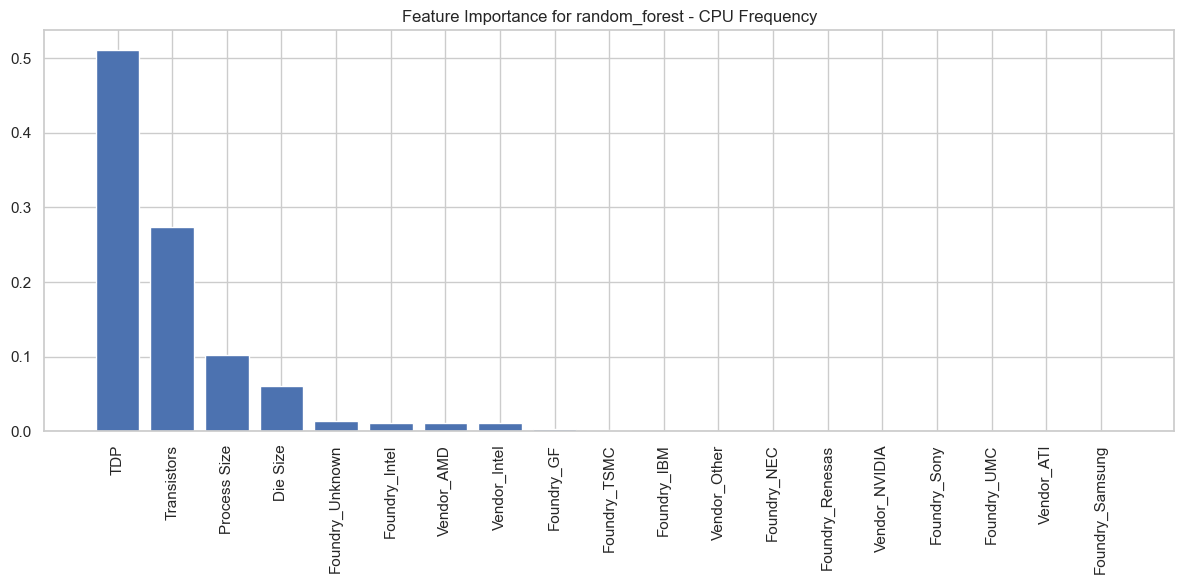




-------------------  xgboost  --------------------


Training Data Metrics:
Model: xgboost
Mean Squared Error (MSE): 105250.4082
Root Mean Squared Error (RMSE): 324.4232
Mean Absolute Error (MAE): 243.5544
R² Score: 0.8119
--------------------------------------------------
Test Data Metrics:
Model: xgboost
Mean Squared Error (MSE): 109555.1718
Root Mean Squared Error (RMSE): 330.9912
Mean Absolute Error (MAE): 246.7134
R² Score: 0.8082
--------------------------------------------------


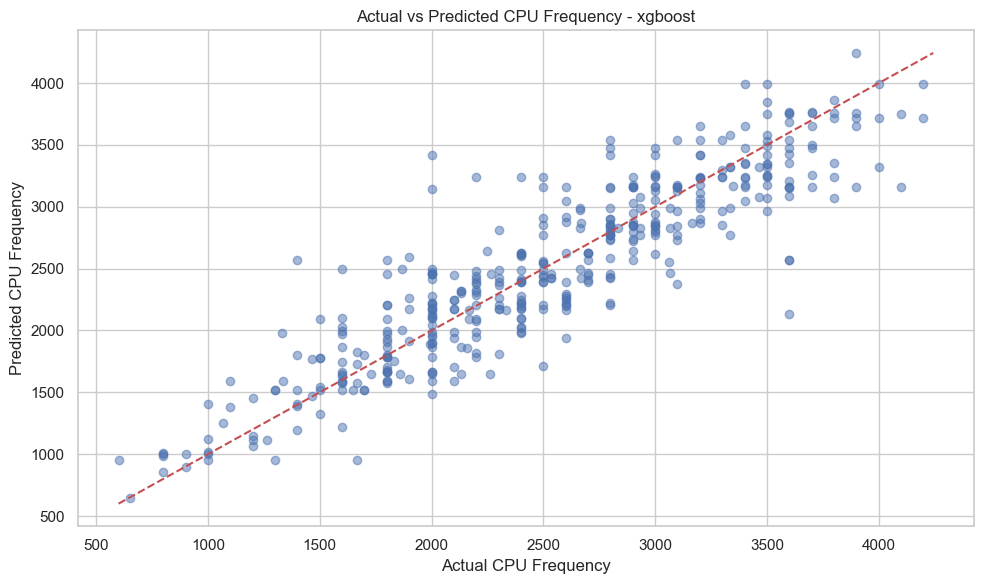

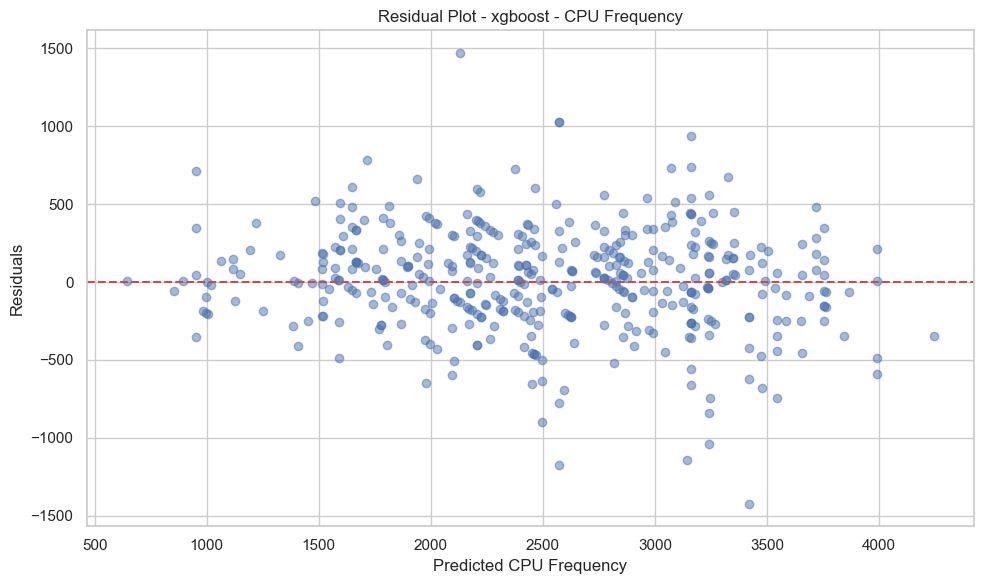

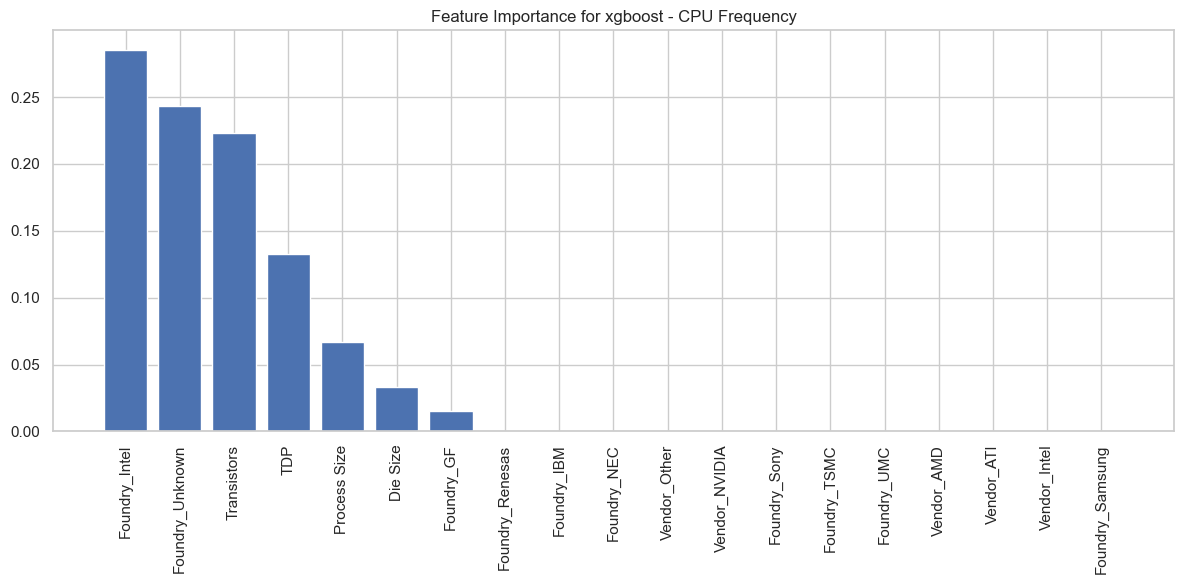




-------------------  lightgbm  -------------------


Training Data Metrics:
Model: lightgbm
Mean Squared Error (MSE): 107997.9048
Root Mean Squared Error (RMSE): 328.6303
Mean Absolute Error (MAE): 251.0382
R² Score: 0.8070
--------------------------------------------------
Test Data Metrics:
Model: lightgbm
Mean Squared Error (MSE): 118130.2806
Root Mean Squared Error (RMSE): 343.7009
Mean Absolute Error (MAE): 261.8681
R² Score: 0.7932
--------------------------------------------------


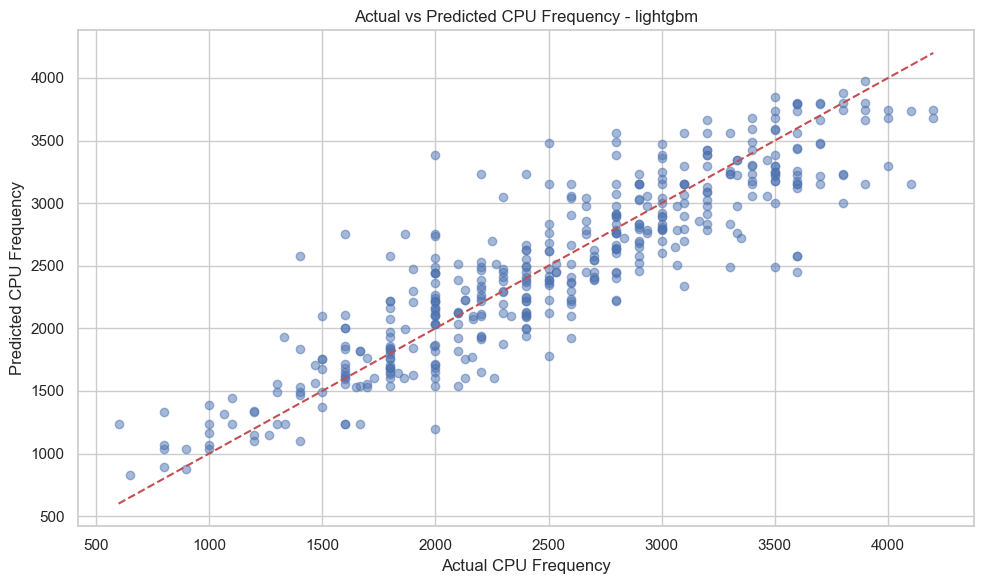

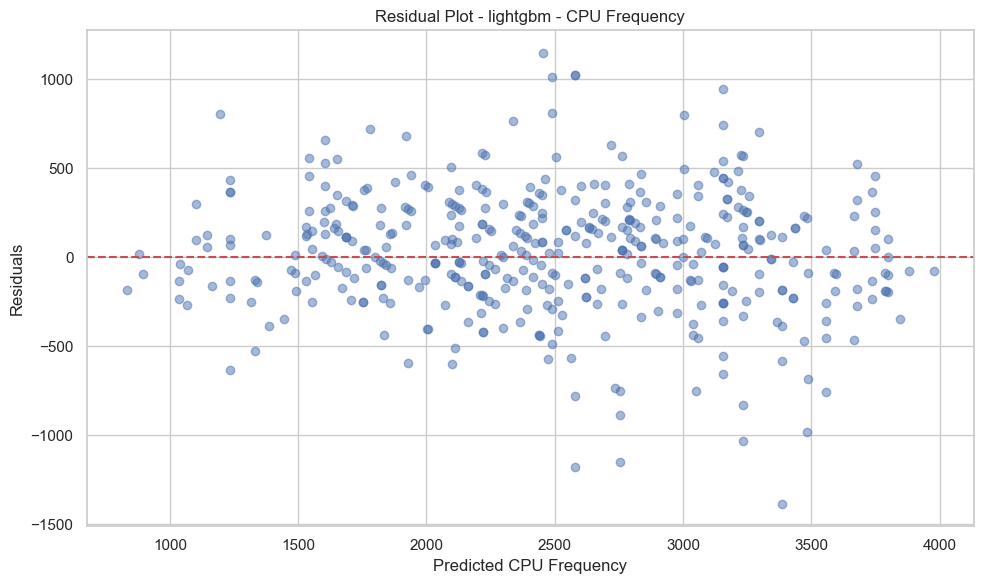

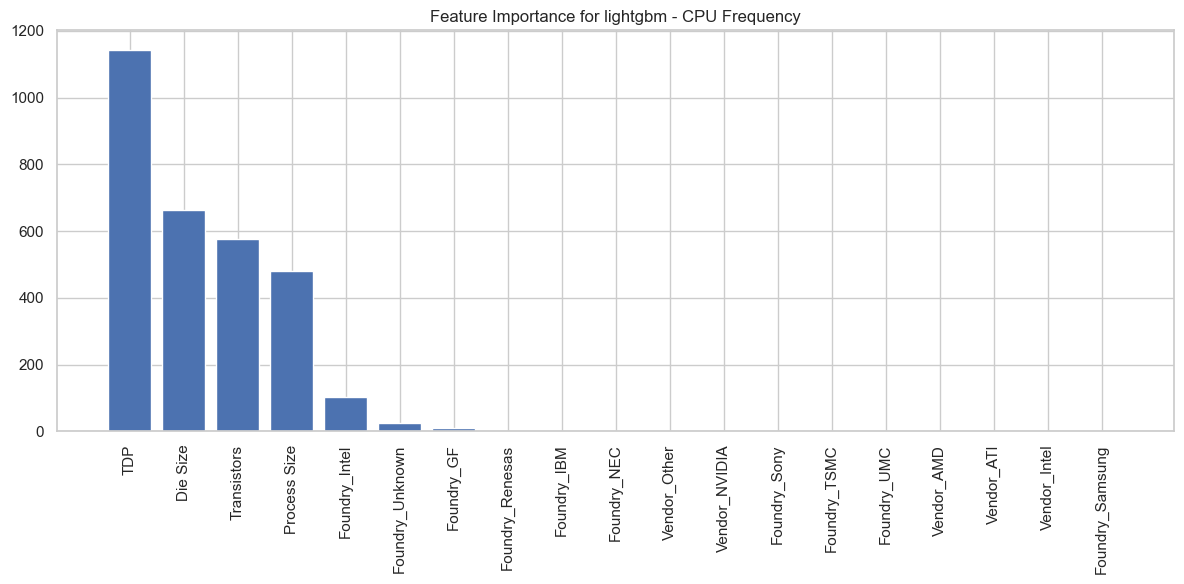




-------------------  catboost  -------------------


Training Data Metrics:
Model: catboost
Mean Squared Error (MSE): 102505.1618
Root Mean Squared Error (RMSE): 320.1643
Mean Absolute Error (MAE): 245.5629
R² Score: 0.8169
--------------------------------------------------
Test Data Metrics:
Model: catboost
Mean Squared Error (MSE): 108917.8907
Root Mean Squared Error (RMSE): 330.0271
Mean Absolute Error (MAE): 249.7207
R² Score: 0.8093
--------------------------------------------------


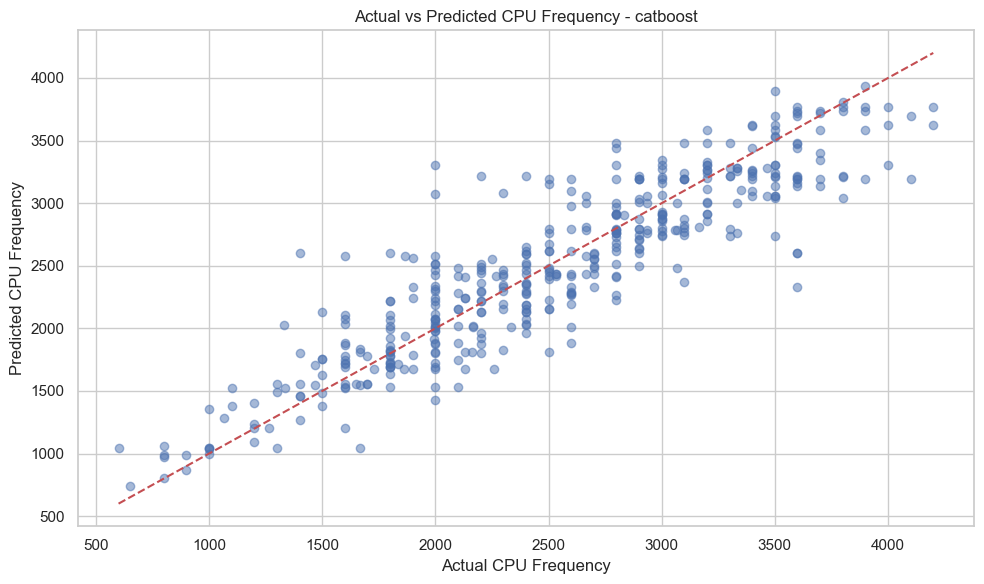

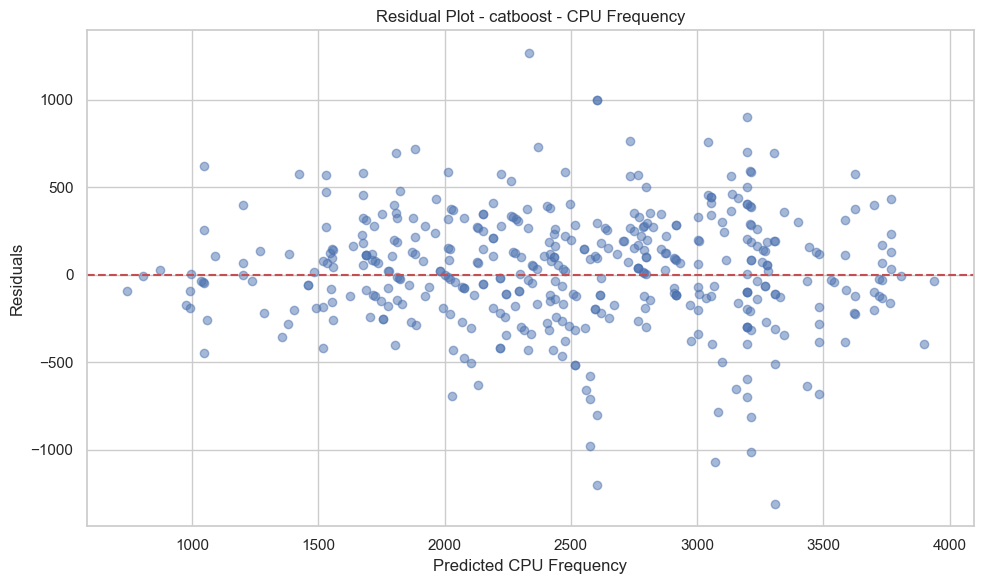

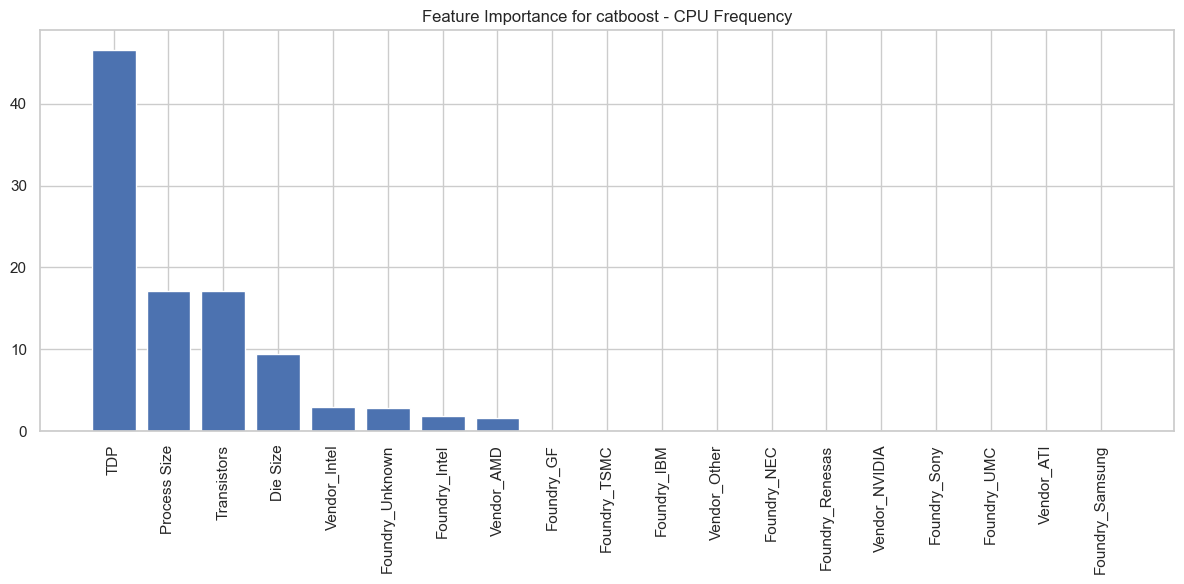




----------------  neural_network  ----------------


Training Data Metrics:
Model: neural_network
Mean Squared Error (MSE): 298651.9683
Root Mean Squared Error (RMSE): 546.4906
Mean Absolute Error (MAE): 427.9223
R² Score: 0.4664
--------------------------------------------------
Test Data Metrics:
Model: neural_network
Mean Squared Error (MSE): 274829.0619
Root Mean Squared Error (RMSE): 524.2414
Mean Absolute Error (MAE): 419.2692
R² Score: 0.5189
--------------------------------------------------


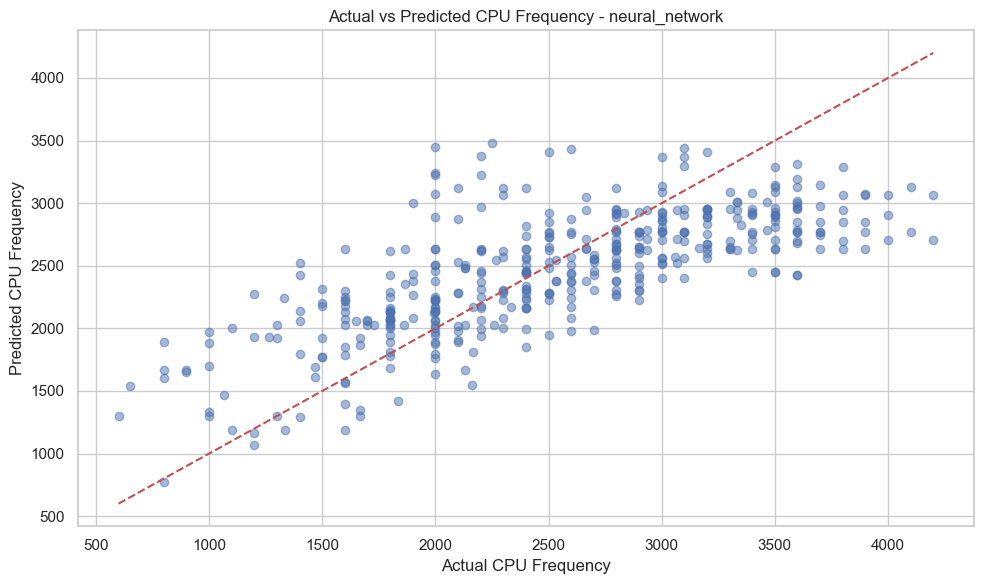

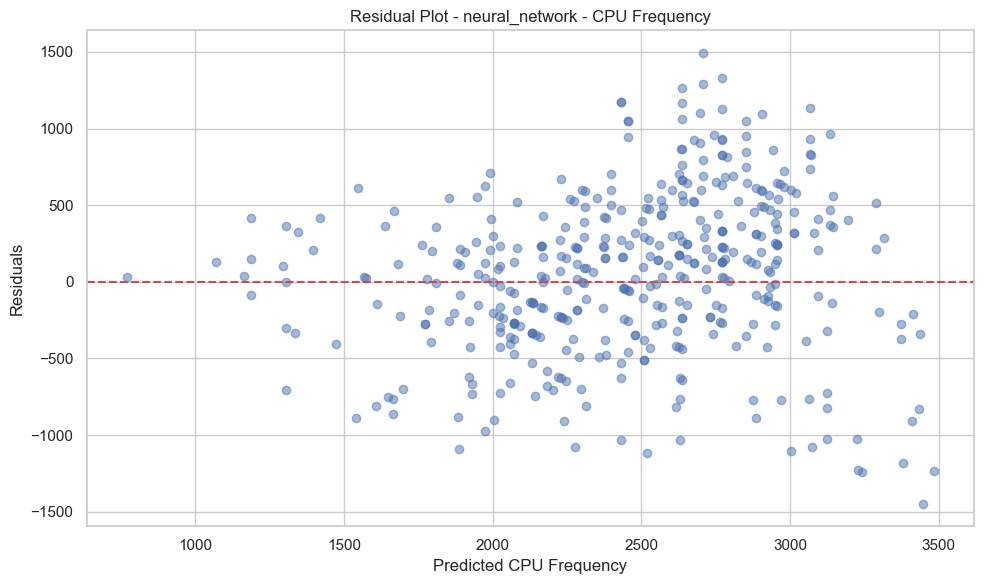

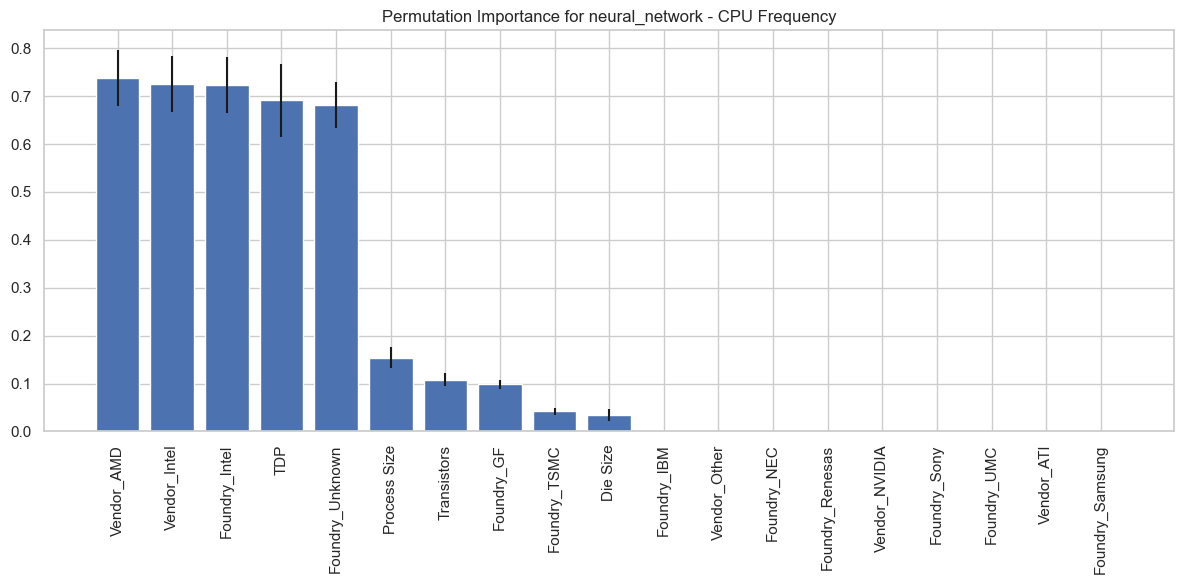




---------------------  svr  ----------------------


Training Data Metrics:
Model: svr
Mean Squared Error (MSE): 507780.7342
Root Mean Squared Error (RMSE): 712.5874
Mean Absolute Error (MAE): 580.6025
R² Score: 0.0927
--------------------------------------------------
Test Data Metrics:
Model: svr
Mean Squared Error (MSE): 512719.6008
Root Mean Squared Error (RMSE): 716.0444
Mean Absolute Error (MAE): 589.6585
R² Score: 0.1025
--------------------------------------------------


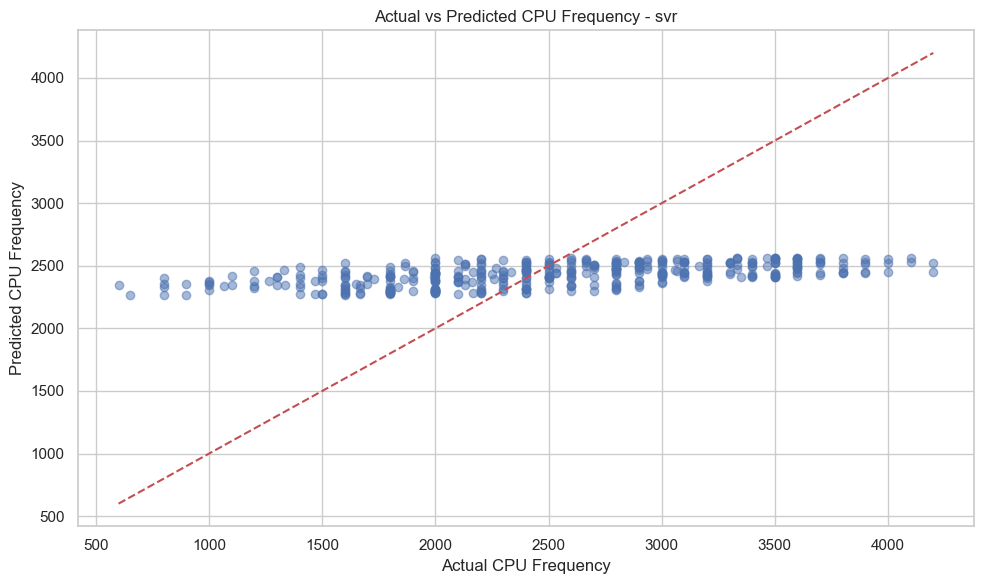

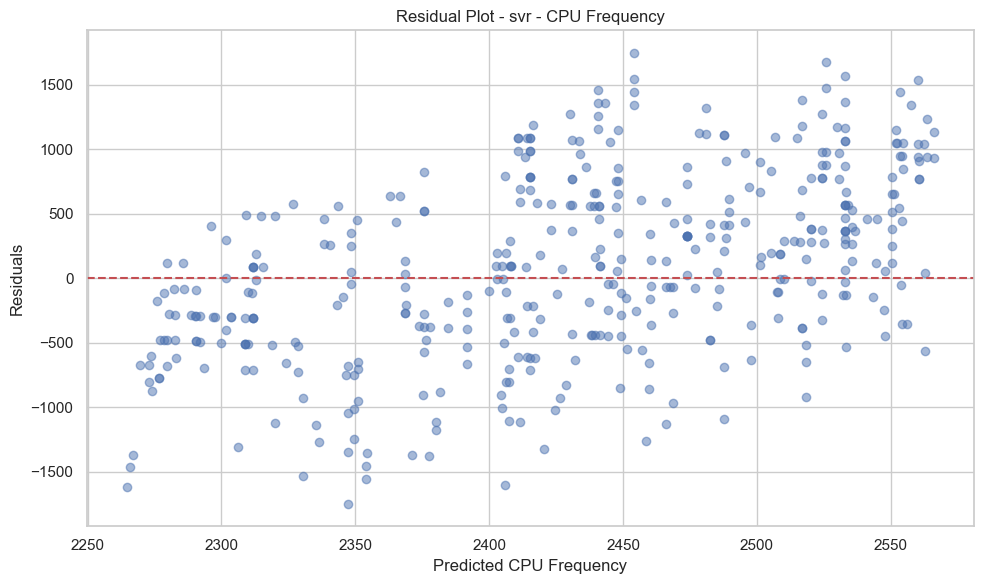

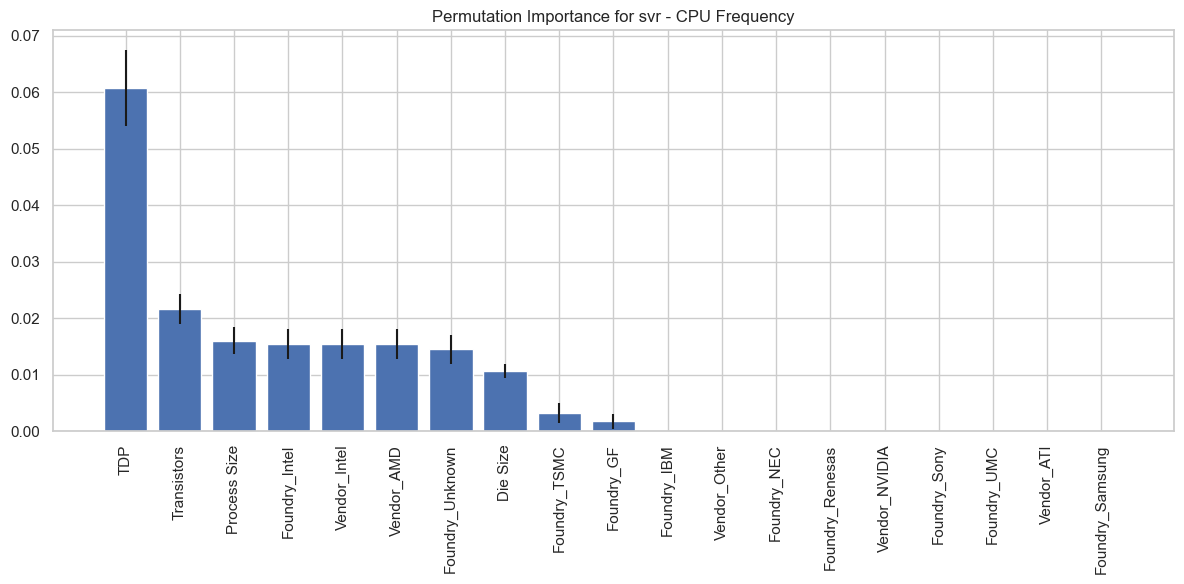


                       GPU FP32 GFLOPS Prediction Models                        




--------------  linear_regression  ---------------


Training Data Metrics:
Model: linear_regression
Mean Squared Error (MSE): 7189433216681244761010118590464.0000
Root Mean Squared Error (RMSE): 2681311846220287.0000
Mean Absolute Error (MAE): 74596091004605.4375
R² Score: -5878385587254786078539776.0000
--------------------------------------------------
Test Data Metrics:
Model: linear_regression
Mean Squared Error (MSE): 394878.1431
Root Mean Squared Error (RMSE): 628.3933
Mean Absolute Error (MAE): 429.5886
R² Score: 0.6128
--------------------------------------------------


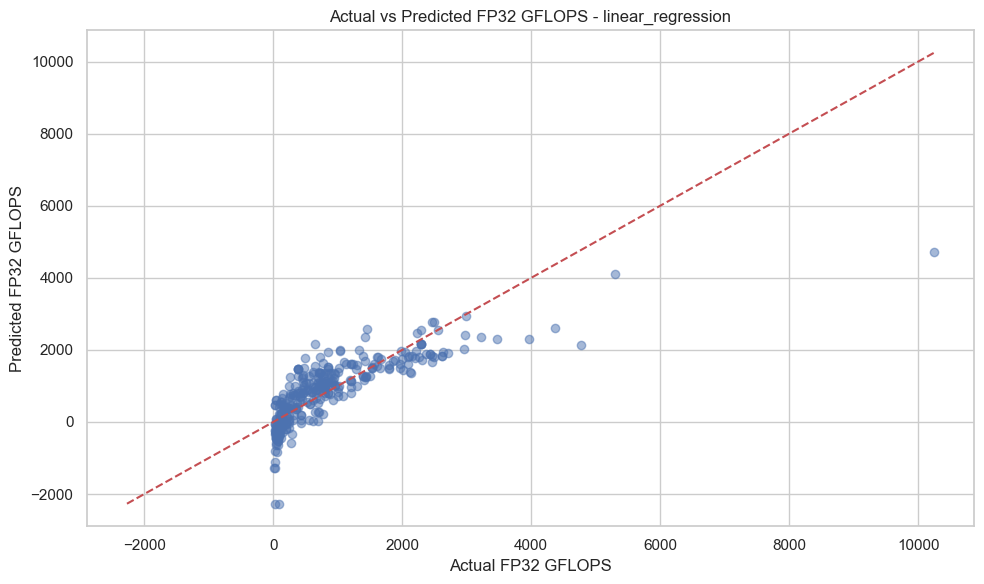

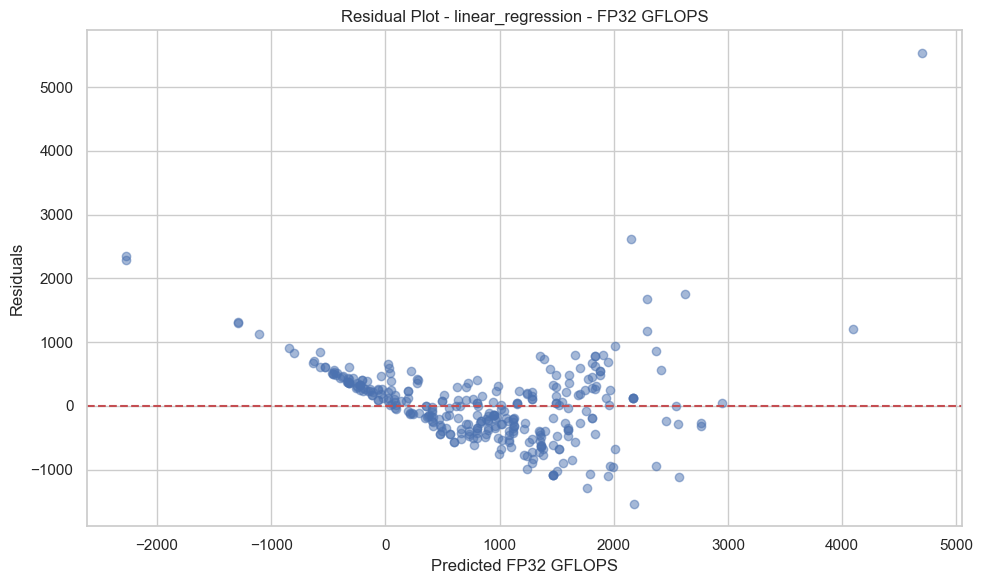

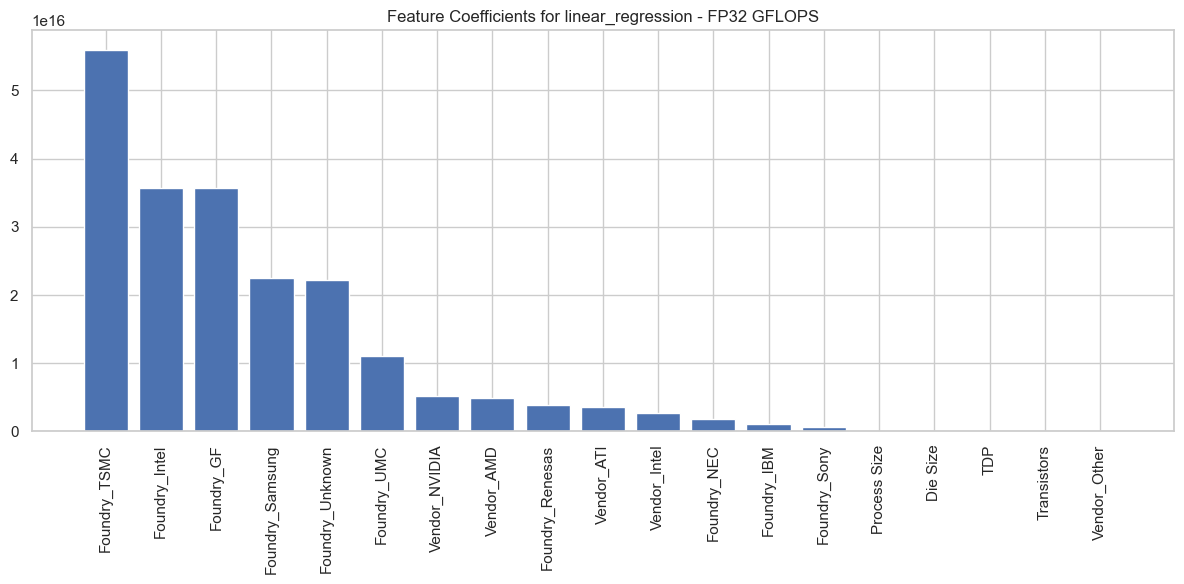




---------------  ridge_regression  ---------------


Training Data Metrics:
Model: ridge_regression
Mean Squared Error (MSE): 456316.8123
Root Mean Squared Error (RMSE): 675.5123
Mean Absolute Error (MAE): 470.0177
R² Score: 0.6269
--------------------------------------------------
Test Data Metrics:
Model: ridge_regression
Mean Squared Error (MSE): 387866.7084
Root Mean Squared Error (RMSE): 622.7895
Mean Absolute Error (MAE): 422.1845
R² Score: 0.6197
--------------------------------------------------


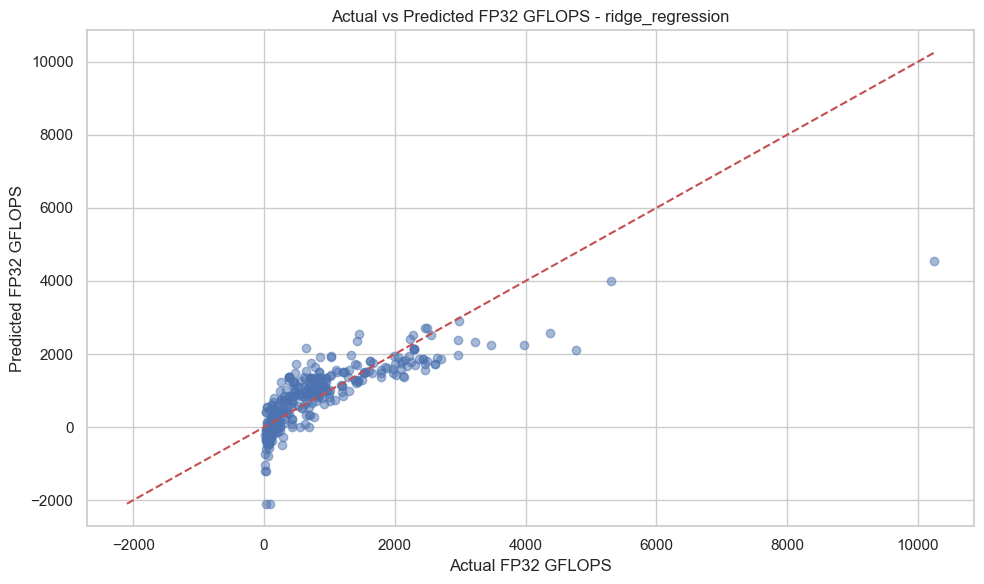

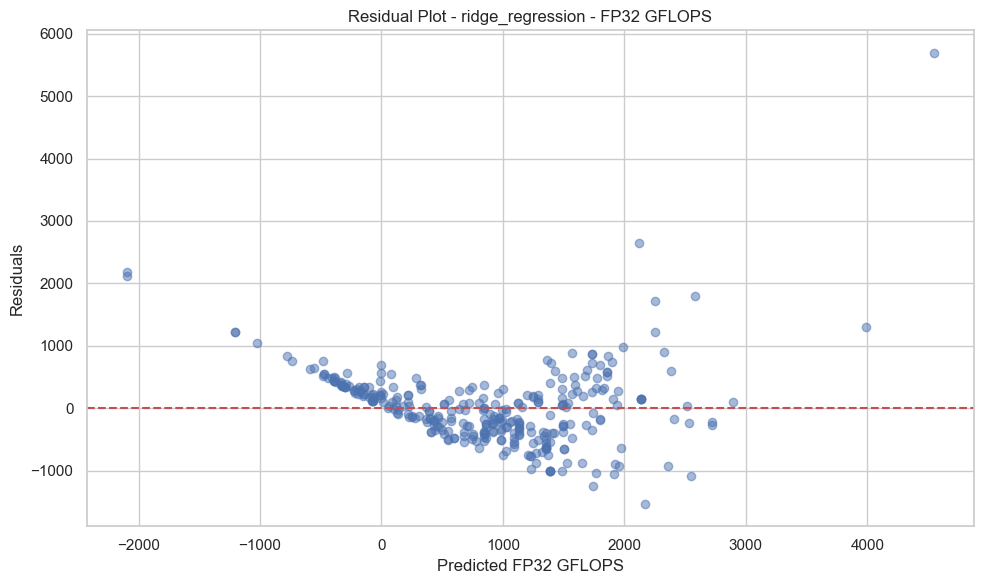

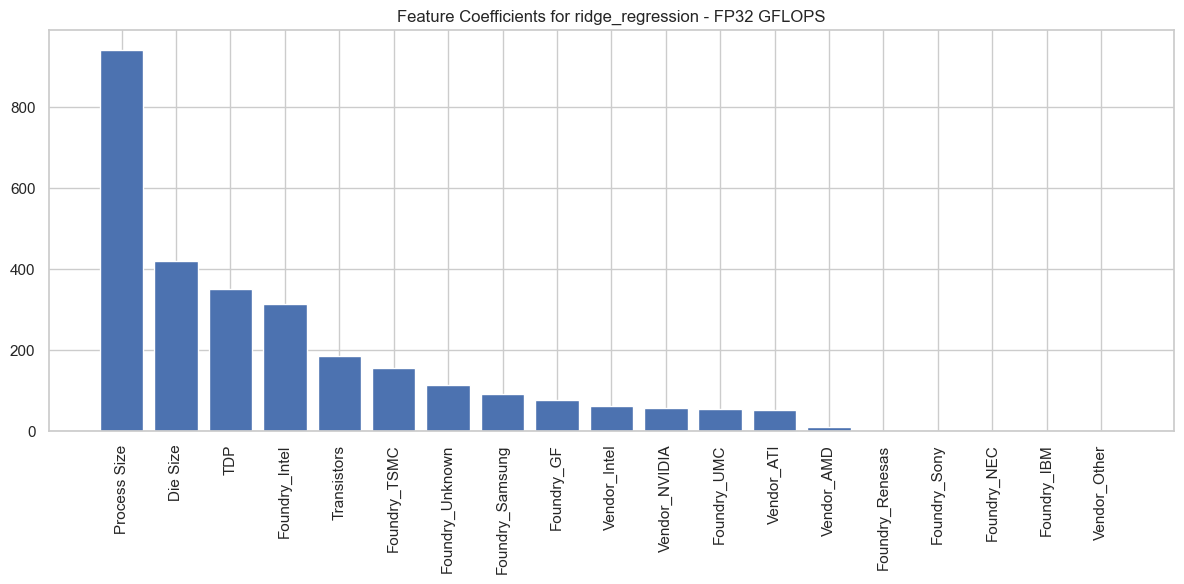




----------------  decision_tree  -----------------


Training Data Metrics:
Model: decision_tree
Mean Squared Error (MSE): 108743.8740
Root Mean Squared Error (RMSE): 329.7634
Mean Absolute Error (MAE): 156.2666
R² Score: 0.9111
--------------------------------------------------
Test Data Metrics:
Model: decision_tree
Mean Squared Error (MSE): 99705.8819
Root Mean Squared Error (RMSE): 315.7624
Mean Absolute Error (MAE): 163.3151
R² Score: 0.9022
--------------------------------------------------


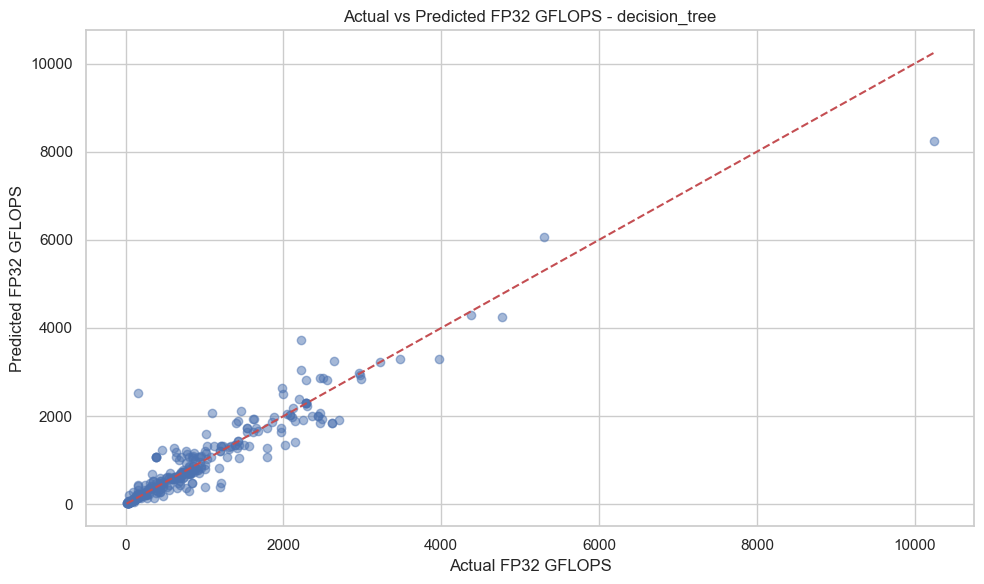

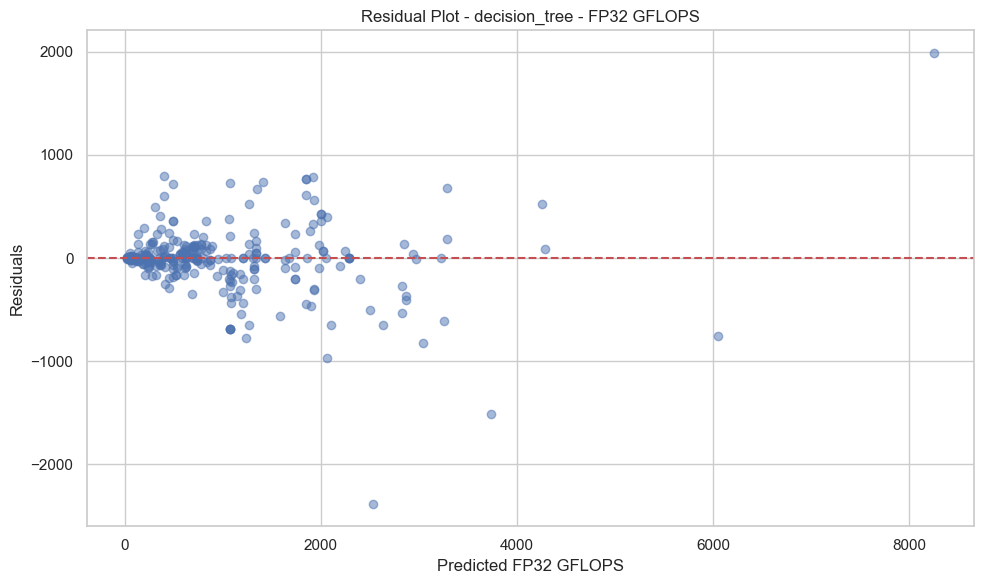

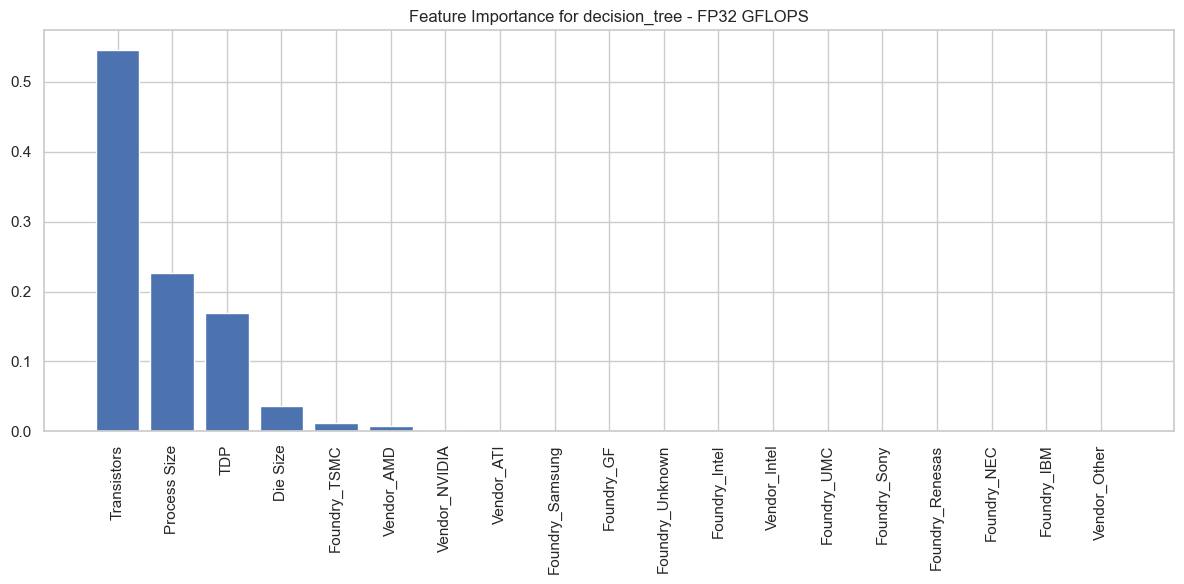




----------------  random_forest  -----------------


Training Data Metrics:
Model: random_forest
Mean Squared Error (MSE): 99758.9838
Root Mean Squared Error (RMSE): 315.8465
Mean Absolute Error (MAE): 154.2697
R² Score: 0.9184
--------------------------------------------------
Test Data Metrics:
Model: random_forest
Mean Squared Error (MSE): 73986.6358
Root Mean Squared Error (RMSE): 272.0048
Mean Absolute Error (MAE): 150.7497
R² Score: 0.9275
--------------------------------------------------


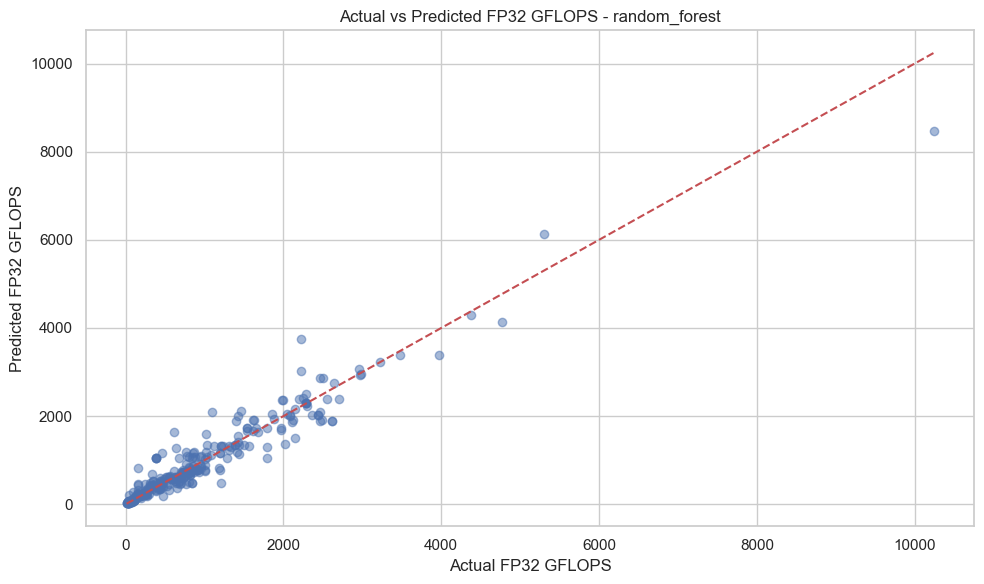

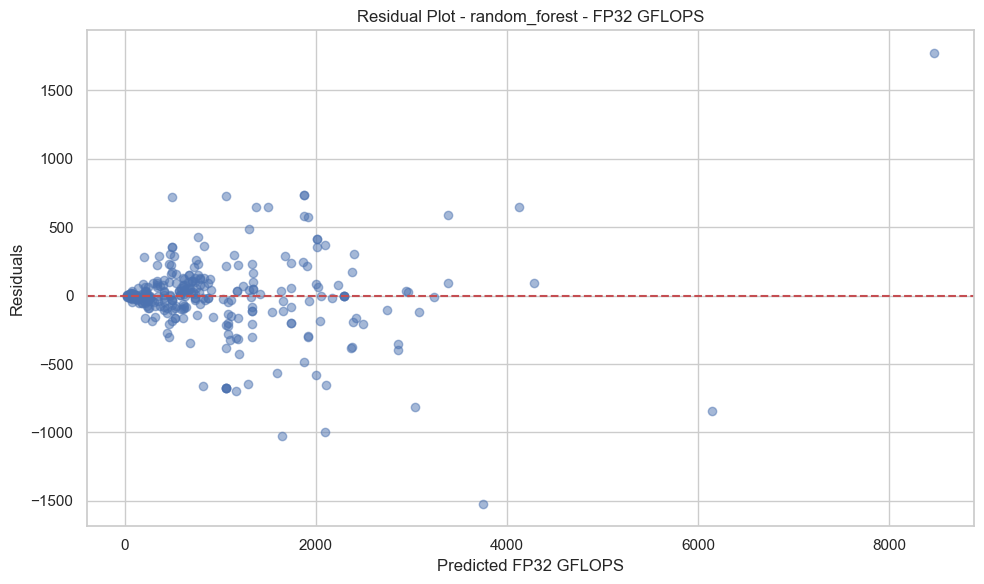

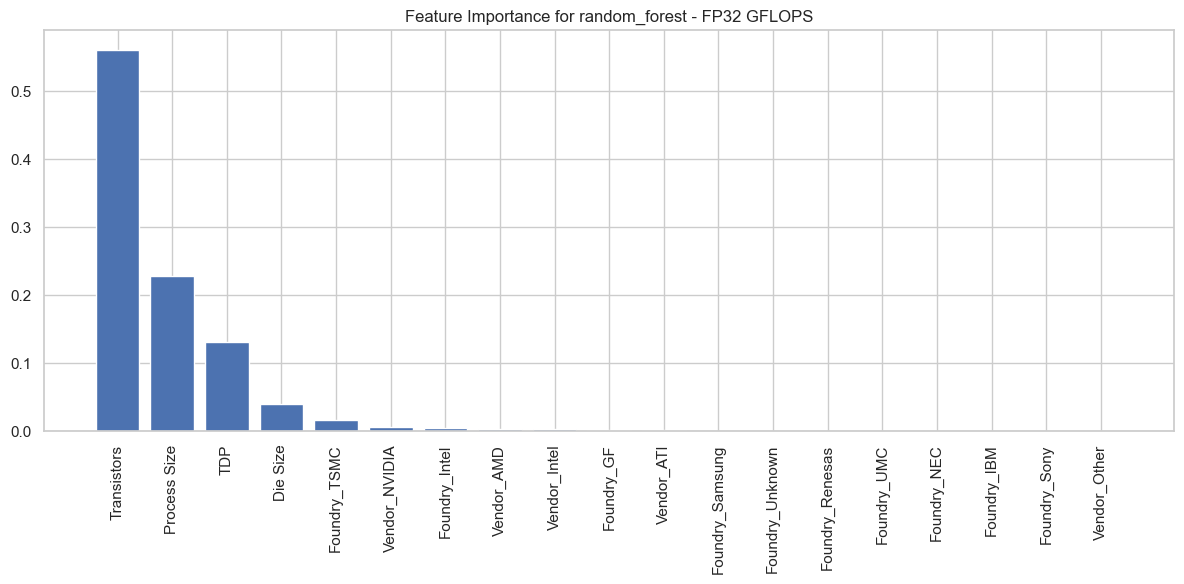




-------------------  xgboost  --------------------


Training Data Metrics:
Model: xgboost
Mean Squared Error (MSE): 90800.8704
Root Mean Squared Error (RMSE): 301.3318
Mean Absolute Error (MAE): 148.8761
R² Score: 0.9258
--------------------------------------------------
Test Data Metrics:
Model: xgboost
Mean Squared Error (MSE): 84765.4668
Root Mean Squared Error (RMSE): 291.1451
Mean Absolute Error (MAE): 156.3553
R² Score: 0.9169
--------------------------------------------------


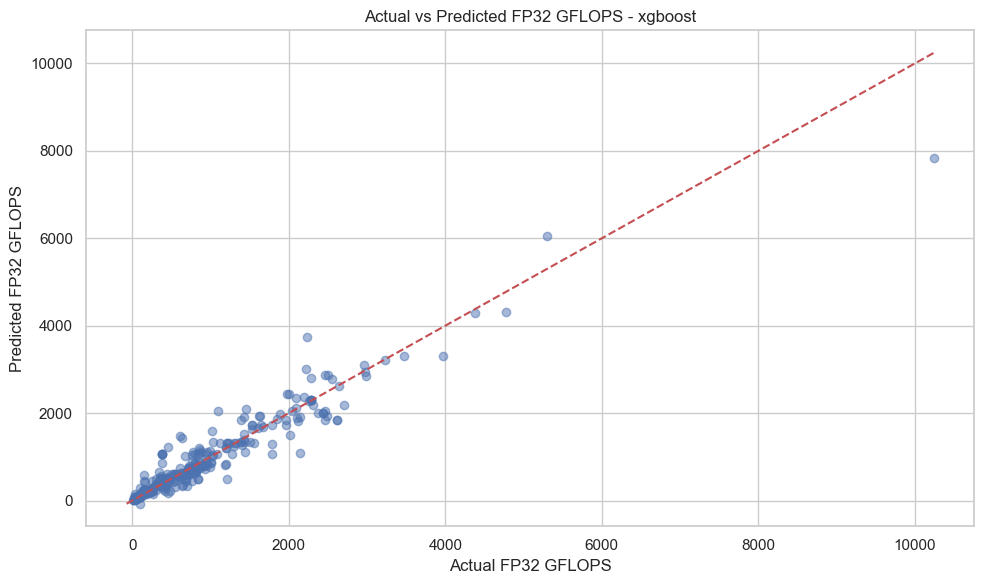

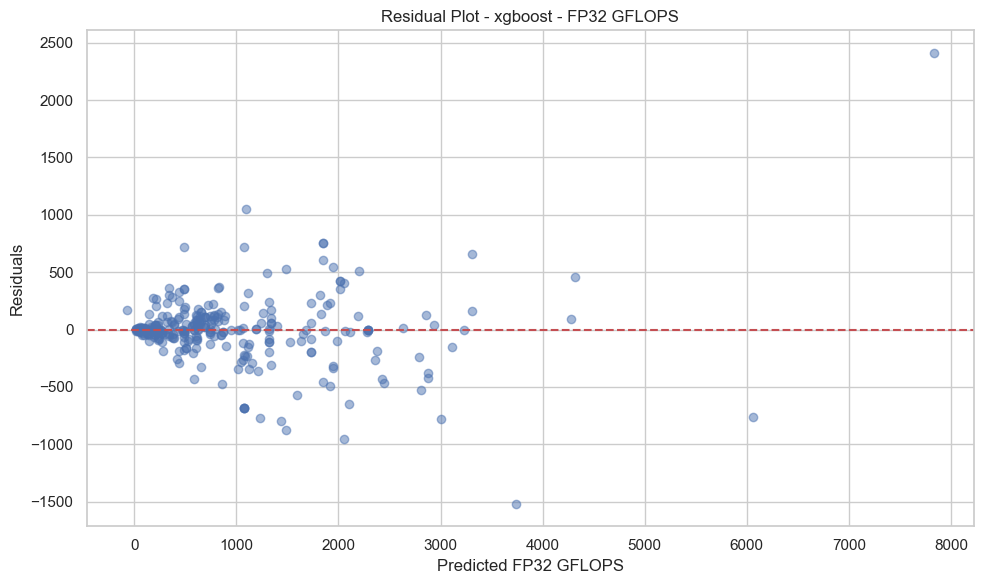

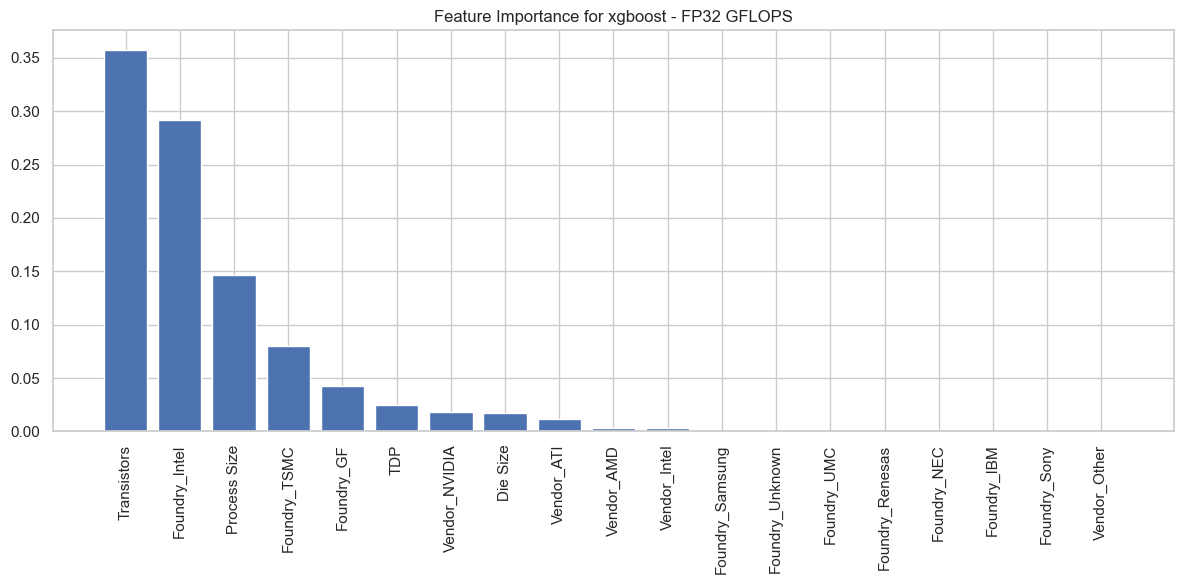




-------------------  lightgbm  -------------------


Training Data Metrics:
Model: lightgbm
Mean Squared Error (MSE): 136966.0930
Root Mean Squared Error (RMSE): 370.0893
Mean Absolute Error (MAE): 178.4098
R² Score: 0.8880
--------------------------------------------------
Test Data Metrics:
Model: lightgbm
Mean Squared Error (MSE): 90430.1346
Root Mean Squared Error (RMSE): 300.7160
Mean Absolute Error (MAE): 163.3324
R² Score: 0.9113
--------------------------------------------------


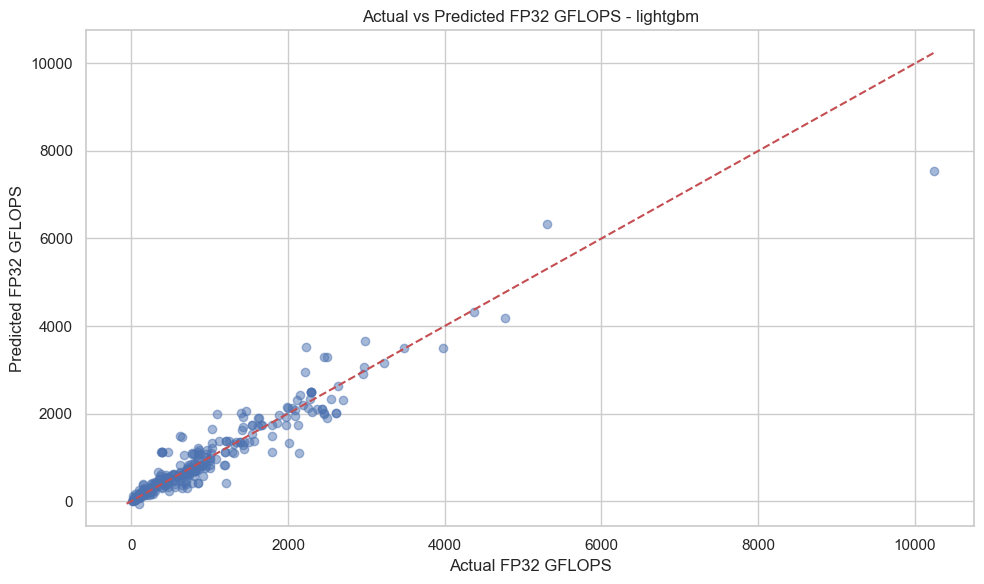

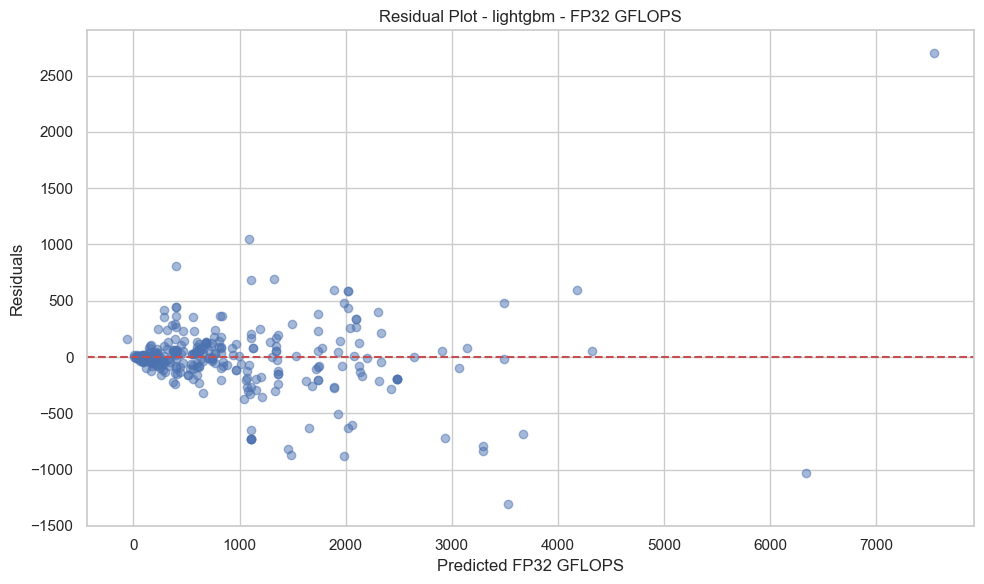

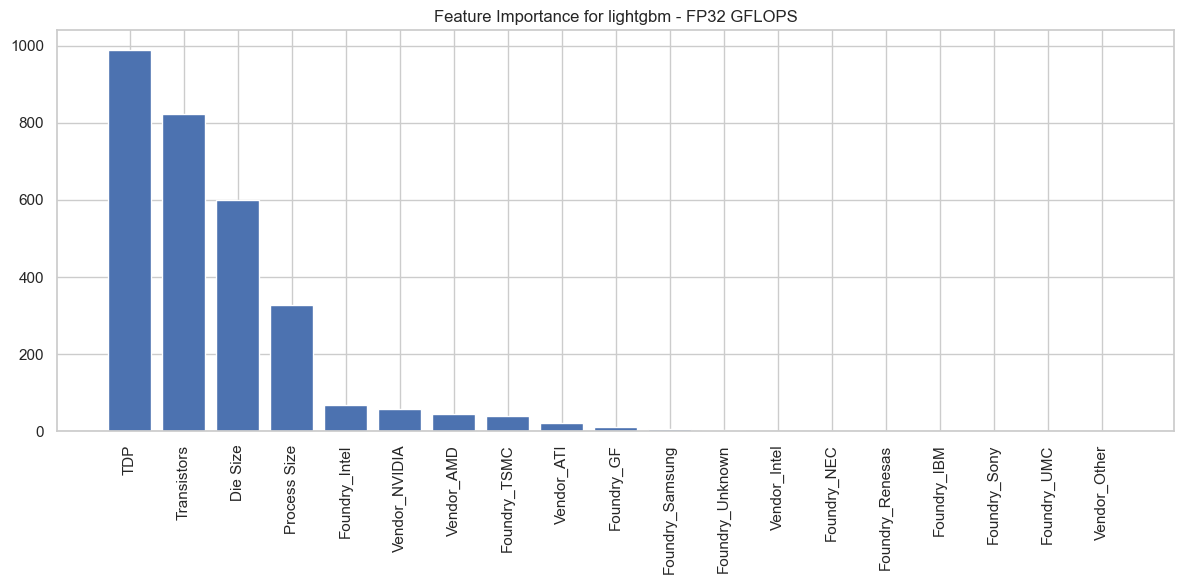




-------------------  catboost  -------------------


Training Data Metrics:
Model: catboost
Mean Squared Error (MSE): 104007.9737
Root Mean Squared Error (RMSE): 322.5027
Mean Absolute Error (MAE): 162.0192
R² Score: 0.9150
--------------------------------------------------
Test Data Metrics:
Model: catboost
Mean Squared Error (MSE): 71159.8170
Root Mean Squared Error (RMSE): 266.7580
Mean Absolute Error (MAE): 157.0996
R² Score: 0.9302
--------------------------------------------------


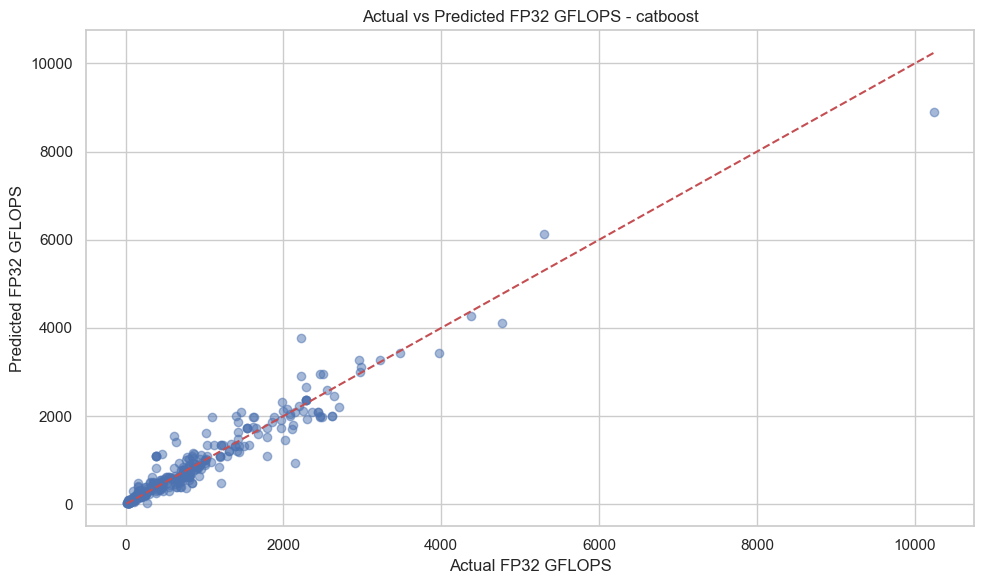

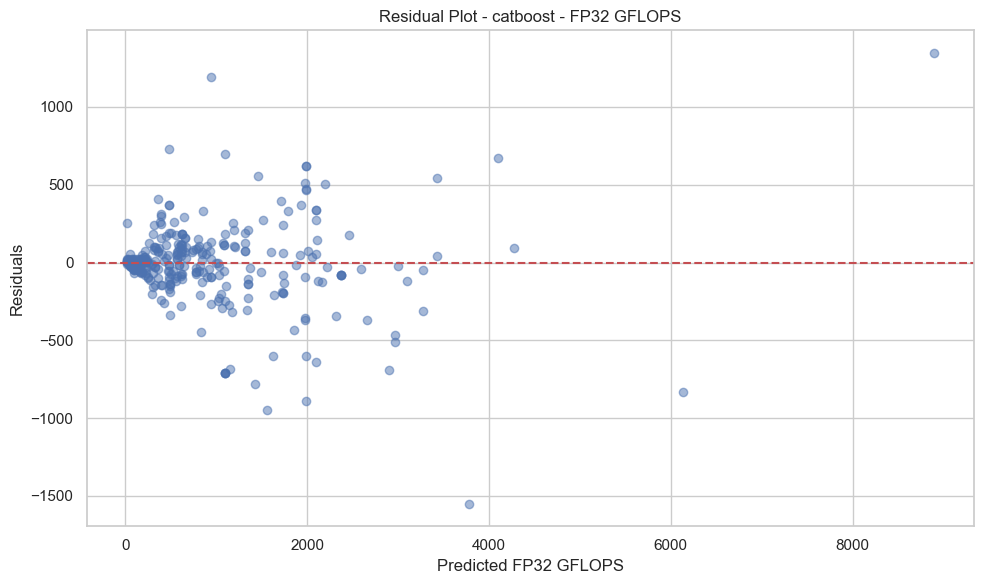

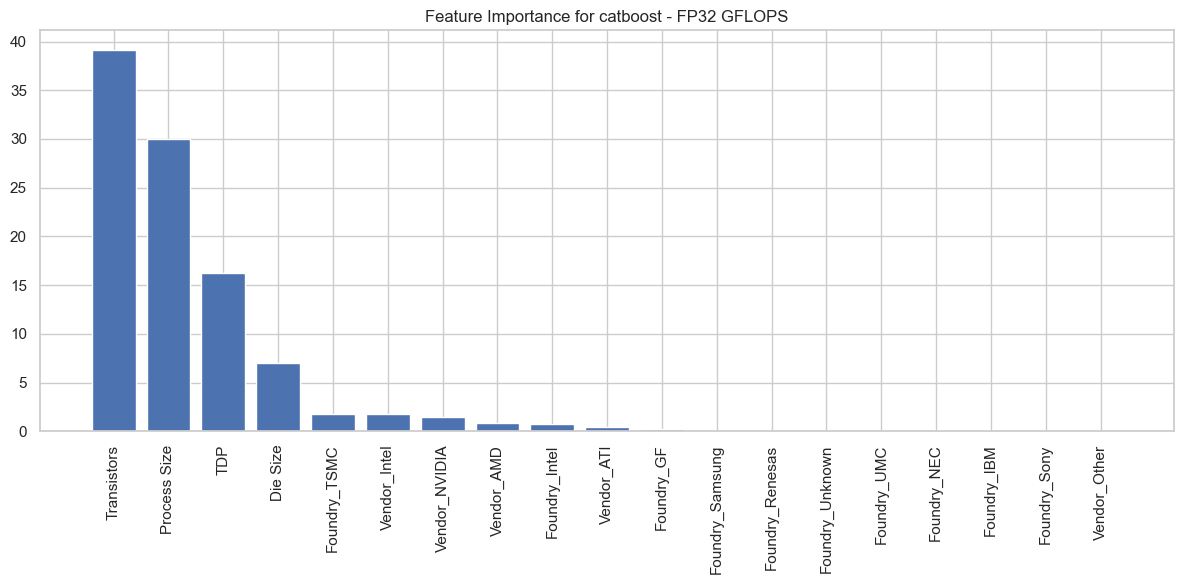




----------------  neural_network  ----------------


Training Data Metrics:
Model: neural_network
Mean Squared Error (MSE): 257211.7369
Root Mean Squared Error (RMSE): 507.1605
Mean Absolute Error (MAE): 307.2292
R² Score: 0.7897
--------------------------------------------------
Test Data Metrics:
Model: neural_network
Mean Squared Error (MSE): 210274.7397
Root Mean Squared Error (RMSE): 458.5572
Mean Absolute Error (MAE): 277.1085
R² Score: 0.7938
--------------------------------------------------


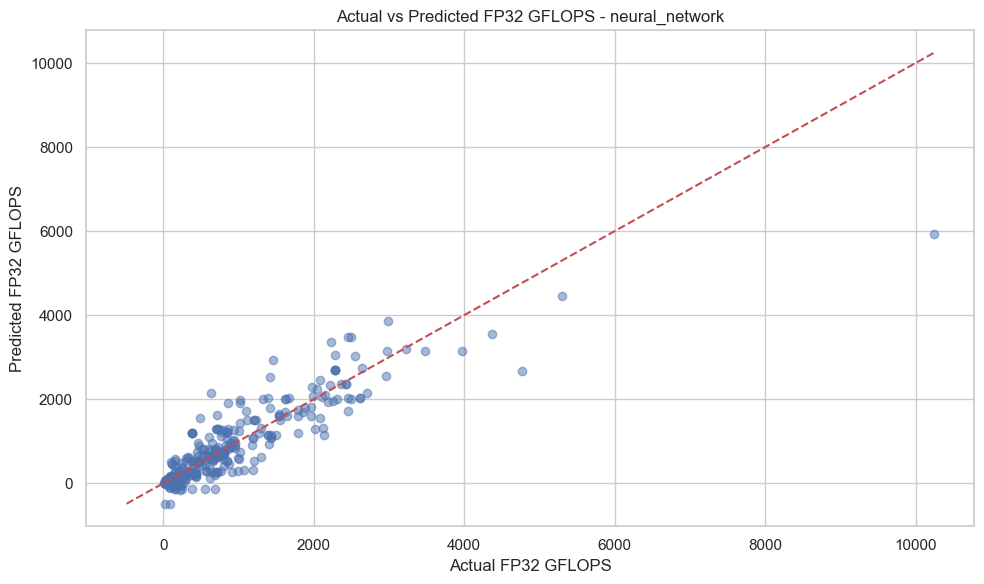

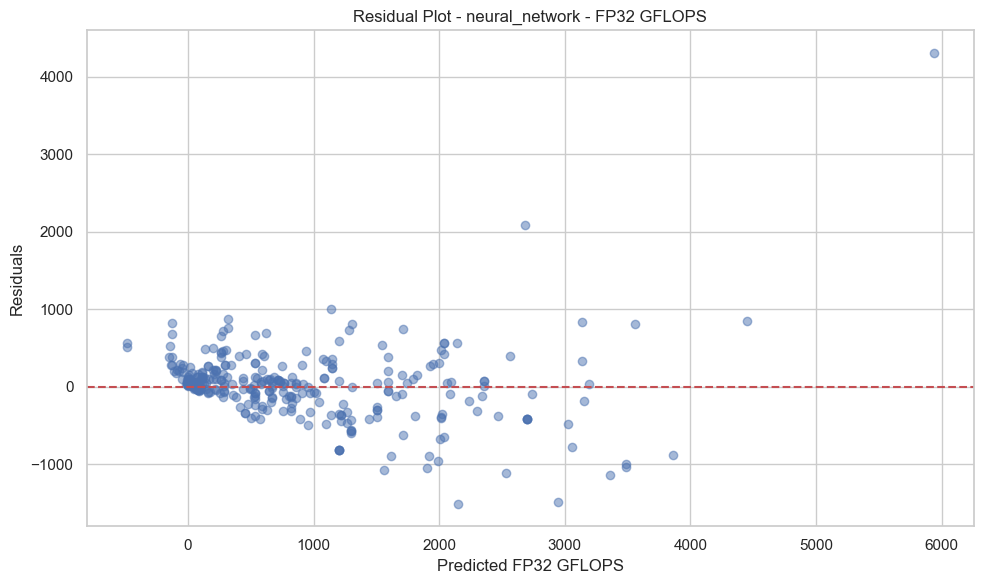

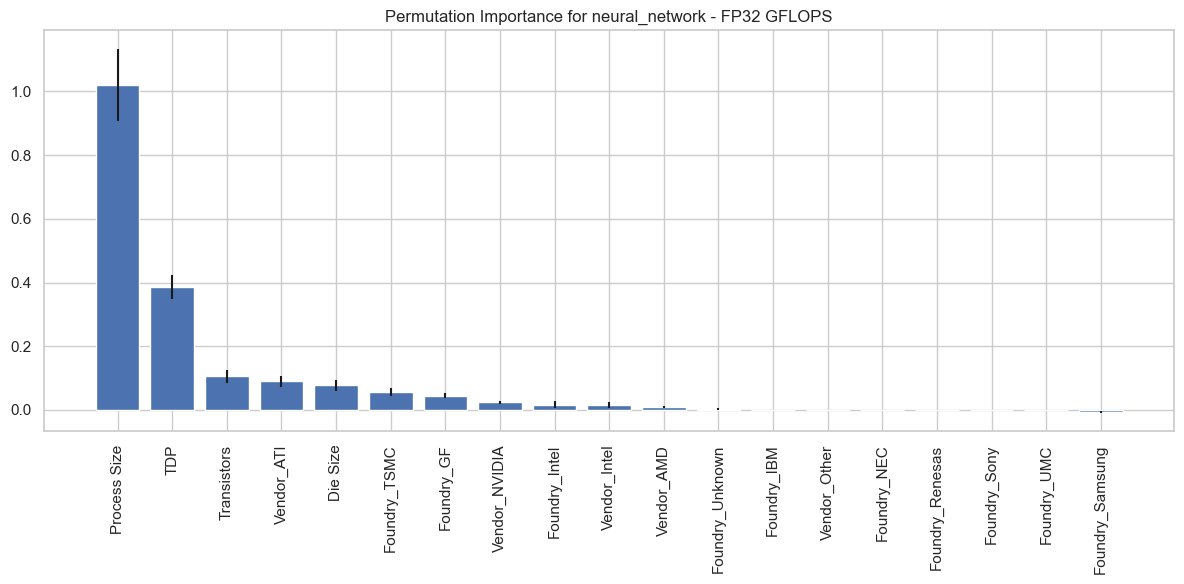




---------------------  svr  ----------------------


Training Data Metrics:
Model: svr
Mean Squared Error (MSE): 1283942.4232
Root Mean Squared Error (RMSE): 1133.1118
Mean Absolute Error (MAE): 634.8578
R² Score: -0.0498
--------------------------------------------------
Test Data Metrics:
Model: svr
Mean Squared Error (MSE): 1040130.3462
Root Mean Squared Error (RMSE): 1019.8678
Mean Absolute Error (MAE): 588.9092
R² Score: -0.0198
--------------------------------------------------


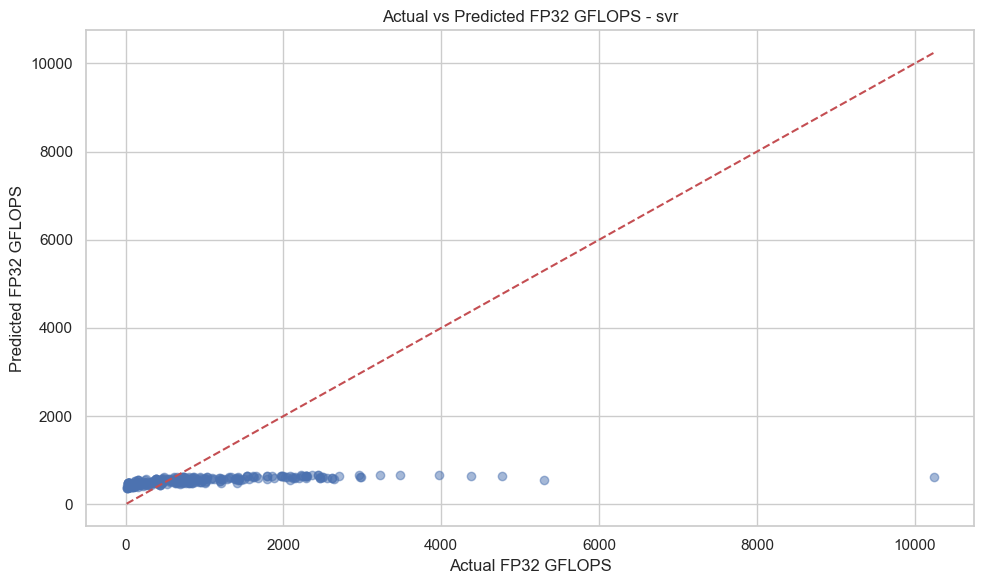

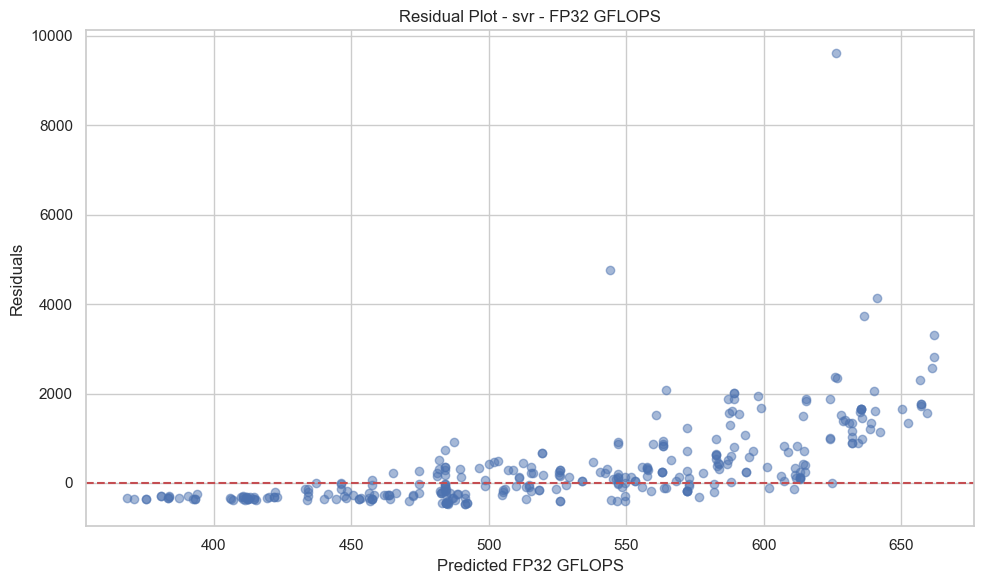

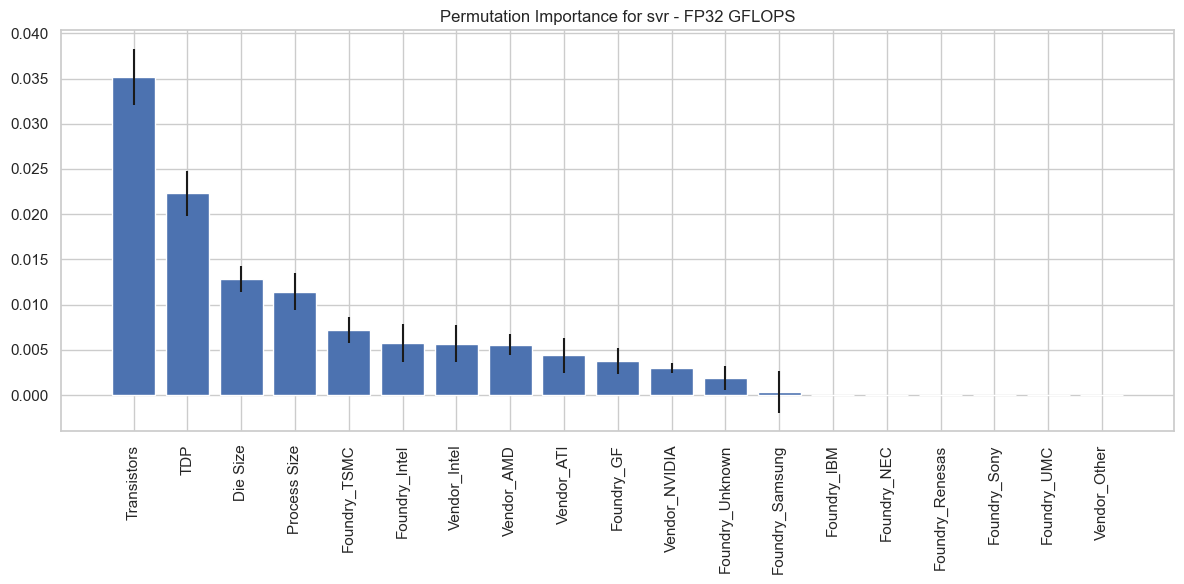


                 Model Comparison for CPU Frequency Prediction                  

               Model            MSE        RMSE         MAE        R²
6           catboost  108917.890683  330.027106  249.720729  0.809349
4            xgboost  109555.171812  330.991196  246.713421  0.808234
3      random_forest  113106.716616  336.313420  251.593019  0.802017
2      decision_tree  114522.288494  338.411419  249.890605  0.799539
5           lightgbm  118130.280640  343.700859  261.868082  0.793224
7     neural_network  274829.061925  524.241416  419.269188  0.518937
1   ridge_regression  287669.276593  536.348093  427.184126  0.496461
0  linear_regression  287763.014092  536.435471  427.354046  0.496297
8                svr  512719.600838  716.044413  589.658501  0.102531


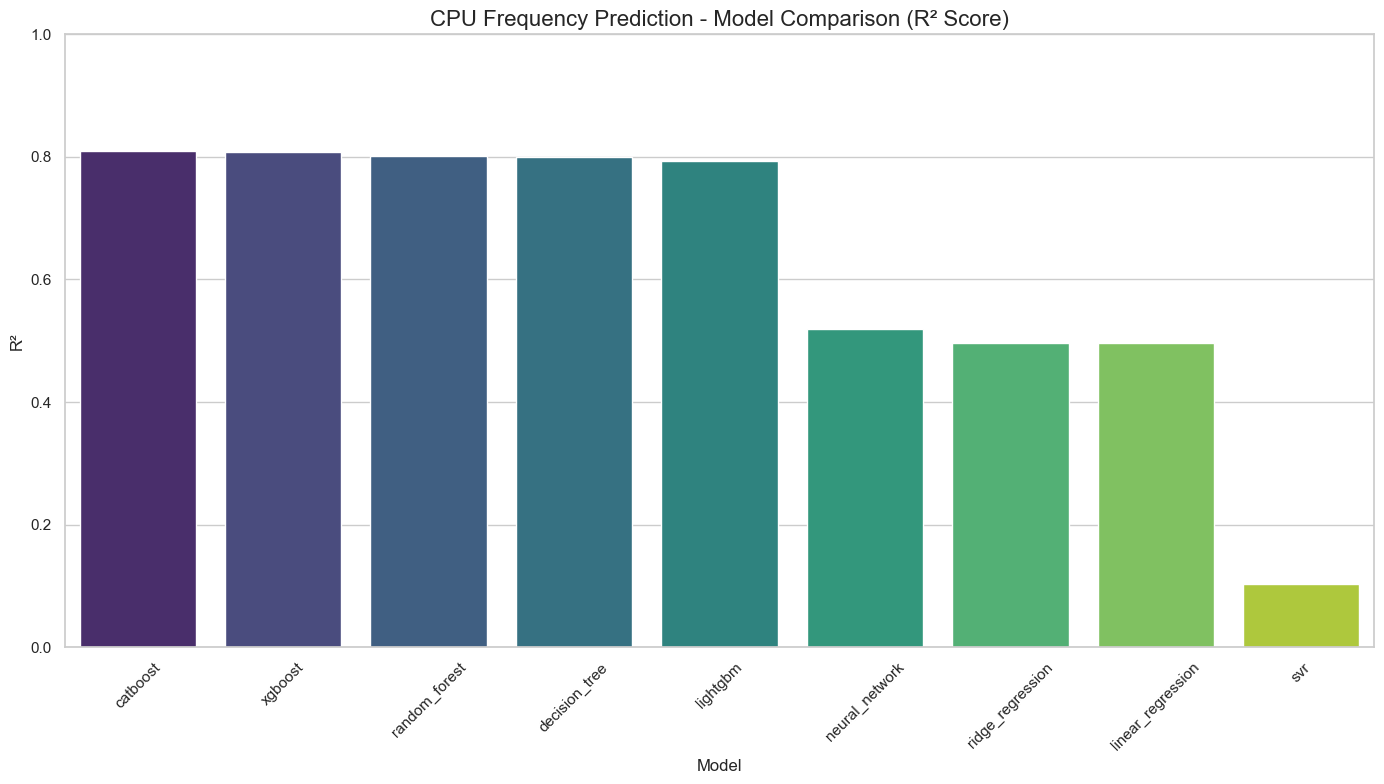


                Model Comparison for GPU FP32 GFLOPS Prediction                 

               Model           MSE         RMSE         MAE        R²
6           catboost  7.115982e+04   266.757975  157.099617  0.930231
3      random_forest  7.398664e+04   272.004845  150.749683  0.927459
4            xgboost  8.476547e+04   291.145096  156.355322  0.916891
5           lightgbm  9.043013e+04   300.716037  163.332430  0.911337
2      decision_tree  9.970588e+04   315.762382  163.315116  0.902243
7     neural_network  2.102747e+05   458.557237  277.108468  0.793835
1   ridge_regression  3.878667e+05   622.789458  422.184454  0.619714
0  linear_regression  3.948781e+05   628.393303  429.588580  0.612839
8                svr  1.040130e+06  1019.867808  588.909179 -0.019803


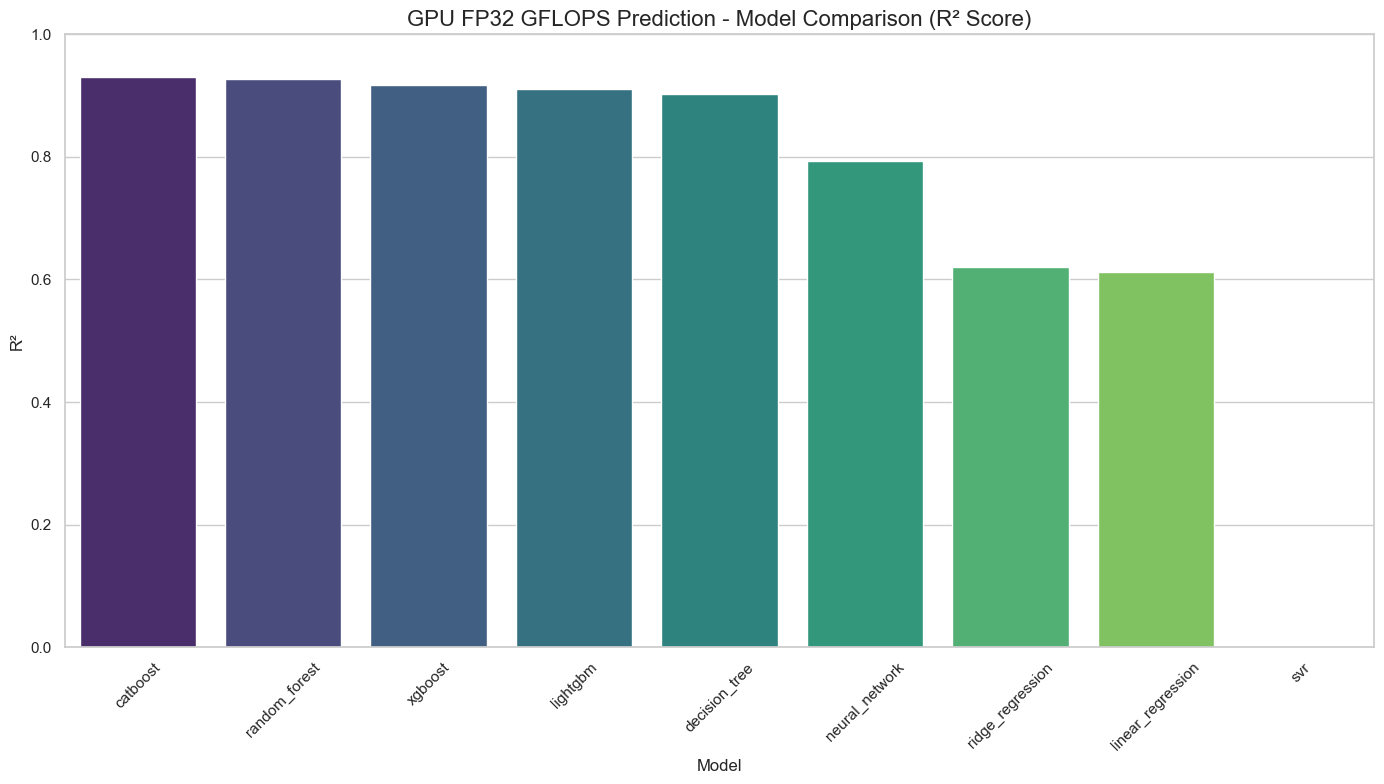


Best model for CPU Frequency prediction: catboost
Best model for GPU FP32 GFLOPS prediction: catboost


In [103]:
# Main execution for CPU data prediction
print("\n" + "="*80)
print("CPU Frequency Prediction Models".center(80))
print("="*80 + "\n")

for model_name, model in regressors.items():
    # Print model name header
    print('\n\n')
    print(f"  {model_name}  ".center(50, '-'))
    print('\n')
    
    # Ensure folders exist
    ensure_folder_exists('cpu', model_name)
    
    # Train the model
    trained_model = train_model(
        model, model_name, 
        X_cpu_train_scaled, y_cpu_train, 
        X_cpu_test_scaled, y_cpu_test, 
        'cpu', 'CPU Frequency'
    )
    
    # Get CV predictions for training data
    y_train_pred = get_predictions(
        trained_model, X_cpu_train_scaled, y_cpu_train, 
        None, model_name, 'cpu'
    )
    
    # Get predictions for test data using the trained model
    trained_model_final = train_model(
        model, model_name, 
        X_cpu_train_scaled, y_cpu_train, 
        X_cpu_test_scaled, y_cpu_test, 
        'cpu', 'CPU Frequency', 
        final_model=True
    )
    y_test_pred = trained_model_final.predict(X_cpu_test_scaled)
    
    # Display metrics for training and test data
    print("Training Data Metrics:")
    display_metrics(y_cpu_train, y_train_pred, model_name)
    
    print("Test Data Metrics:")
    display_metrics(y_cpu_test, y_test_pred, model_name)
    
    # Plots for test data
    plot_actual_vs_predicted(y_cpu_test, y_test_pred, model_name, 'CPU Frequency')
    plot_residuals(y_cpu_test, y_test_pred, model_name, 'CPU Frequency')
    
    # Plot feature importance
    plot_feature_importance(trained_model_final, X_cpu_test_scaled, y_cpu_test, 
                           model_name, X_cpu.columns, 'CPU Frequency')

# Main execution for GPU data prediction
print("\n" + "="*80)
print("GPU FP32 GFLOPS Prediction Models".center(80))
print("="*80 + "\n")

for model_name, model in regressors.items():
    # Print model name header
    print('\n\n')
    print(f"  {model_name}  ".center(50, '-'))
    print('\n')
    
    # Ensure folders exist
    ensure_folder_exists('gpu', model_name)
    
    # Train the model
    trained_model = train_model(
        model, model_name, 
        X_gpu_train_scaled, y_gpu_train, 
        X_gpu_test_scaled, y_gpu_test, 
        'gpu', 'FP32 GFLOPS'
    )
    
    # Get CV predictions for training data
    y_train_pred = get_predictions(
        trained_model, X_gpu_train_scaled, y_gpu_train, 
        None, model_name, 'gpu'
    )
    
    # Get predictions for test data using the trained model
    trained_model_final = train_model(
        model, model_name, 
        X_gpu_train_scaled, y_gpu_train, 
        X_gpu_test_scaled, y_gpu_test, 
        'gpu', 'FP32 GFLOPS', 
        final_model=True
    )
    y_test_pred = trained_model_final.predict(X_gpu_test_scaled)
    
    # Display metrics for training and test data
    print("Training Data Metrics:")
    display_metrics(y_gpu_train, y_train_pred, model_name)
    
    print("Test Data Metrics:")
    display_metrics(y_gpu_test, y_test_pred, model_name)
    
    # Plots for test data
    plot_actual_vs_predicted(y_gpu_test, y_test_pred, model_name, 'FP32 GFLOPS')
    plot_residuals(y_gpu_test, y_test_pred, model_name, 'FP32 GFLOPS')
    
    # Plot feature importance
    plot_feature_importance(trained_model_final, X_gpu_test_scaled, y_gpu_test, 
                           model_name, X_gpu.columns, 'FP32 GFLOPS')

# Function to compare all models based on their test metrics
def compare_models(models_dict, X_train, y_train, X_test, y_test, dataset_name, target_name):
    """Compare all models based on their performance metrics"""
    results = []
    
    for model_name, model in models_dict.items():
        # Load the trained model
        model_path = Path(f'saved_models_final/{dataset_name}/{model_name}/{model_name}_model.sav')
        try:
            trained_model = joblib.load(model_path)
        except FileNotFoundError:
            # Train if model doesn't exist
            trained_model = train_model(
                model, model_name, X_train, y_train, X_test, y_test, 
                dataset_name, target_name, final_model=True
            )
        
        # Make predictions
        y_pred = trained_model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by R² (higher is better)
    results_df = results_df.sort_values('R²', ascending=False)
    
    return results_df

# Compare all models for CPU data
print("\n" + "="*80)
print("Model Comparison for CPU Frequency Prediction".center(80))
print("="*80 + "\n")

cpu_comparison = compare_models(
    regressors, 
    X_cpu_train_scaled, y_cpu_train, 
    X_cpu_test_scaled, y_cpu_test, 
    'cpu', 'CPU Frequency'
)
print(cpu_comparison)

# Create bar plot for CPU model comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='R²', data=cpu_comparison, palette='viridis')
plt.title('CPU Frequency Prediction - Model Comparison (R² Score)', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)  # R² typically ranges from 0 to 1
plt.tight_layout()
plt.show()

# Compare all models for GPU data
print("\n" + "="*80)
print("Model Comparison for GPU FP32 GFLOPS Prediction".center(80))
print("="*80 + "\n")

gpu_comparison = compare_models(
    regressors, 
    X_gpu_train_scaled, y_gpu_train, 
    X_gpu_test_scaled, y_gpu_test, 
    'gpu', 'FP32 GFLOPS'
)
print(gpu_comparison)

# Create bar plot for GPU model comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='R²', data=gpu_comparison, palette='viridis')
plt.title('GPU FP32 GFLOPS Prediction - Model Comparison (R² Score)', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)  # R² typically ranges from 0 to 1
plt.tight_layout()
plt.show()

# Identify the best performing model for each dataset
best_cpu_model_name = cpu_comparison.iloc[0]['Model']
best_gpu_model_name = gpu_comparison.iloc[0]['Model']

print(f"\nBest model for CPU Frequency prediction: {best_cpu_model_name}")
print(f"Best model for GPU FP32 GFLOPS prediction: {best_gpu_model_name}")

# Optional: Hyperparameter tuning for the best models
# You could add code here to perform hyperparameter tuning using GridSearchCV
# or RandomizedSearchCV for the best performing models